In [38]:
import numpy as np
import seaborn  as sns 
import pandas as pd 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.svm import SVR, SVC
from xgboost import XGBRegressor, XGBClassifier
from sklearn.ensemble import AdaBoostRegressor, AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.linear_model import  Ridge 
from sklearn.linear_model import  Lasso 
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import explained_variance_score
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

In [3]:
power = pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")

In [4]:
power

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

# # Dropping Unnecessary Columns

In [5]:
power.isnull().sum()/len(power)*100

country                       0.000000
country_long                  0.000000
name                          0.000000
gppd_idnr                     0.000000
capacity_mw                   0.000000
latitude                      5.071665
longitude                     5.071665
primary_fuel                  0.000000
other_fuel1                  78.169791
other_fuel2                  99.889746
other_fuel3                 100.000000
commissioning_year           41.896362
owner                        62.293275
source                        0.000000
url                           0.000000
geolocation_source            2.094818
wepp_id                     100.000000
year_of_capacity_data        42.778390
generation_gwh_2013         100.000000
generation_gwh_2014          56.119074
generation_gwh_2015          53.472988
generation_gwh_2016          52.149945
generation_gwh_2017          51.488423
generation_gwh_2018          50.606395
generation_gwh_2019         100.000000
generation_data_source   

In [6]:
power1 = power.drop(['country', 'country_long', 'name', 'gppd_idnr', 'commissioning_year','wepp_id','url','year_of_capacity_data','generation_gwh_2013','other_fuel3','generation_gwh_2019','estimated_generation_gwh','owner','other_fuel2','generation_gwh_2019'], axis=1)

# droping following columns because -:

# - country and country_long column contains same value so it will not have any different impact on target columns
# - name, gppd_id, commissioning year, wepp_id and url only contains information do not have any impact on output just like index number
# - generation_gwh_2019, other_fuel2, generation_gwh_2019, other_fuel3 and other columns or feature because  100 % value are missing 
# values may be missing due to any reason, it could be that power is not being produced in that particular time or information is not available

In [8]:
power1

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018         generation_data_source  
0                    NaN                            NaN  
1                    NaN                            NaN  
2                    NaN                            NaN  
3             626.239128  Central Electricity Authority  
4            7279.000000  Central Electricity Authority  
..                   ...                            ...  
902           686.500000  Central Electricity Authority  
903                  NaN                            NaN  
904                  NaN                            NaN  
905                  NaN                            NaN  
906                  NaN                            NaN  

[907 rows x 13 columns]

# Data Preparation

# Skewness

In [12]:
power1.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

# multicollinearity check

<Axes: >

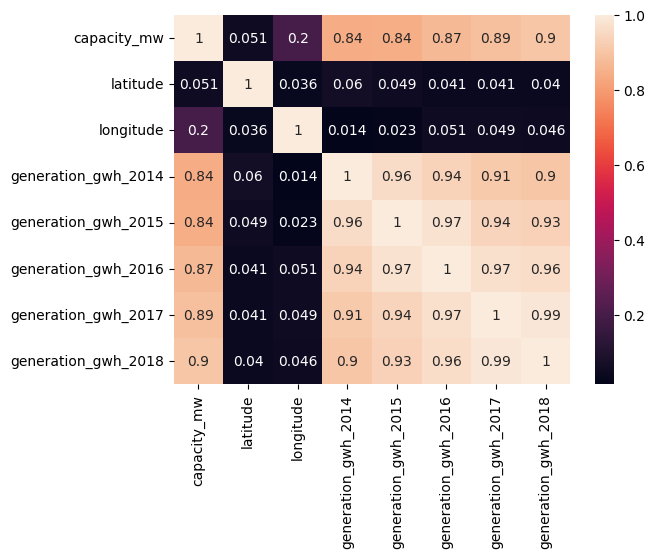

In [13]:
sns.heatmap(power1.corr(), annot=True)

# Data Visualization

In [14]:
power1.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'source', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

# # power generation vs years vs geolocation_source

# # 2014

<Axes: xlabel='year_of_capacity_data', ylabel='generation_gwh_2014'>

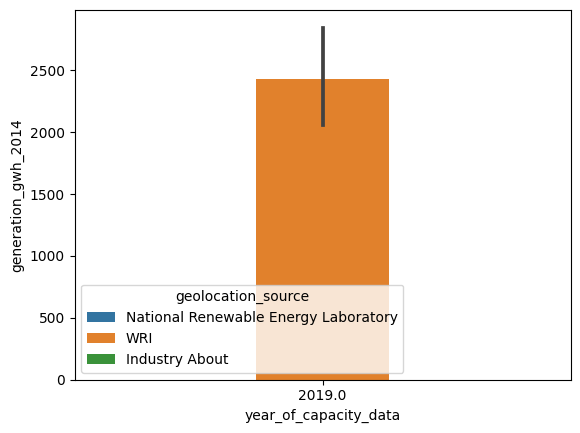

In [26]:
sns.barplot(data=power, y='generation_gwh_2014', x='year_of_capacity_data', hue='geolocation_source')

In [34]:
result = power.groupby('geolocation_source')['generation_gwh_2014'].sum()
print(result)

geolocation_source
Industry About                               0.000000
National Renewable Energy Laboratory         0.000000
WRI                                     967865.788898
Name: generation_gwh_2014, dtype: float64


# whole information regarding industry about and National Renewable Energy Laboratory is missing in 2014

# 2015

<Axes: xlabel='year_of_capacity_data', ylabel='generation_gwh_2015'>

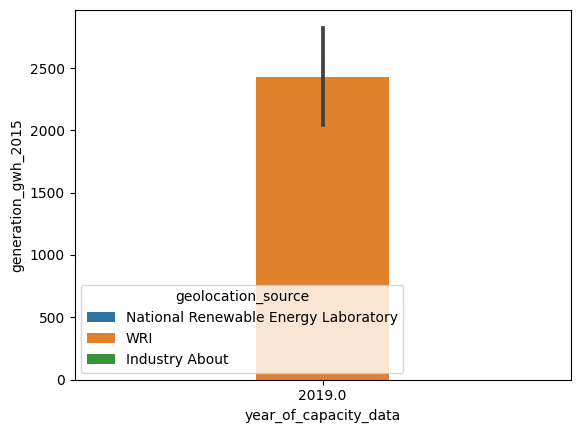

In [27]:
sns.barplot(data=power, y='generation_gwh_2015', x='year_of_capacity_data', hue='geolocation_source')

In [36]:
result = power.groupby('geolocation_source')['generation_gwh_2015'].count()
print(result)

geolocation_source
Industry About                            0
National Renewable Energy Laboratory      0
WRI                                     422
Name: generation_gwh_2015, dtype: int64


In [40]:
sum1 = power[power['geolocation_source'] =='WRI']
sum1['generation_gwh_2015'].sum()

1024711.7711957144

# WRI producing 1024711.77119 in 2015 and information regarding other geolocation source is missing 

# whole information regarding WRI, industry about and National Renewable Energy Laboratory is missing in 2015

# 2016

<Axes: xlabel='year_of_capacity_data', ylabel='generation_gwh_2016'>

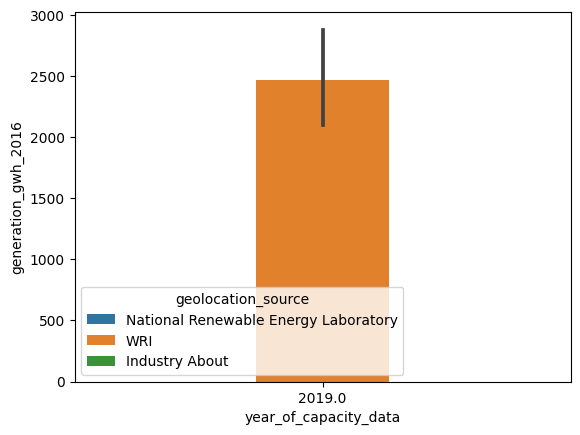

In [28]:
sns.barplot(data=power, y='generation_gwh_2016', x='year_of_capacity_data', hue='geolocation_source')

In [49]:
result1 = power.groupby('geolocation_source')['generation_gwh_2016'].sum()
print(result1)

geolocation_source
Industry About                          0.000000e+00
National Renewable Energy Laboratory    0.000000e+00
WRI                                     1.071085e+06
Name: generation_gwh_2016, dtype: float64


In [50]:
power['generation_gwh_2016'].sum()

1071084.5966475508

# WRI producing 1071084.5966475508 in 2015 and information regarding other geolocation source is missing 

# 2017

<Axes: xlabel='year_of_capacity_data', ylabel='generation_gwh_2017'>

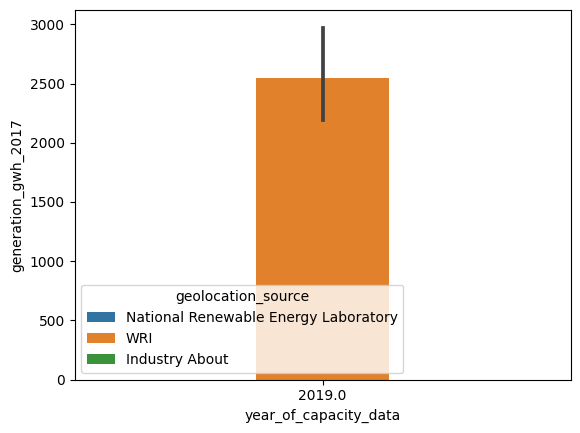

In [29]:
sns.barplot(data=power, y='generation_gwh_2017', x='year_of_capacity_data', hue='geolocation_source')


In [51]:
result2 = power.groupby('geolocation_source')['generation_gwh_2017'].sum()
print(result2)

geolocation_source
Industry About                          0.000000e+00
National Renewable Energy Laboratory    0.000000e+00
WRI                                     1.121014e+06
Name: generation_gwh_2017, dtype: float64


In [52]:
power['generation_gwh_2017'].sum()

1121014.0939844903

# WRI producing 1121014.0939844903 in 2015 and information regarding other geolocation source is missing 

# 2018

<Axes: xlabel='year_of_capacity_data', ylabel='generation_gwh_2018'>

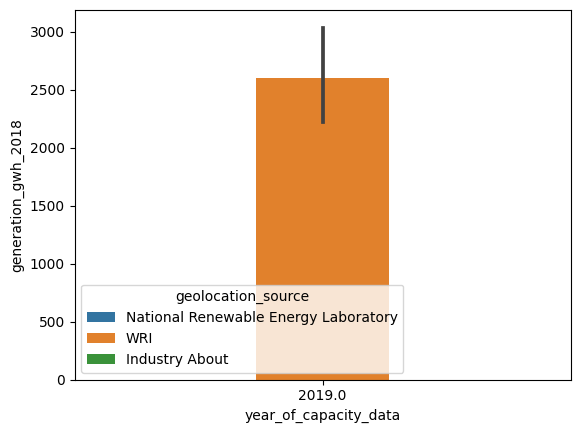

In [42]:
sns.barplot(data=power, y='generation_gwh_2018', x='year_of_capacity_data', hue='geolocation_source')


In [53]:
result3 = power.groupby('geolocation_source')['generation_gwh_2018'].sum()
print(result3)

geolocation_source
Industry About                          0.000000e+00
National Renewable Energy Laboratory    0.000000e+00
WRI                                     1.165160e+06
Name: generation_gwh_2018, dtype: float64


In [54]:
power['generation_gwh_2018'].sum()

1165160.2362005822

# WRI producing 1165160.2362005822 in 2015 and information regarding other geolocation source is missing 

# Overll situation is information regarding Industry About and National Renewable Energy Laboratory is missing in all years so it cannot be predicted on basis of other gelocation 

# Comparision of capacity and primary Fuel 

<Axes: xlabel='primary_fuel', ylabel='capacity_mw'>

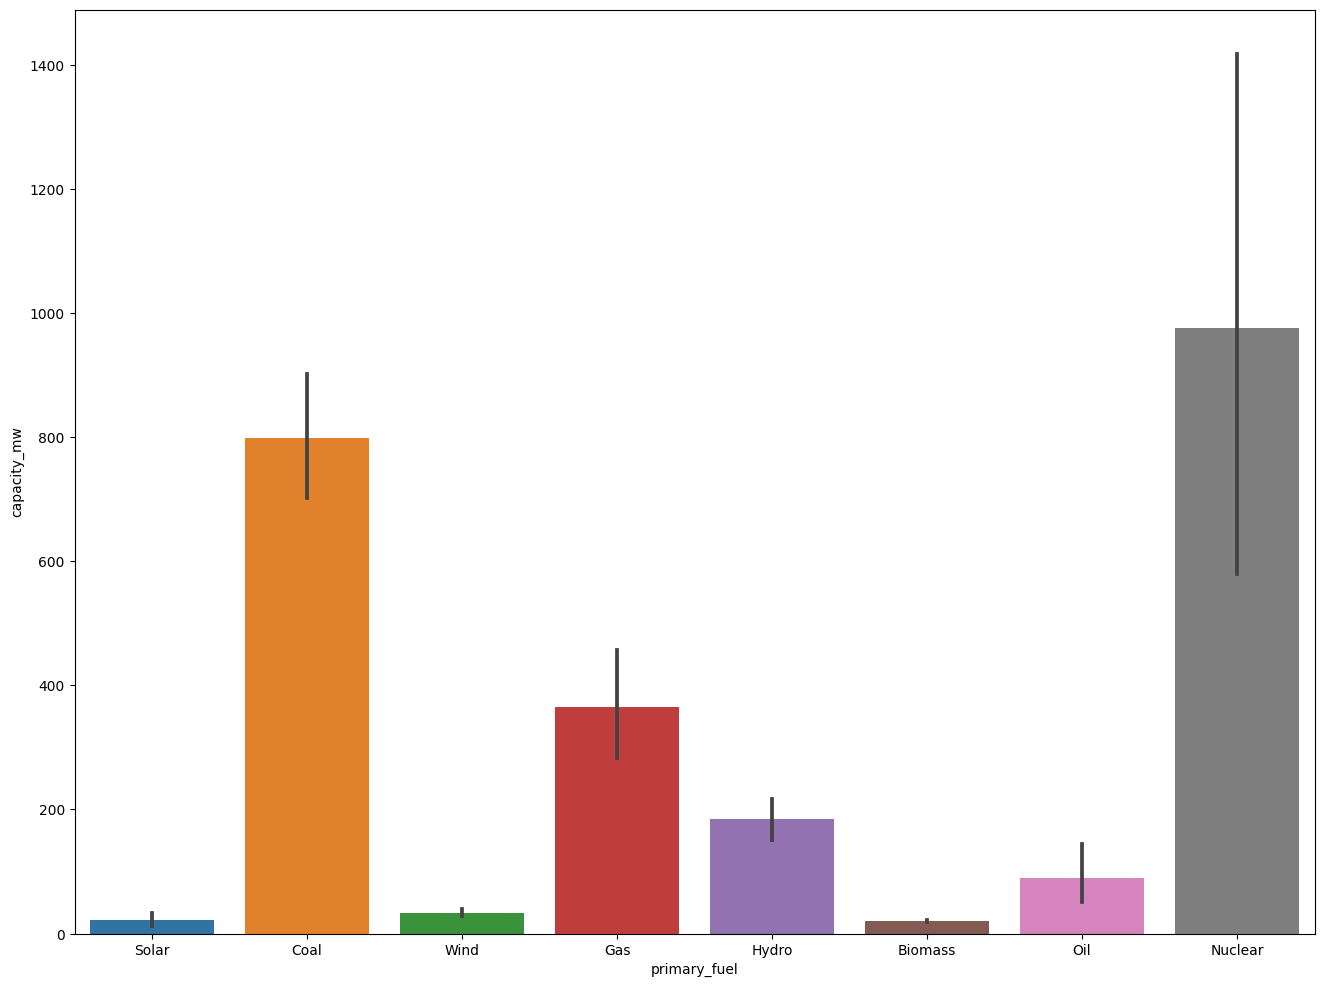

In [56]:
plt.figure(figsize=(16,12))
sns.barplot(data= power1, x='primary_fuel', y='capacity_mw')



# nuclear power and coal is used for generating power because nuclear power is powerful source of power
# coal is being used for producing or generating power at high level 
# Solar, wind, Biomass and Oil produce less as compare to other resource

# No of industry using resources capacitywise

In [57]:
power1['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

<Axes: >

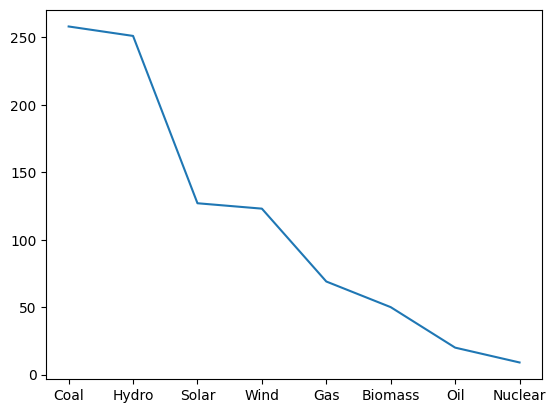

In [11]:
power1['primary_fuel'].value_counts().plot()

In [12]:
power1.pivot_table(index ='primary_fuel', values = 'capacity_mw', aggfunc='sum')

capacity_mw
primary_fuel             
Biomass          1003.260
Coal           205839.220
Gas             25172.506
Hydro           46441.770
Nuclear          8780.000
Oil              1778.840
Solar            2757.500
Wind             4111.850

<Axes: xlabel='primary_fuel'>

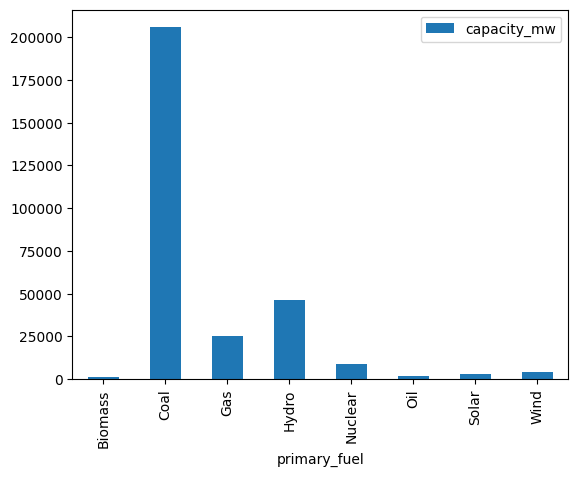

In [13]:
power1.pivot_table(index ='primary_fuel', values = 'capacity_mw', aggfunc='sum').plot(kind='bar')

<Axes: >

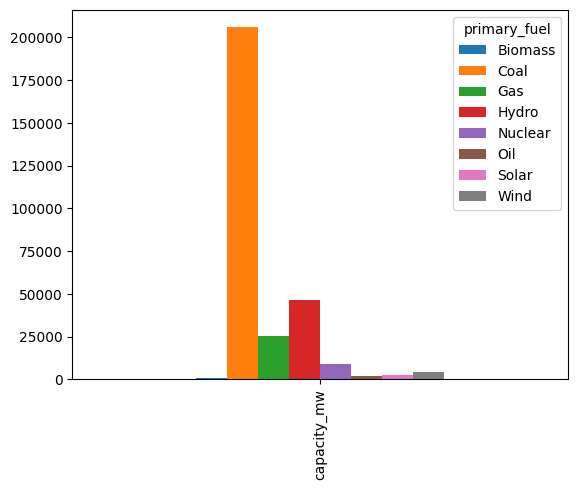

In [66]:
power1.pivot_table(columns='primary_fuel', values='capacity_mw', aggfunc='sum').plot(kind='bar')

# coal is being used highly for producing electricity  and capacity is high too
# second is Hydro on basis of capacity

In [14]:
Nuclear = power1[power1['primary_fuel'] =='Nuclear']

([0, 1, 2],
 [Text(0, 0, 'National Renewable Energy Laboratory'),
  Text(0, 1, 'WRI'),
  Text(0, 2, 'Industry About')])

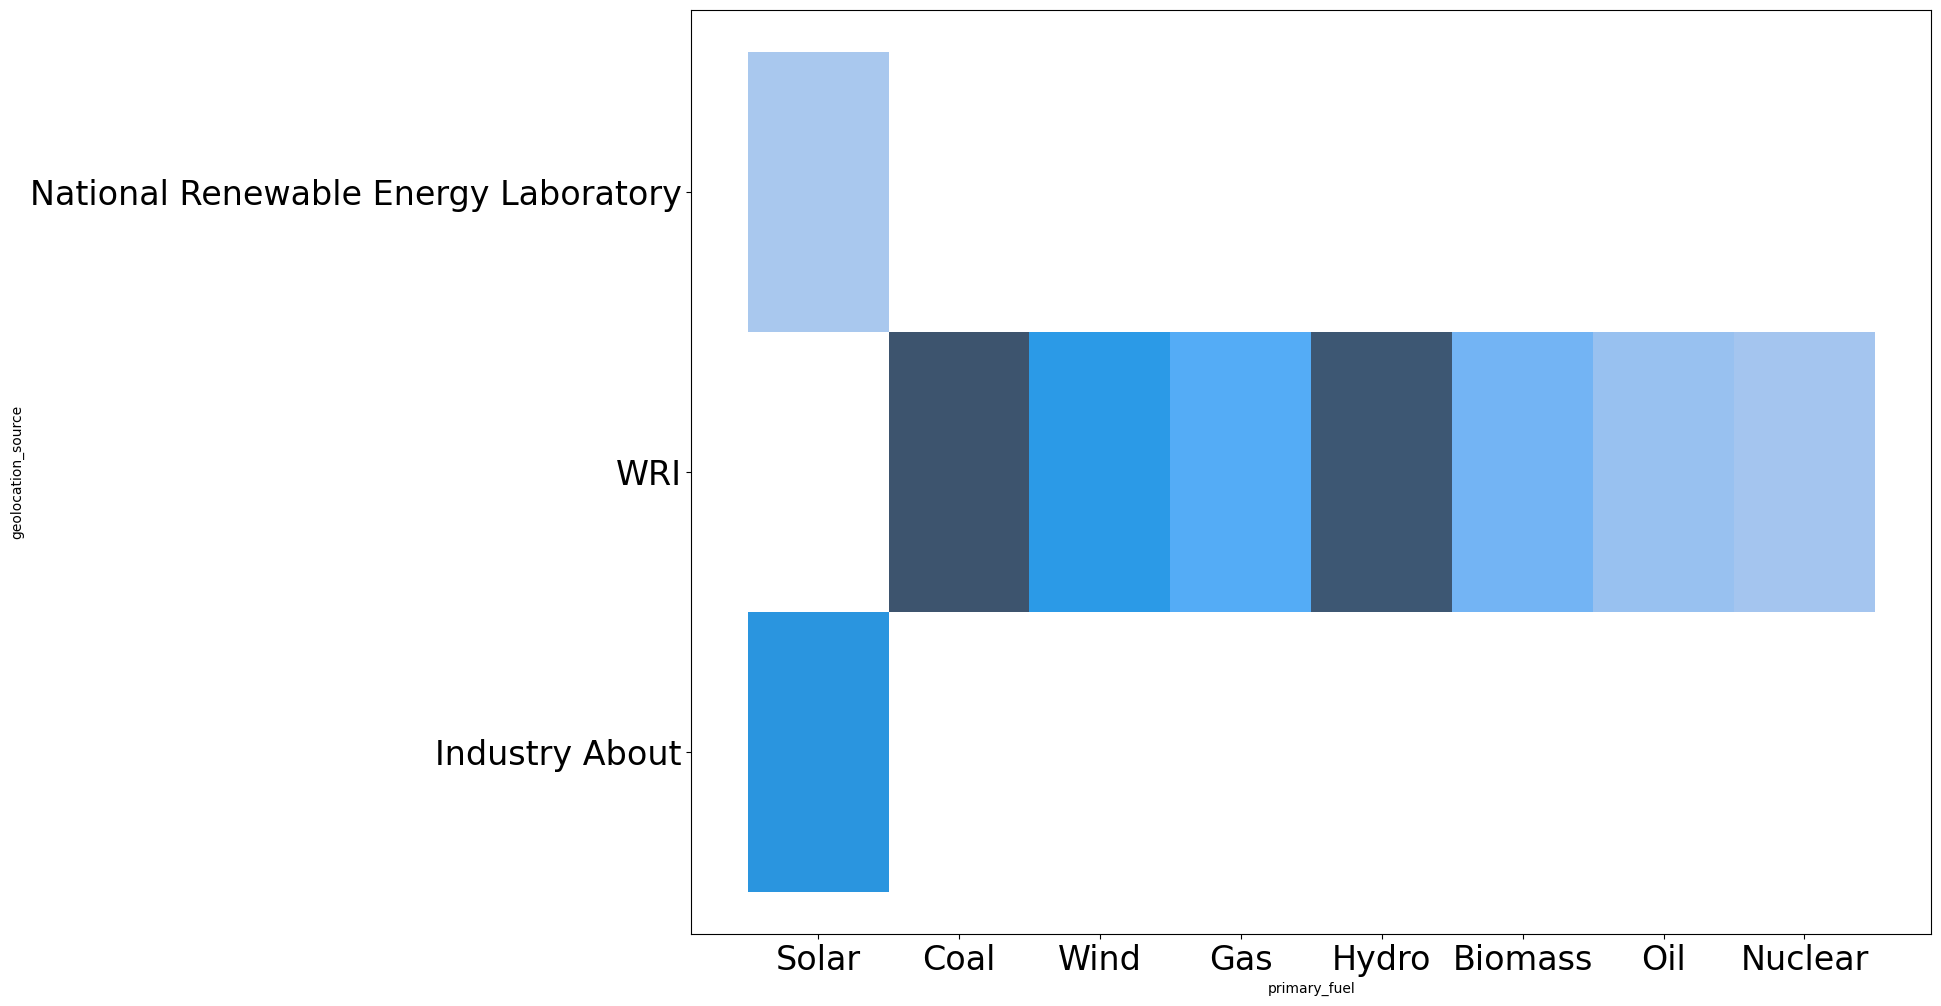

In [15]:
plt.figure(figsize=(16,12))
sns.histplot(data= power1, x='primary_fuel', y='geolocation_source')
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

# National Renewable Energy Laboratory and Industry About using Solar 
#  WRI using Coal, Wind, Gas Hydro Biomass Oil and Nuclear for producing or generating electricity

# Data Preparation

# Seprating Categorical and Numerical Columns

In [70]:
cate1 = [i for i in power1.columns if power1[i].dtype != 'object']

numerical = power1[cate1]
numerical

capacity_mw  latitude  longitude  generation_gwh_2014  \
0            2.5   28.1839    73.2407                  NaN   
1           98.0   24.7663    74.6090                  NaN   
2           39.2   21.9038    69.3732                  NaN   
3          135.0   23.8712    91.3602           617.789264   
4         1800.0   21.9603    82.4091          3035.550000   
..           ...       ...        ...                  ...   
902       1600.0   16.2949    77.3568                  NaN   
903          3.0   12.8932    78.1654                  NaN   
904         25.5   15.2758    75.5811                  NaN   
905         80.0   24.3500    73.7477                  NaN   
906         16.5    9.9344    77.4768                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018  
0                    NaN  
1                    NaN  
2                    NaN  
3             626.239128  
4            7279.000000  
..                   ...  
902           686.500000  
903                  NaN  
904                  NaN  
905                  NaN  
906                  NaN  

[907 rows x 8 columns]

In [71]:
numerical1 = numerical.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'], axis=1)

In [72]:
numerical1

capacity_mw  latitude  longitude
0            2.5   28.1839    73.2407
1           98.0   24.7663    74.6090
2           39.2   21.9038    69.3732
3          135.0   23.8712    91.3602
4         1800.0   21.9603    82.4091
..           ...       ...        ...
902       1600.0   16.2949    77.3568
903          3.0   12.8932    78.1654
904         25.5   15.2758    75.5811
905         80.0   24.3500    73.7477
906         16.5    9.9344    77.4768

[907 rows x 3 columns]

# Missing_Values

In [73]:
numerical1.isnull().sum()

capacity_mw     0
latitude       46
longitude      46
dtype: int64

In [74]:
numerical1['latitude'] = numerical1['latitude'].fillna(21.19791811846691)
numerical1['longitude'] = numerical1['longitude'].fillna(77.46490720092922)

# Numerical

In [75]:
numerical1.isnull().sum()

capacity_mw    0
latitude       0
longitude      0
dtype: int64

In [76]:
cate = [i for i in power1.columns if power1[i].dtype == 'object']

categorical = power1[cate]
categorical

primary_fuel other_fuel1                                source  \
0          Solar         NaN  National Renewable Energy Laboratory   
1           Coal         NaN                  Ultratech Cement ltd   
2           Wind         NaN                                   CDM   
3            Gas         NaN         Central Electricity Authority   
4           Coal         Oil         Central Electricity Authority   
..           ...         ...                                   ...   
902         Coal         Oil         Central Electricity Authority   
903        Solar         NaN   Karnataka Power Corporation Limited   
904         Wind         NaN                                   CDM   
905         Coal         NaN                    Hindustan Zinc ltd   
906         Wind         NaN                                   CDM   

                       geolocation_source         generation_data_source  
0    National Renewable Energy Laboratory                            NaN  
1                                     WRI                            NaN  
2                                     WRI                            NaN  
3                                     WRI  Central Electricity Authority  
4                                     WRI  Central Electricity Authority  
..                                    ...                            ...  
902                                   WRI  Central Electricity Authority  
903                        Industry About                            NaN  
904                                   WRI                            NaN  
905                                   WRI                            NaN  
906                                   WRI                            NaN  

[907 rows x 5 columns]

# Droping unnecessary Columns

In [77]:
categorical1 = categorical.drop(['generation_data_source','other_fuel1'], axis=1)

# missing values in categorical columns

In [78]:
categorical1.isnull().sum()

primary_fuel           0
source                 0
geolocation_source    19
dtype: int64

In [79]:
categorical1['geolocation_source'].mode()

0    WRI
Name: geolocation_source, dtype: object

In [80]:
categorical1['geolocation_source'] = categorical1['geolocation_source'].fillna('WRI')

In [81]:
categorical1.isnull().sum()

primary_fuel          0
source                0
geolocation_source    0
dtype: int64

In [82]:
categorical1.shape

(907, 3)

# Encoding through Binary Encoder

In [400]:
from category_encoders import BinaryEncoder
encoder1 = BinaryEncoder(cols=['primary_fuel', 'source','geolocation_source'])

In [401]:
data_encoded = encoder1.fit_transform(categorical1)

In [402]:
data_encoded

primary_fuel_0  primary_fuel_1  primary_fuel_2  primary_fuel_3  source_0  \
0                 0               0               0               1         0   
1                 0               0               1               0         0   
2                 0               0               1               1         0   
3                 0               1               0               0         0   
4                 0               0               1               0         0   
..              ...             ...             ...             ...       ...   
902               0               0               1               0         0   
903               0               0               0               1         0   
904               0               0               1               1         0   
905               0               0               1               0         0   
906               0               0               1               1         0   

     source_1  source_2  source_3  source_4  source_5  source_6  source_7  \
0           0         0         0         0         0         0         1   
1           0         0         0         0         0         1         0   
2           0         0         0         0         0         1         1   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
902         0         0         0         0         1         0         0   
903         1         0         0         1         1         1         1   
904         0         0         0         0         0         1         1   
905         0         1         0         1         0         1         0   
906         0         0         0         0         0         1         1   

     geolocation_source_0  geolocation_source_1  
0                       0                     1  
1                       1                     0  
2                       1                     0  
3                       1                     0  
4                       1                     0  
..                    ...                   ...  
902                     1                     0  
903                     1                     1  
904                     1                     0  
905                     1                     0  
906                     1                     0  

[907 rows x 14 columns]

In [403]:
merged = pd.merge(numerical1, data_encoded, left_index=True, right_index=True)

In [404]:
merged

capacity_mw  latitude  longitude  primary_fuel_0  primary_fuel_1  \
0            2.5   28.1839    73.2407               0               0   
1           98.0   24.7663    74.6090               0               0   
2           39.2   21.9038    69.3732               0               0   
3          135.0   23.8712    91.3602               0               1   
4         1800.0   21.9603    82.4091               0               0   
..           ...       ...        ...             ...             ...   
902       1600.0   16.2949    77.3568               0               0   
903          3.0   12.8932    78.1654               0               0   
904         25.5   15.2758    75.5811               0               0   
905         80.0   24.3500    73.7477               0               0   
906         16.5    9.9344    77.4768               0               0   

     primary_fuel_2  primary_fuel_3  source_0  source_1  source_2  source_3  \
0                 0               1         0         0         0         0   
1                 1               0         0         0         0         0   
2                 1               1         0         0         0         0   
3                 0               0         0         0         0         0   
4                 1               0         0         0         0         0   
..              ...             ...       ...       ...       ...       ...   
902               1               0         0         0         0         0   
903               0               1         0         1         0         0   
904               1               1         0         0         0         0   
905               1               0         0         0         1         0   
906               1               1         0         0         0         0   

     source_4  source_5  source_6  source_7  geolocation_source_0  \
0           0         0         0         1                     0   
1           0         0         1         0                     1   
2           0         0         1         1                     1   
3           0         1         0         0                     1   
4           0         1         0         0                     1   
..        ...       ...       ...       ...                   ...   
902         0         1         0         0                     1   
903         1         1         1         1                     1   
904         0         0         1         1                     1   
905         1         0         1         0                     1   
906         0         0         1         1                     1   

     geolocation_source_1  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
902                     0  
903                     1  
904                     0  
905                     0  
906                     0  

[907 rows x 17 columns]

# Outliers Detection

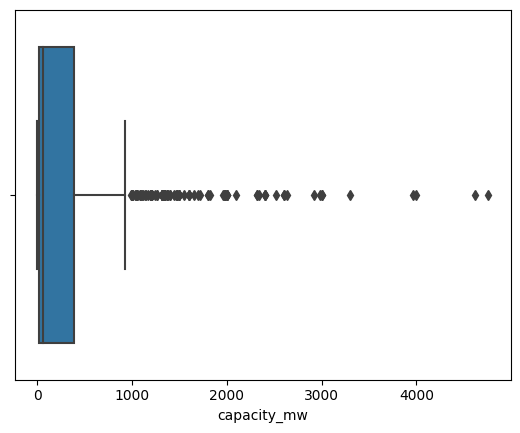

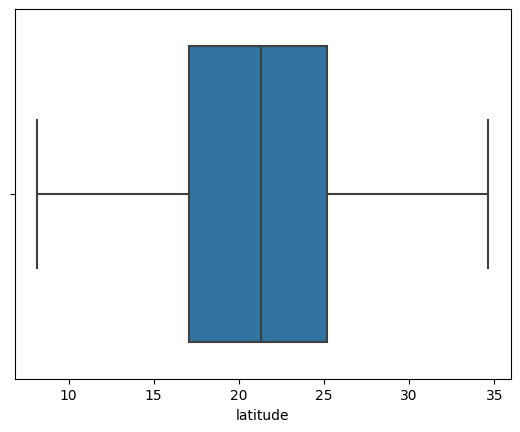

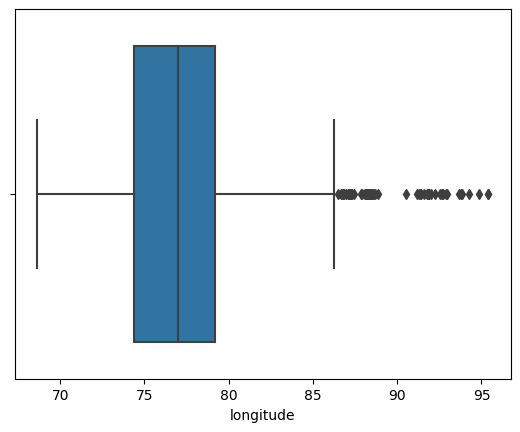

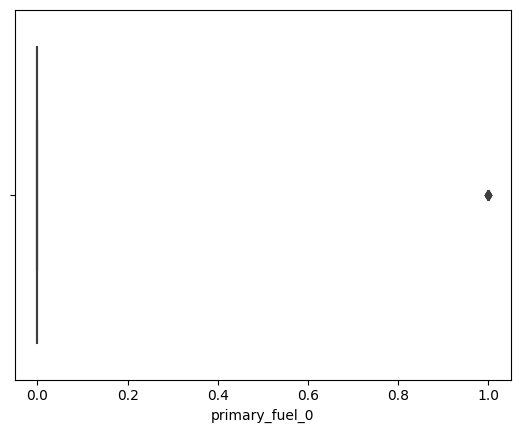

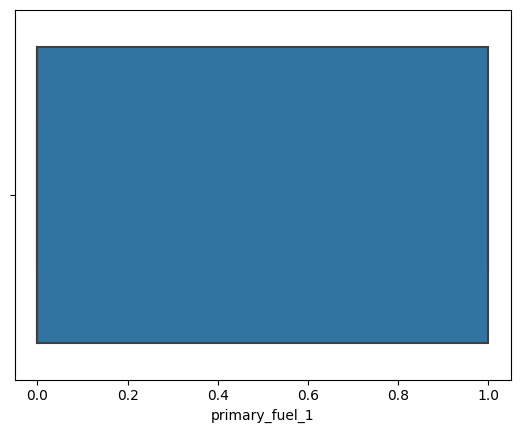

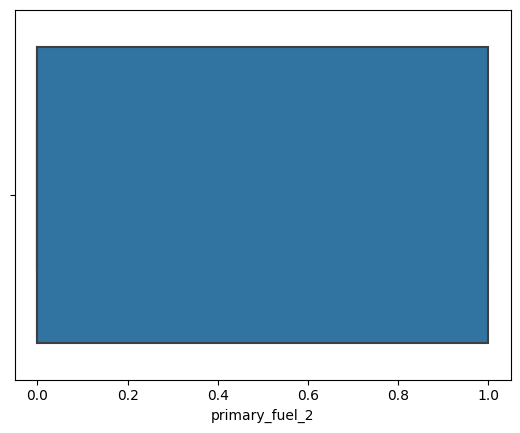

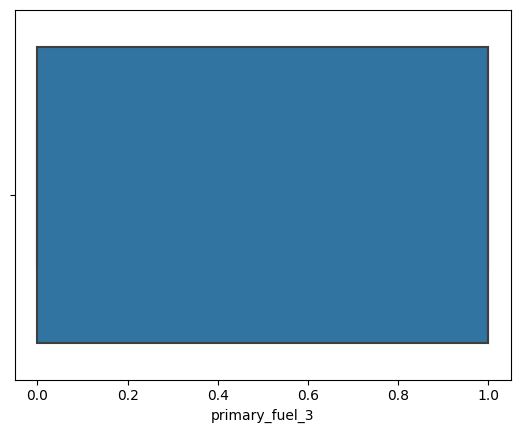

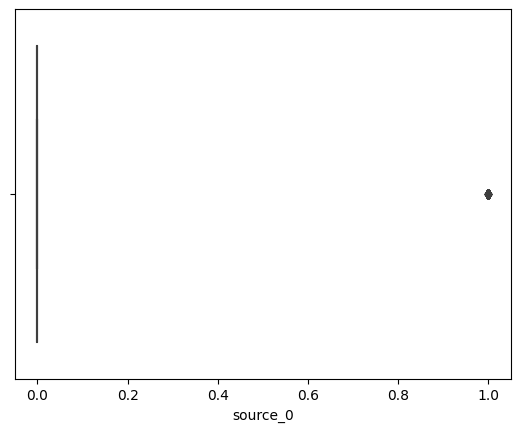

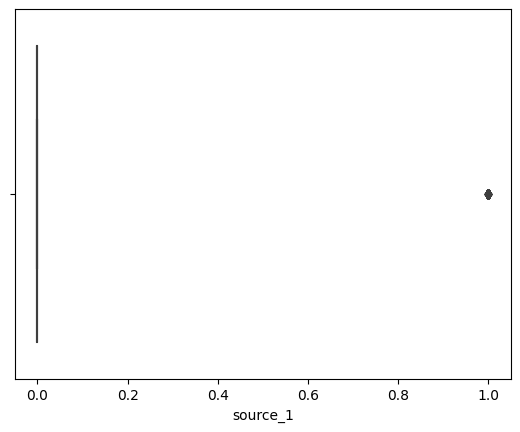

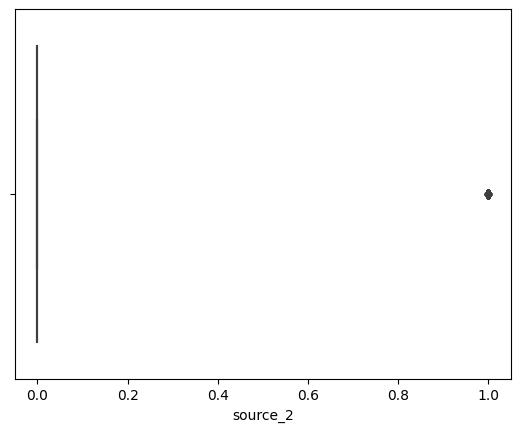

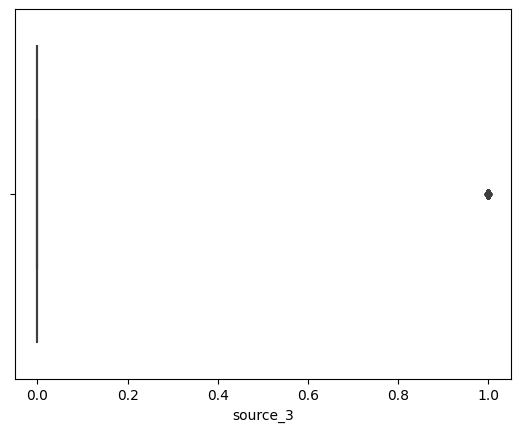

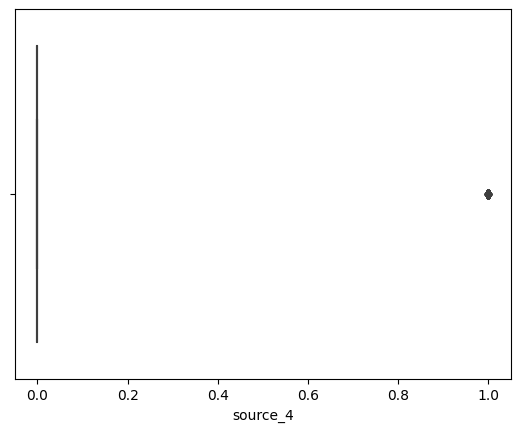

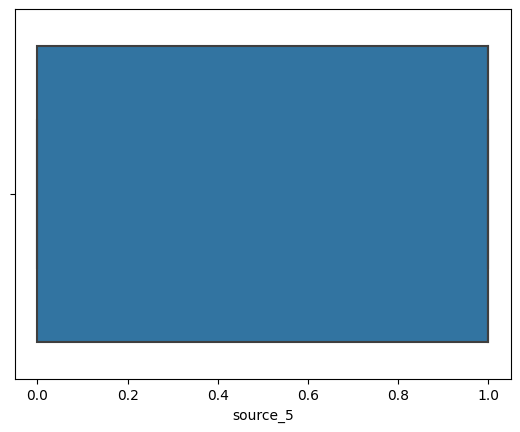

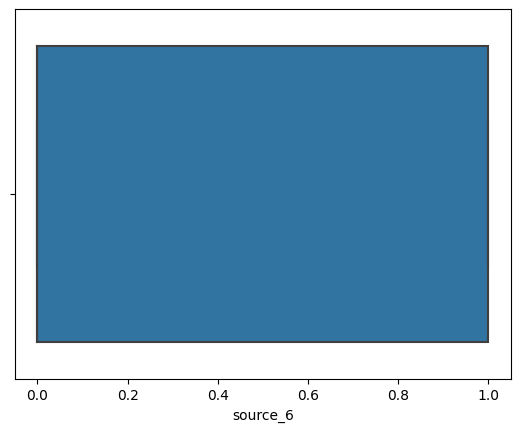

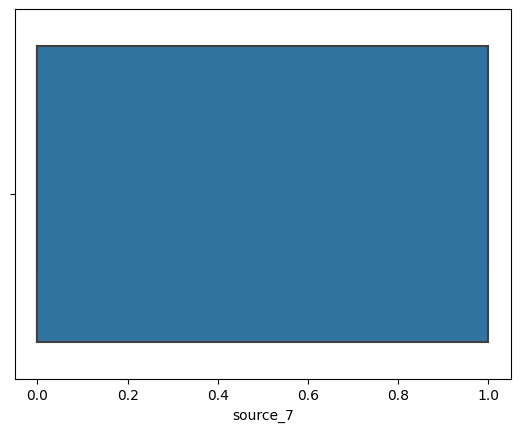

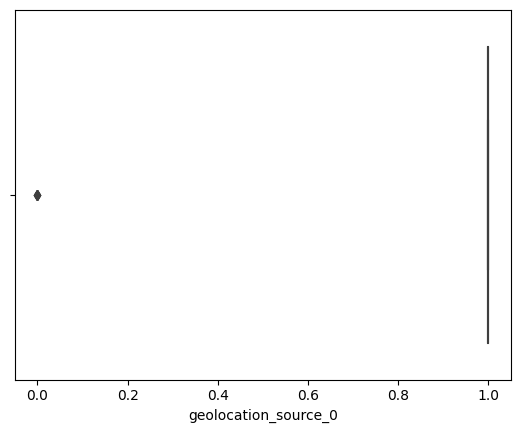

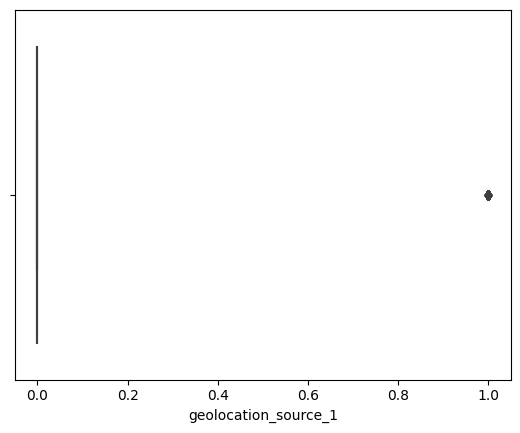

In [409]:
for i in merged.columns:
    sns.boxplot(data=merged, x=i)
    plt.show()

In [412]:
upper = {}
lower = {}
for i in merged.columns:
    if merged[i].dtype != 'object':
        q75 = merged[i].quantile(0.75)
        q25 = merged[i].quantile(0.25)
        iqr = q75 - q25
        upper[i] = q75 + 1.5 * iqr
        lower[i] = q25 - 1.5 * iqr
        print(i)
        print('upper', q75 + 1.5 * iqr)
        print('lower', q25 - 1.5 * iqr)
        
    

capacity_mw
upper 938.0374999999999
lower -536.0624999999999
latitude
upper 37.333125
lower 4.915325000000003
longitude
upper 86.43189999999997
lower 67.16310000000003
primary_fuel_0
upper 0.0
lower 0.0
primary_fuel_1
upper 2.5
lower -1.5
primary_fuel_2
upper 2.5
lower -1.5
primary_fuel_3
upper 2.5
lower -1.5
source_0
upper 0.0
lower 0.0
source_1
upper 0.0
lower 0.0
source_2
upper 0.0
lower 0.0
source_3
upper 0.0
lower 0.0
source_4
upper 0.0
lower 0.0
source_5
upper 2.5
lower -1.5
source_6
upper 2.5
lower -1.5
source_7
upper 2.5
lower -1.5
geolocation_source_0
upper 1.0
lower 1.0
geolocation_source_1
upper 0.0
lower 0.0


In [421]:
merged3 = merged[(merged['latitude'] <= 37.333125)]
merged4 = merged3[(merged3['longitude'] <= 86.43189999999997)]
merged5 = merged4[(merged4['latitude'] >= 4.915325000000003)]
merged6 = merged5[(merged5['longitude'] >= 67.16310000000003)]


In [422]:
merged8 = merged6.reset_index()

In [424]:
merged9 = merged8.drop(['index'], axis=1)


In [425]:
merged9.describe()

capacity_mw    latitude   longitude  primary_fuel_0  primary_fuel_1  \
count   845.000000  845.000000  845.000000      845.000000      845.000000   
mean    321.260640   20.925909   76.557193        0.010651        0.414201   
std     594.219233    6.177138    3.507987        0.102713        0.492875   
min       0.000000    8.168900   68.644700        0.000000        0.000000   
25%      16.000000   16.734600   74.245600        0.000000        0.000000   
50%      50.000000   21.197918   76.653700        0.000000        0.000000   
75%     350.000000   24.797100   78.391700        0.000000        1.000000   
max    4760.000000   34.649000   86.249100        1.000000        1.000000   

       primary_fuel_2  primary_fuel_3    source_0    source_1    source_2  \
count      845.000000      845.000000  845.000000  845.000000  845.000000   
mean         0.510059        0.577515    0.081657    0.100592    0.155030   
std          0.500195        0.494247    0.274003    0.300965    0.362147   
min          0.000000        0.000000    0.000000    0.000000    0.000000   
25%          0.000000        0.000000    0.000000    0.000000    0.000000   
50%          1.000000        1.000000    0.000000    0.000000    0.000000   
75%          1.000000        1.000000    0.000000    0.000000    0.000000   
max          1.000000        1.000000    1.000000    1.000000    1.000000   

         source_3    source_4    source_5    source_6    source_7  \
count  845.000000  845.000000  845.000000  845.000000  845.000000   
mean     0.144379    0.163314    0.691124    0.306509    0.304142   
std      0.351681    0.369870    0.462303    0.461317    0.460316   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000   
75%      0.000000    0.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       geolocation_source_0  geolocation_source_1  
count            845.000000            845.000000  
mean               0.995266              0.143195  
std                0.068680              0.350479  
min                0.000000              0.000000  
25%                1.000000              0.000000  
50%                1.000000              0.000000  
75%                1.000000              0.000000  
max                1.000000              1.000000

# Loss of Data 

In [426]:
62/ 907 *100

6.835722160970231

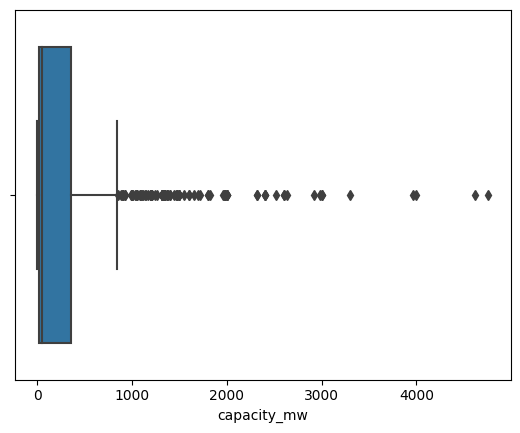

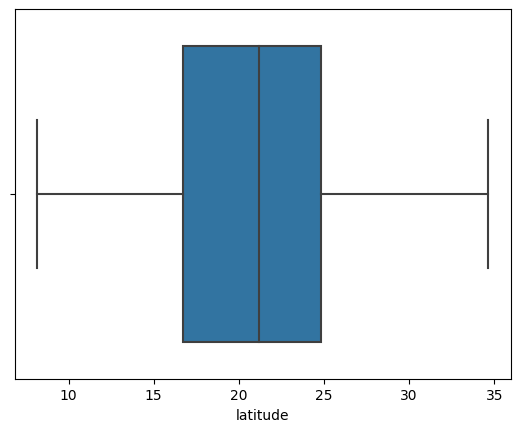

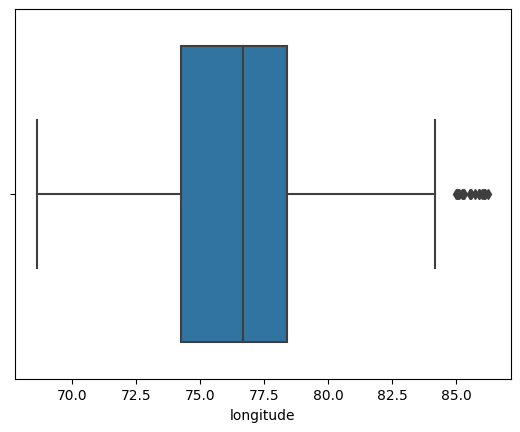

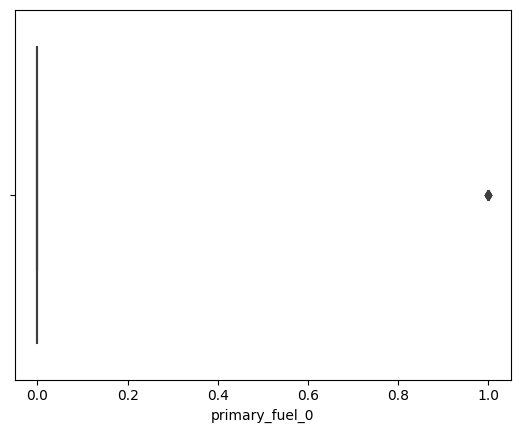

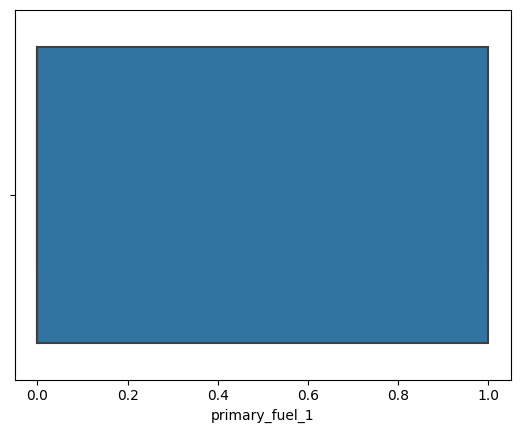

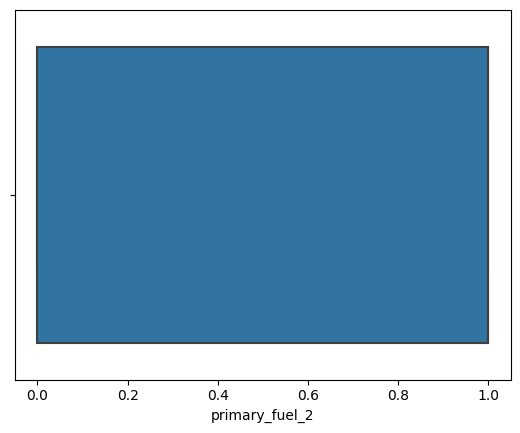

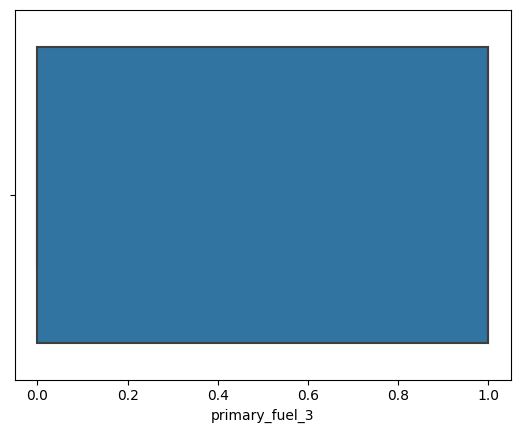

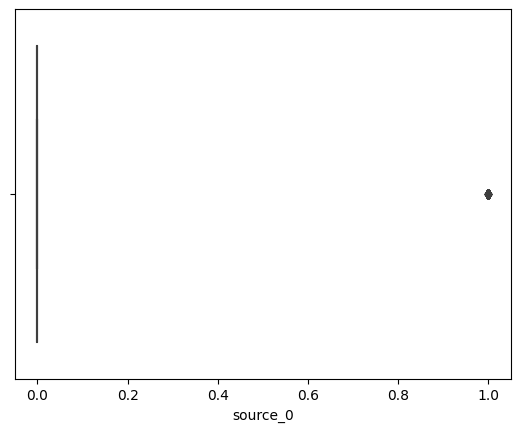

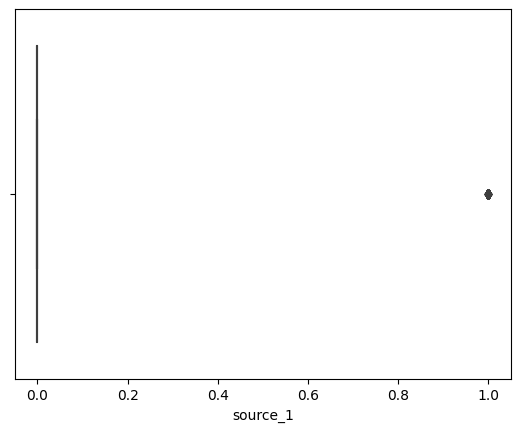

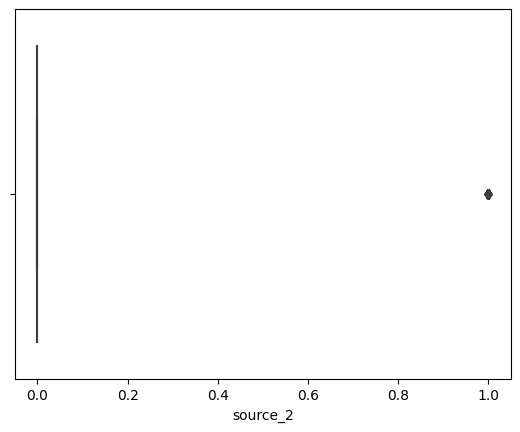

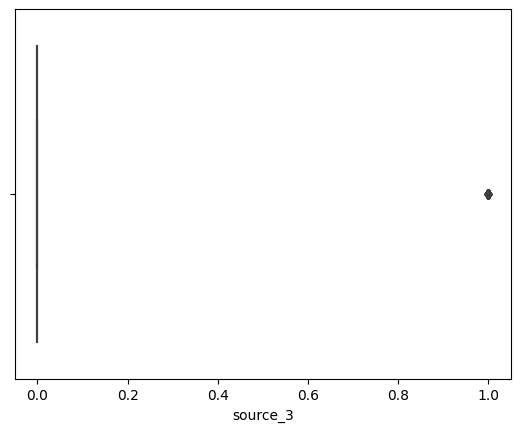

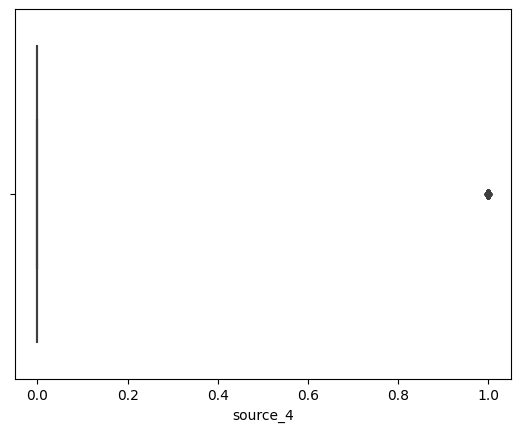

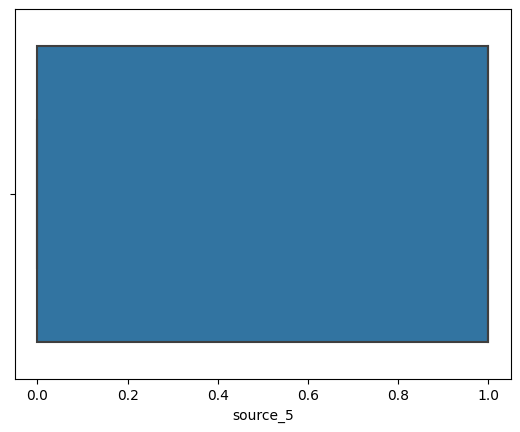

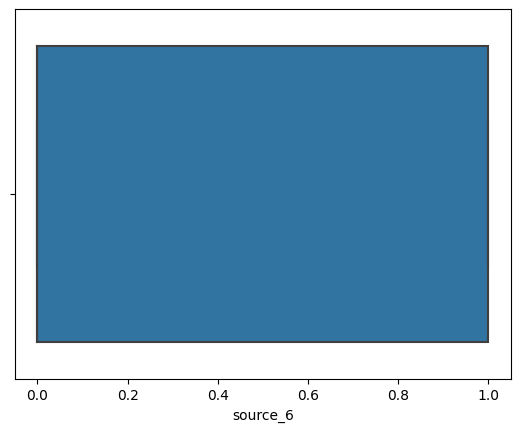

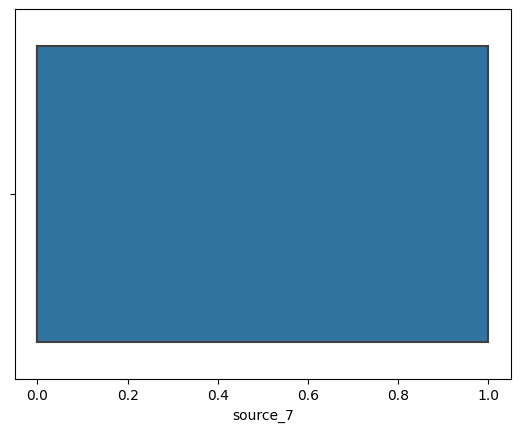

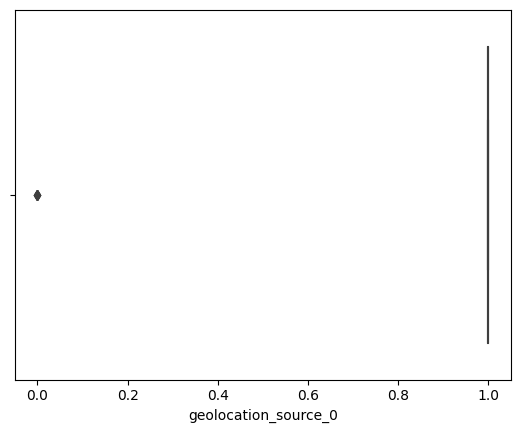

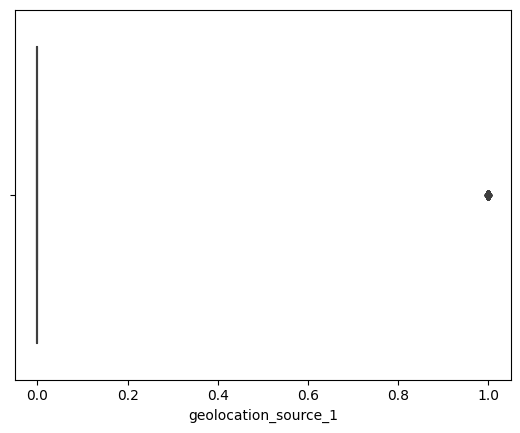

In [428]:
for i in merged9.columns:
    sns.boxplot(data=merged9, x=i)
    plt.show()

# Distribution of Data

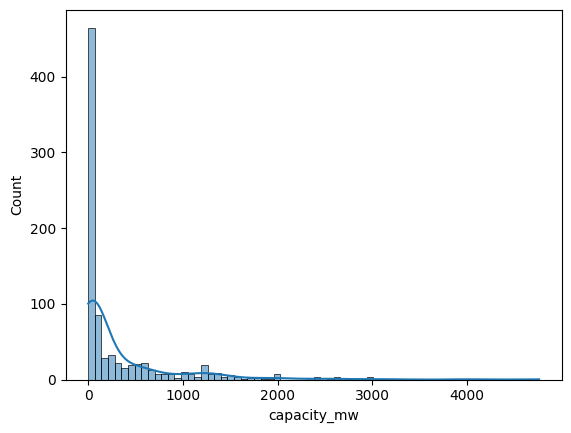

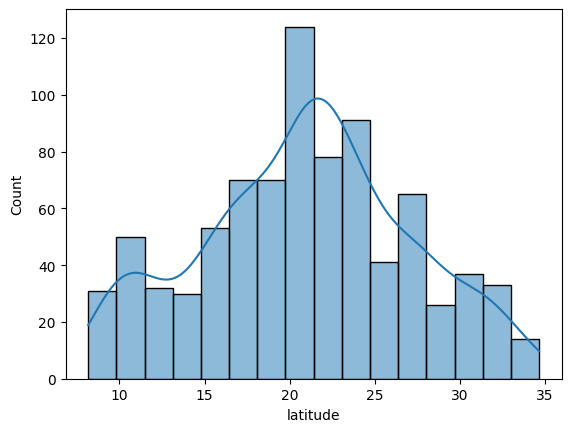

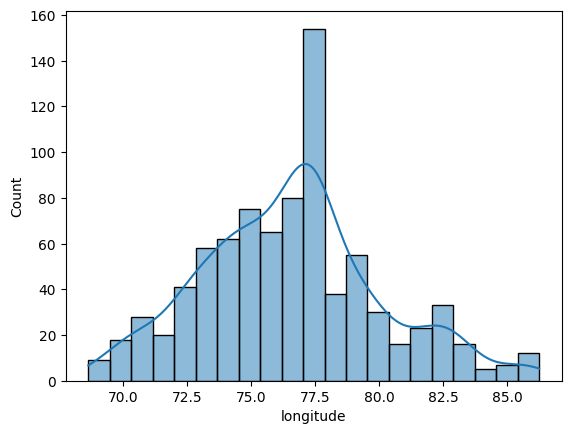

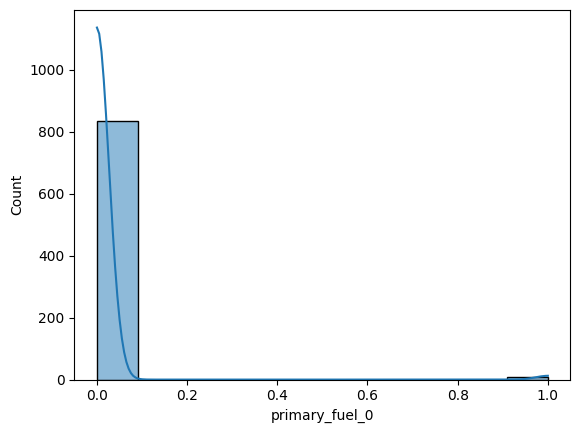

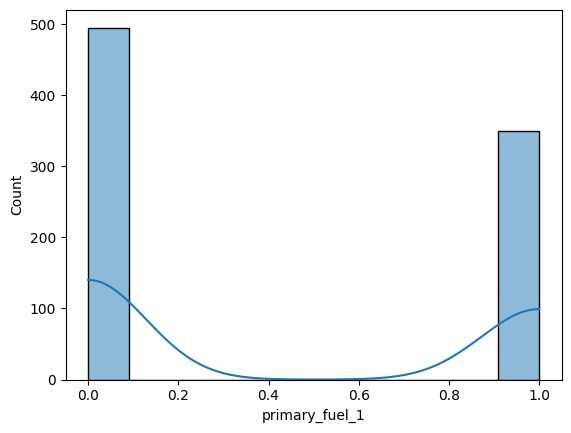

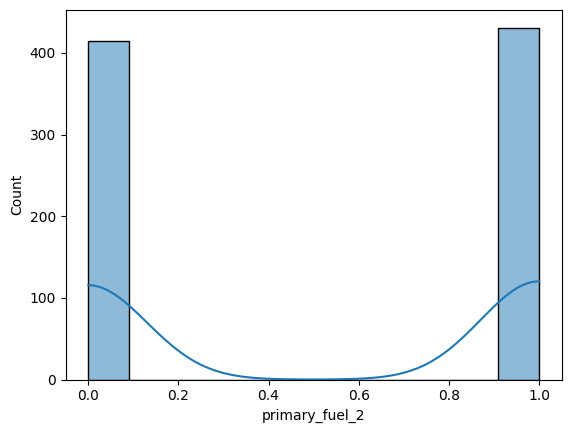

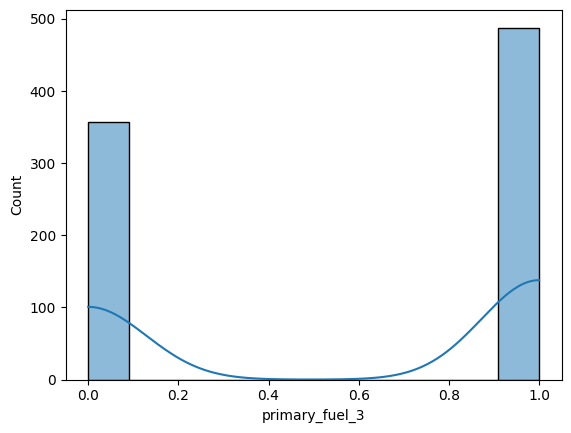

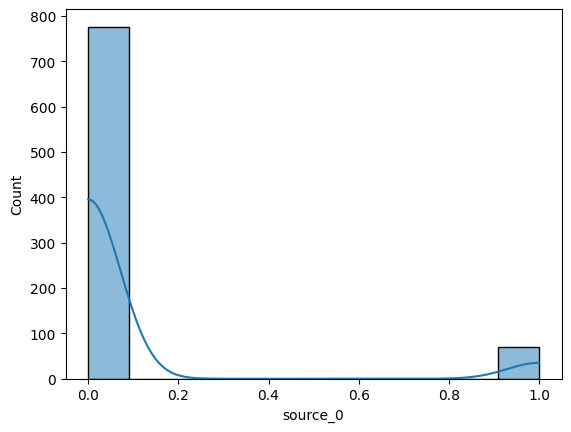

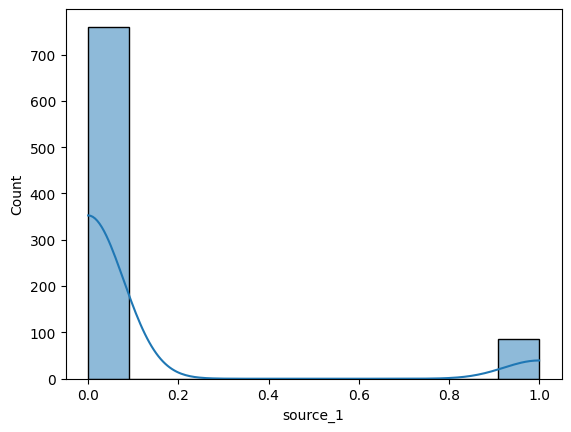

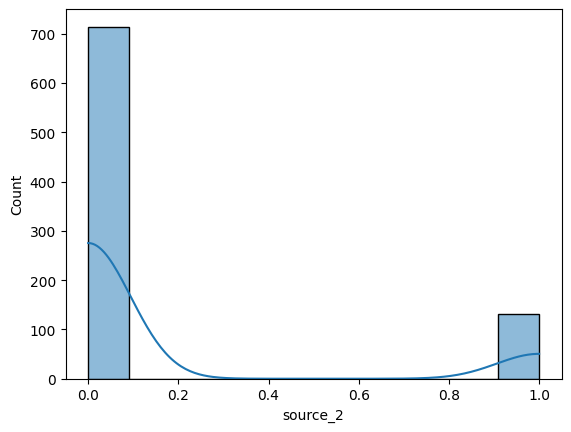

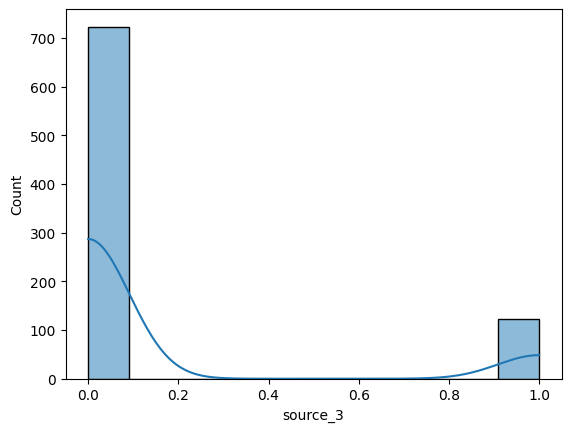

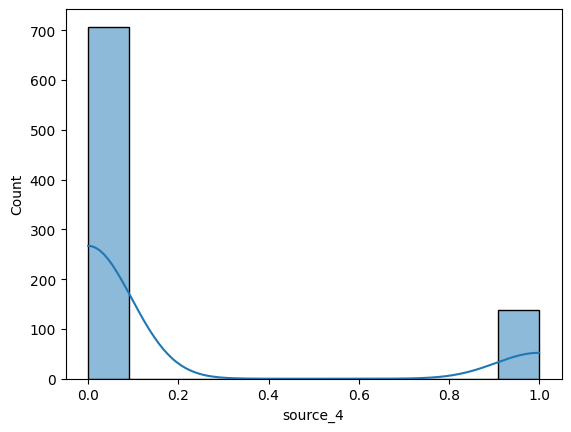

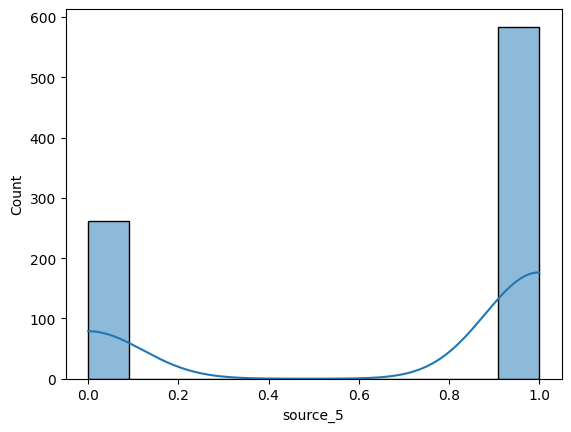

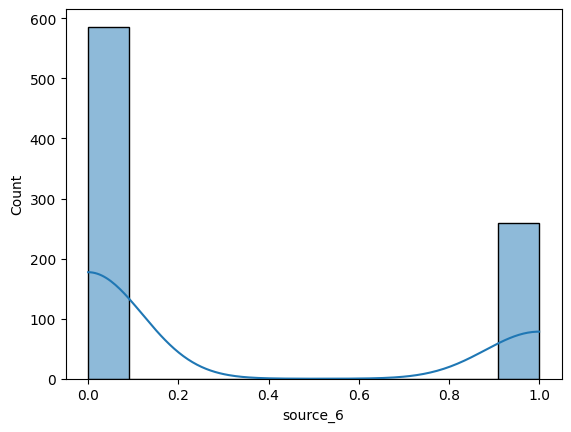

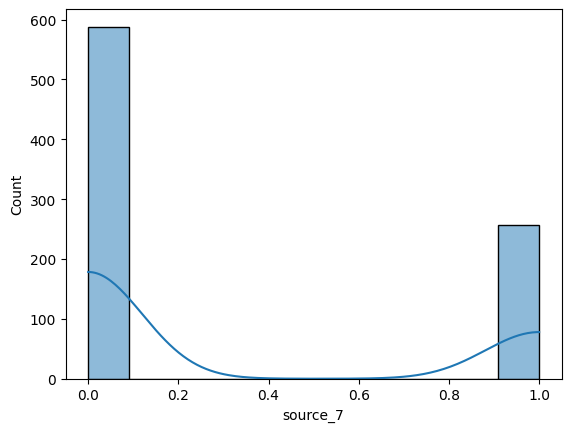

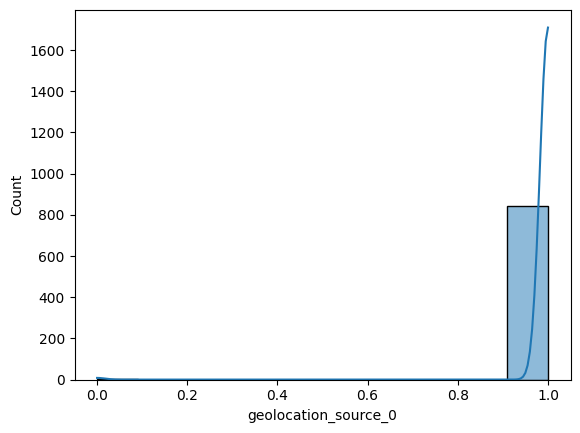

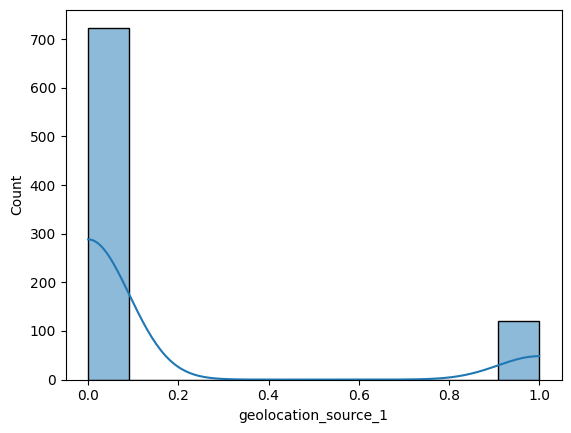

In [429]:
for i in merged9.columns:
    sns.histplot(data=merged9, x=i, kde=True)
    plt.show()

In [430]:
x = merged9.drop(['capacity_mw'], axis=1)
y = merged9['capacity_mw']

In [431]:
x

latitude  longitude  primary_fuel_0  primary_fuel_1  primary_fuel_2  \
0     28.1839    73.2407               0               0               0   
1     24.7663    74.6090               0               0               1   
2     21.9038    69.3732               0               0               1   
3     21.9603    82.4091               0               0               1   
4     23.7689    68.6447               0               0               1   
..        ...        ...             ...             ...             ...   
840   16.2949    77.3568               0               0               1   
841   12.8932    78.1654               0               0               0   
842   15.2758    75.5811               0               0               1   
843   24.3500    73.7477               0               0               1   
844    9.9344    77.4768               0               0               1   

     primary_fuel_3  source_0  source_1  source_2  source_3  source_4  \
0                 1         0         0         0         0         0   
1                 0         0         0         0         0         0   
2                 1         0         0         0         0         0   
3                 0         0         0         0         0         0   
4                 0         0         0         0         0         0   
..              ...       ...       ...       ...       ...       ...   
840               0         0         0         0         0         0   
841               1         0         1         0         0         1   
842               1         0         0         0         0         0   
843               0         0         0         1         0         1   
844               1         0         0         0         0         0   

     source_5  source_6  source_7  geolocation_source_0  geolocation_source_1  
0           0         0         1                     0                     1  
1           0         1         0                     1                     0  
2           0         1         1                     1                     0  
3           1         0         0                     1                     0  
4           1         0         0                     1                     0  
..        ...       ...       ...                   ...                   ...  
840         1         0         0                     1                     0  
841         1         1         1                     1                     1  
842         0         1         1                     1                     0  
843         0         1         0                     1                     0  
844         0         1         1                     1                     0  

[845 rows x 16 columns]

# Distribution of Data

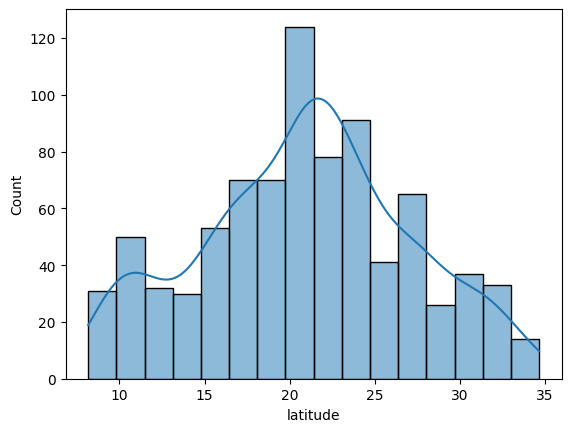

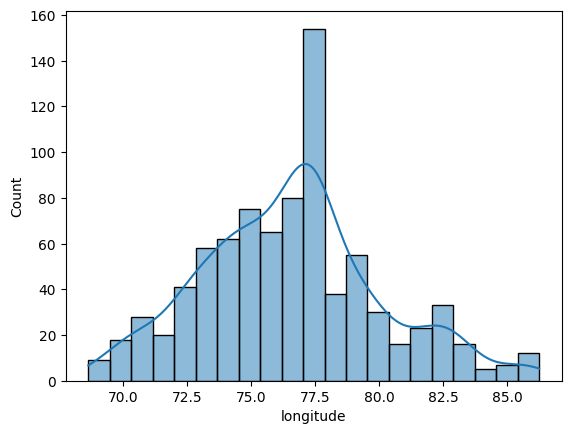

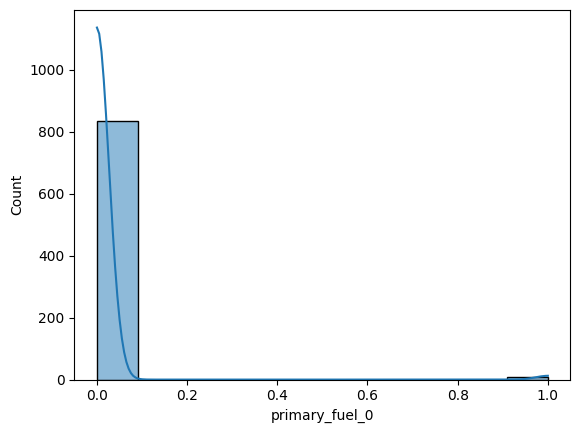

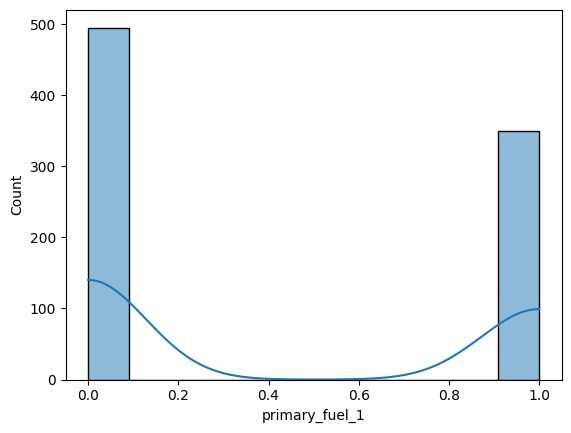

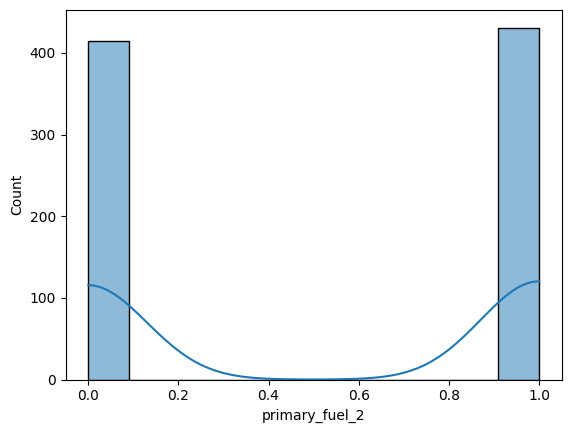

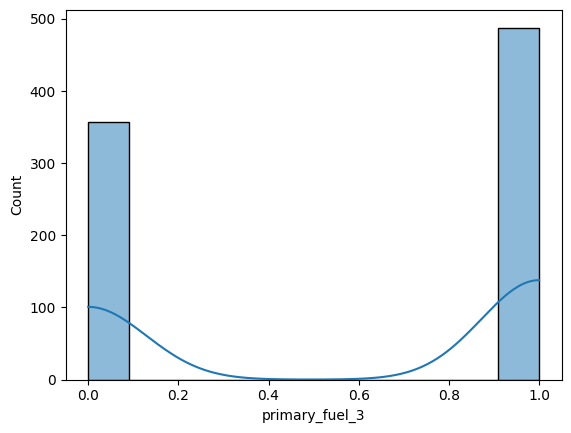

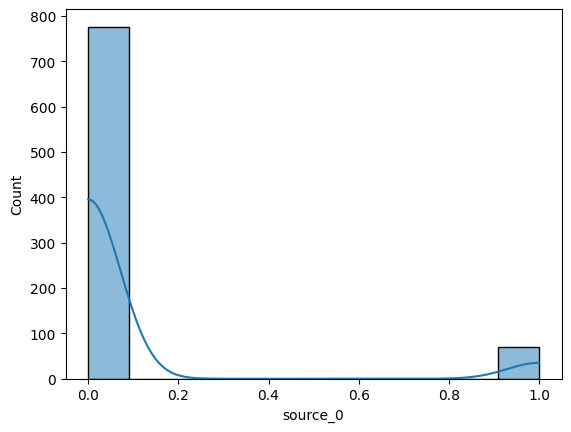

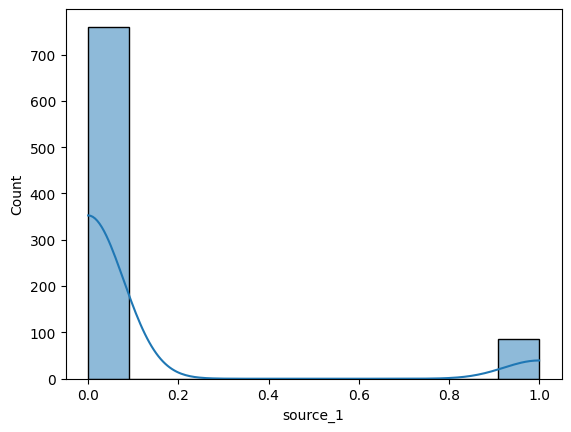

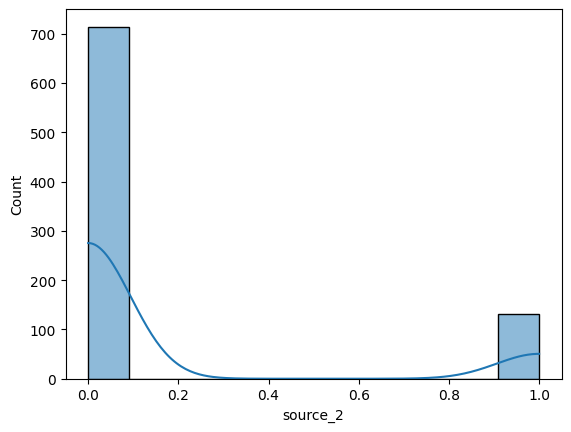

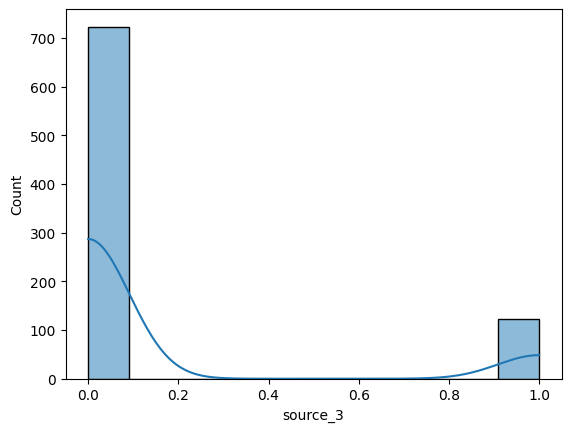

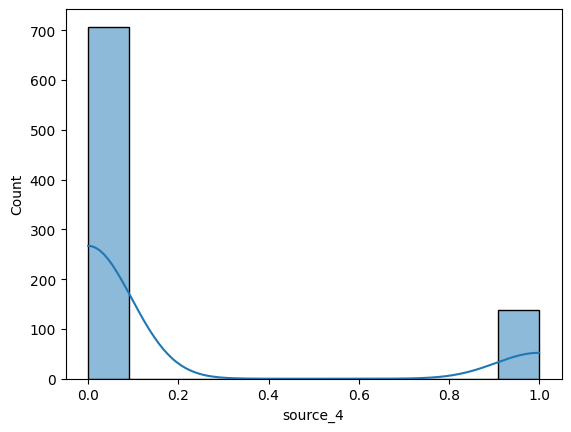

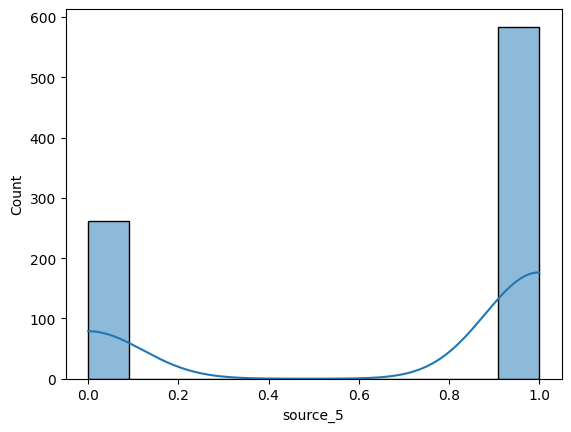

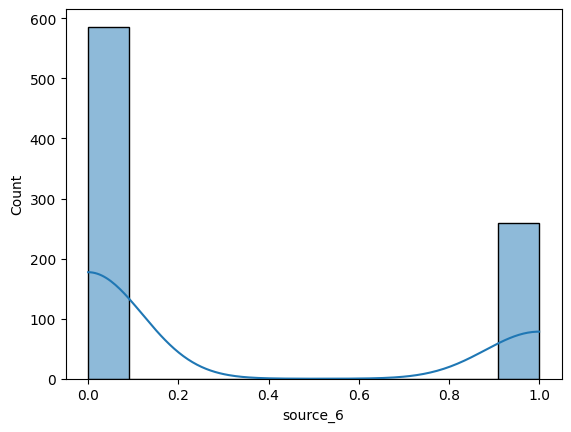

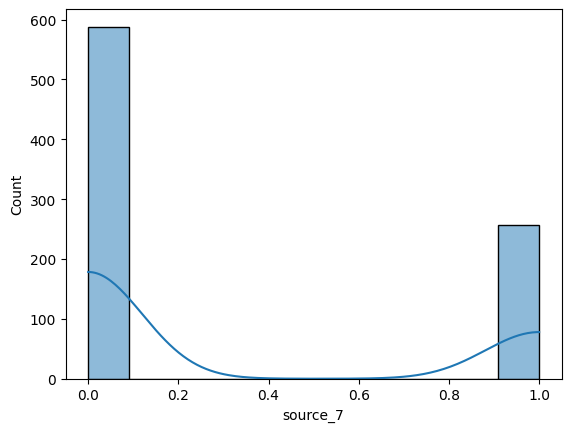

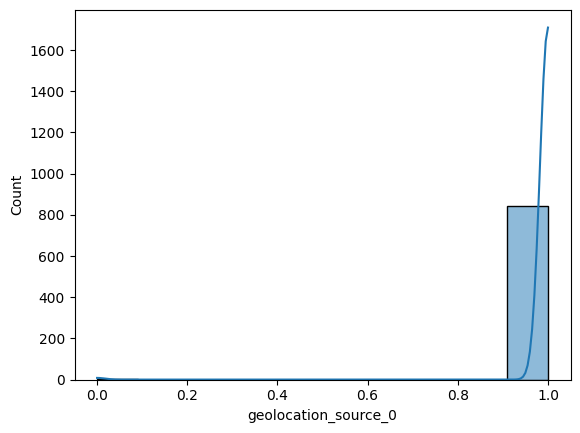

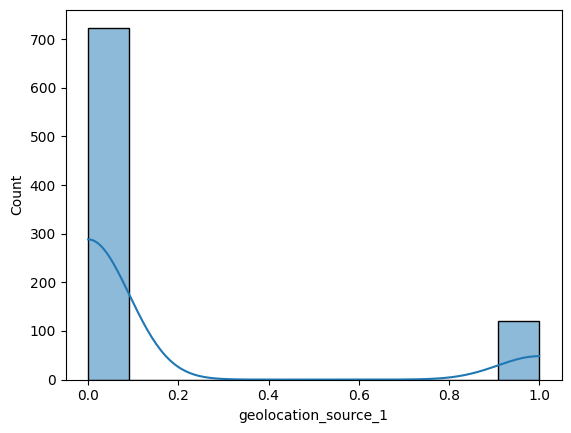

In [433]:
for i in x.columns:
    sns.histplot(data=x, x = i, kde=True)
    plt.show()

# distribution of data is sort of normal 

# Transforming through PolynomialFeatures

In [434]:
from sklearn.preprocessing import PolynomialFeatures

In [517]:
degree = 2  
poly_features = PolynomialFeatures(degree=degree)
x_poly = pd.DataFrame(poly_features.fit_transform(x))

In [518]:
x_poly

0        1        2    3    4    5    6    7    8    9    ...  143  144  \
0    1.0  28.1839  73.2407  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0   
1    1.0  24.7663  74.6090  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
2    1.0  21.9038  69.3732  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0  1.0   
3    1.0  21.9603  82.4091  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
4    1.0  23.7689  68.6447  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
..   ...      ...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
840  1.0  16.2949  77.3568  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
841  1.0  12.8932  78.1654  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  1.0   
842  1.0  15.2758  75.5811  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0  1.0   
843  1.0  24.3500  73.7477  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0  0.0   
844  1.0   9.9344  77.4768  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0  1.0   

     145  146  147  148  149  150  151  152  
0    0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2    1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  
840  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
841  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
842  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
843  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
844  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  

[845 rows x 153 columns]

# Skewness check

In [437]:
x_poly.skew()

0       0.000000
1      -0.045662
2       0.296790
3       9.551094
4       0.348982
         ...    
148     0.877507
149     3.119711
150   -14.456710
151     2.097271
152     2.040926
Length: 153, dtype: float64

# Transforming through PowerTransformer

In [578]:
pt = QuantileTransformer()

In [579]:
transformed = pd.DataFrame(pt.fit_transform(x_poly))
transformed

0         1         2    3    4    5    6    7    8    9    ...  143  \
0    0.0  0.873223  0.180095  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
1    0.0  0.746445  0.290284  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  1.0   
2    0.0  0.569905  0.009479  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0   
3    0.0  0.573460  0.922986  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
4    0.0  0.689573  0.000000  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
..   ...       ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
840  0.0  0.220379  0.597156  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
841  0.0  0.127962  0.738152  0.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0   
842  0.0  0.189573  0.385071  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0   
843  0.0  0.723934  0.208531  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...  1.0   
844  0.0  0.039100  0.668246  0.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  1.0   

     144  145  146  147  148  149  150  151  152  
0    0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
1    0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2    1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
3    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4    0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  
840  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
841  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  
842  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
843  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
844  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  

[845 rows x 153 columns]

# distribution After applying tranformer

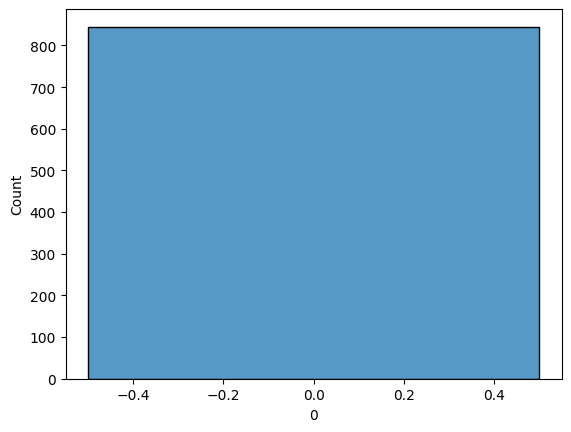

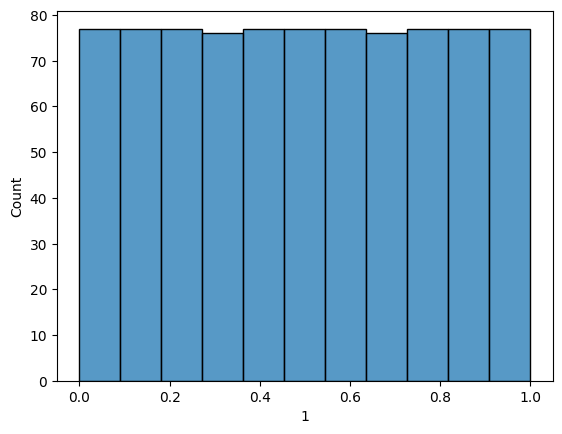

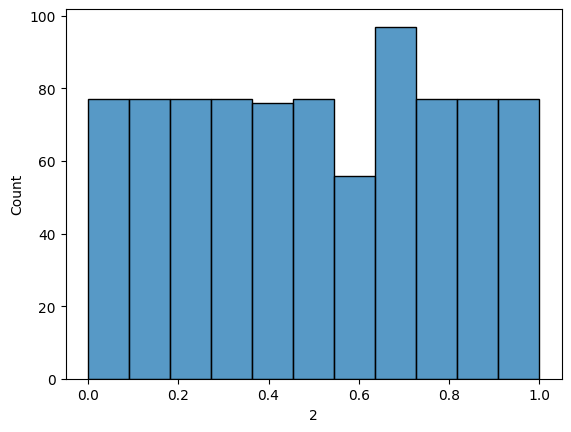

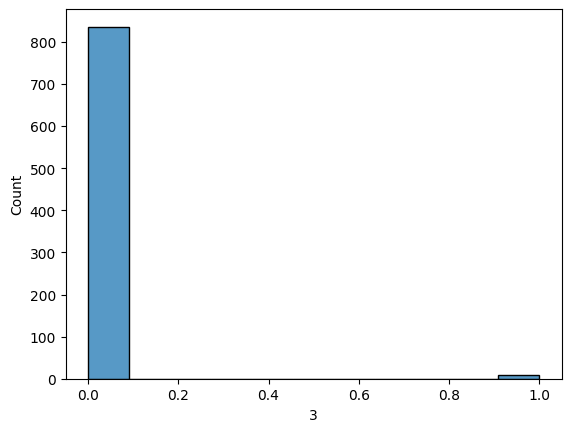

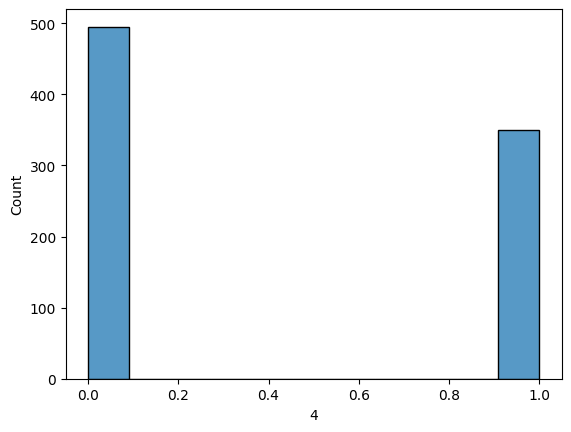

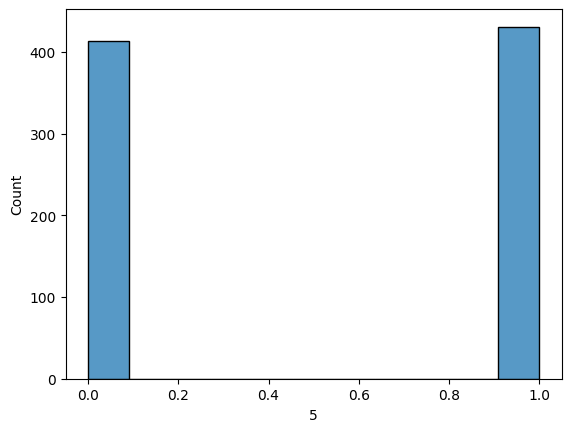

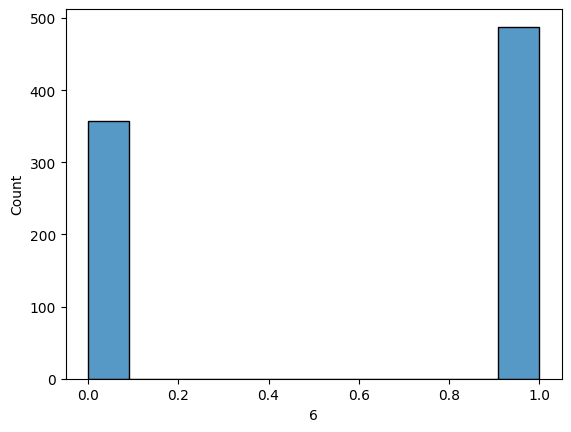

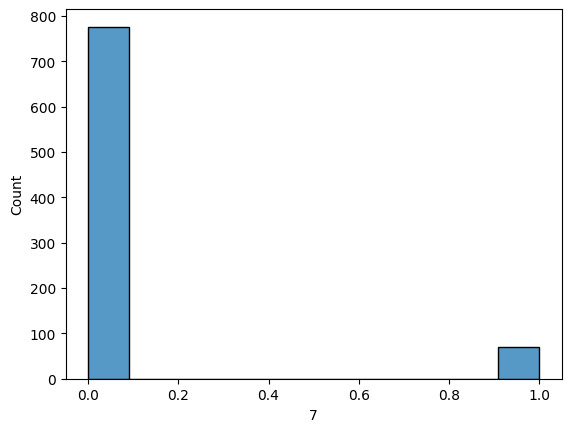

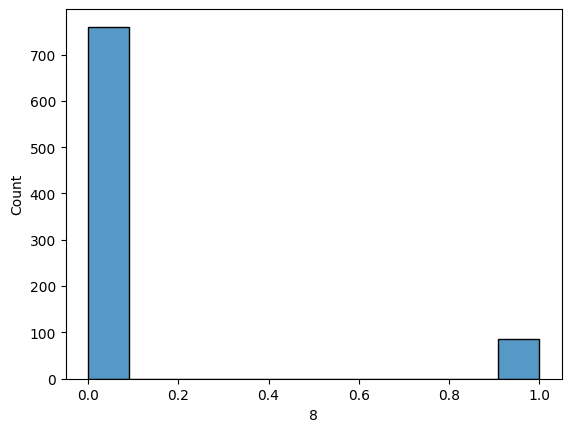

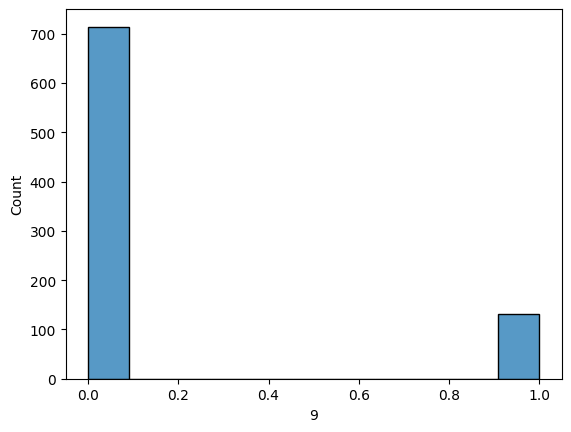

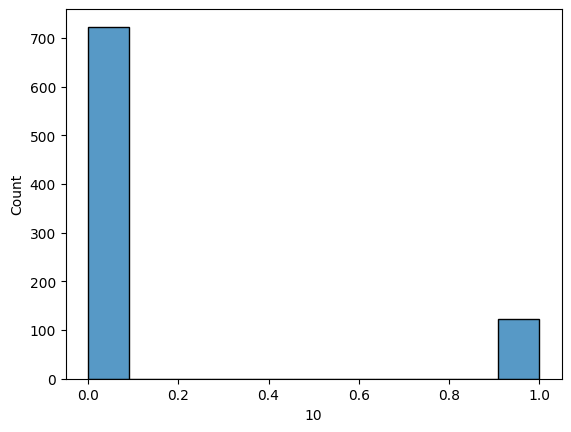

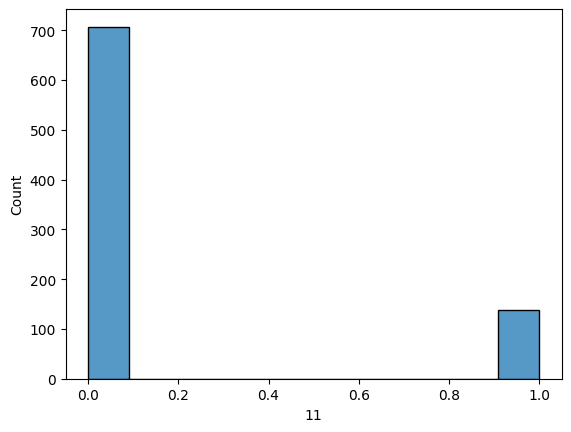

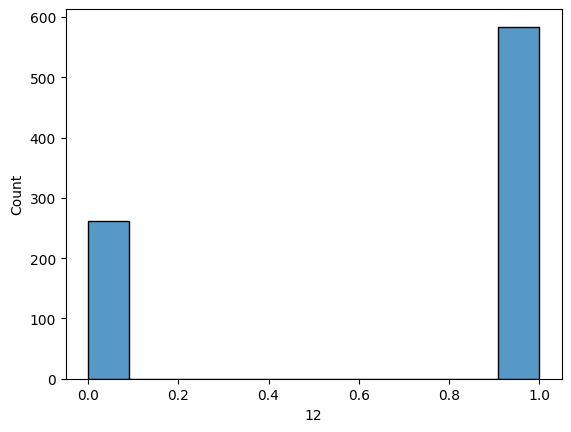

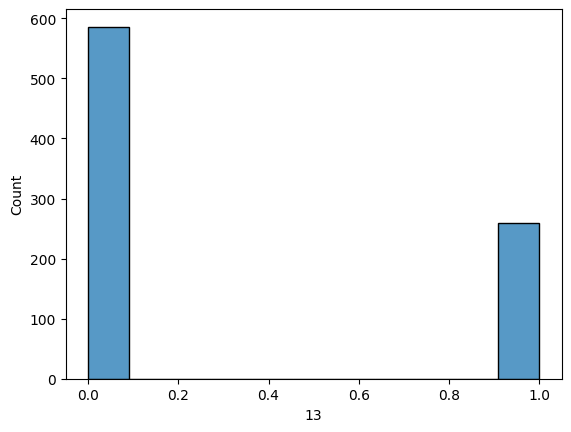

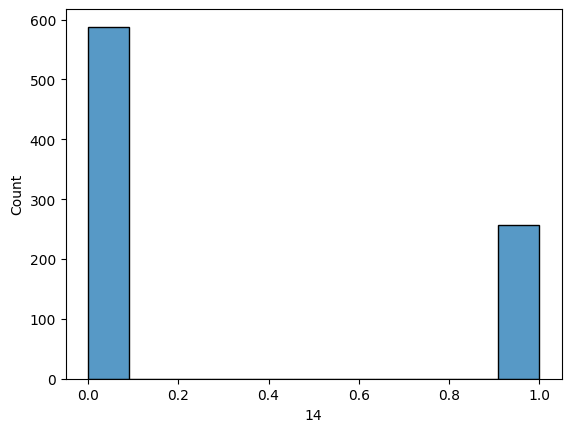

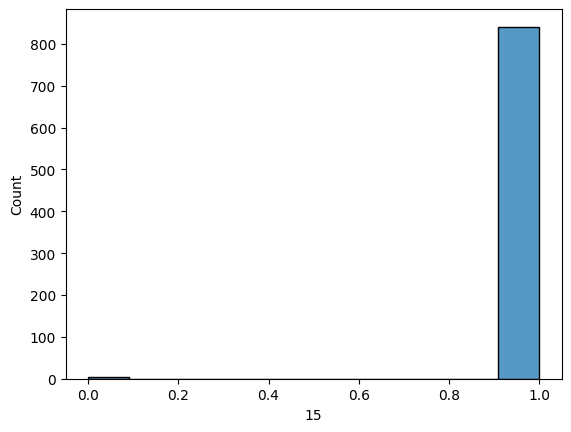

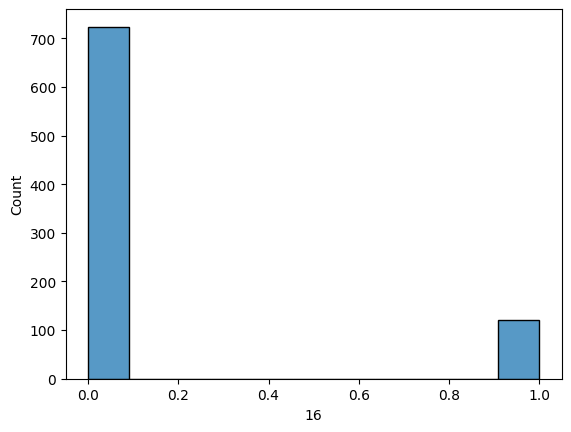

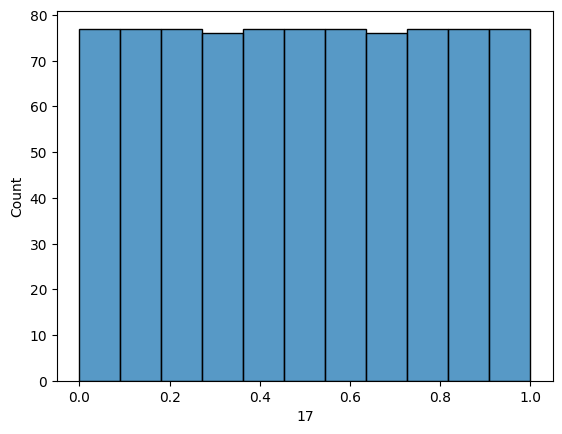

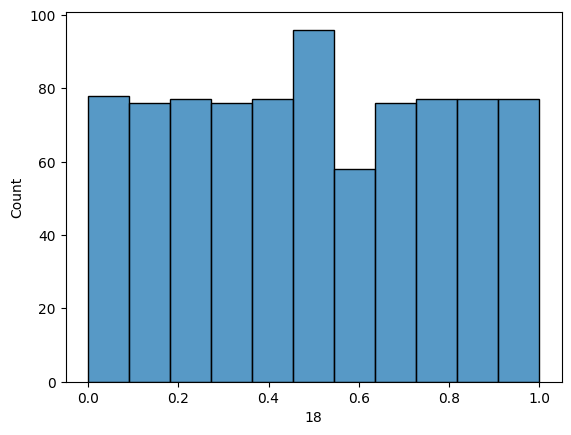

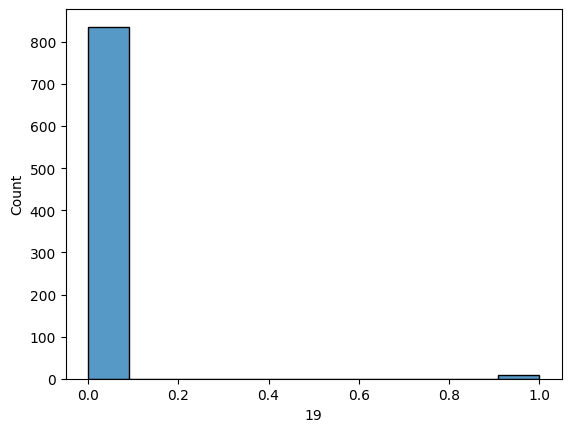

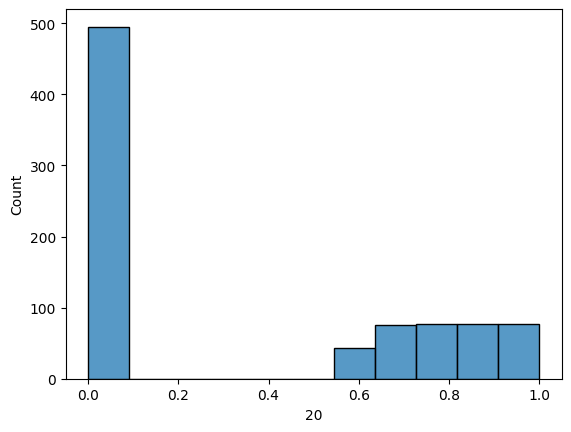

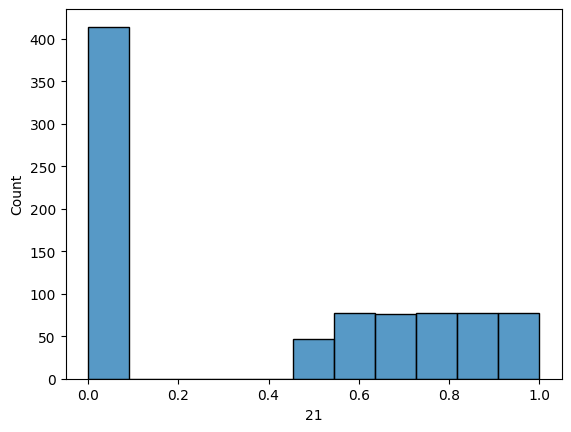

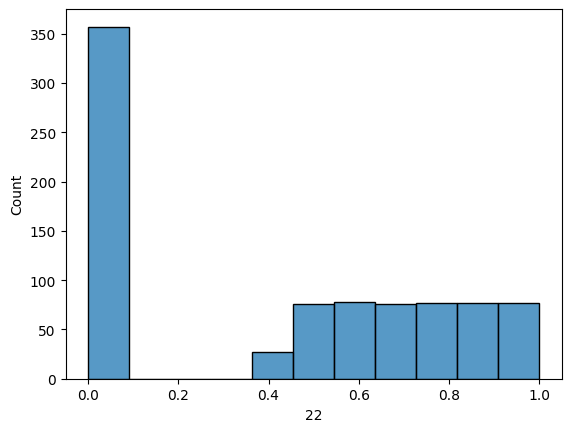

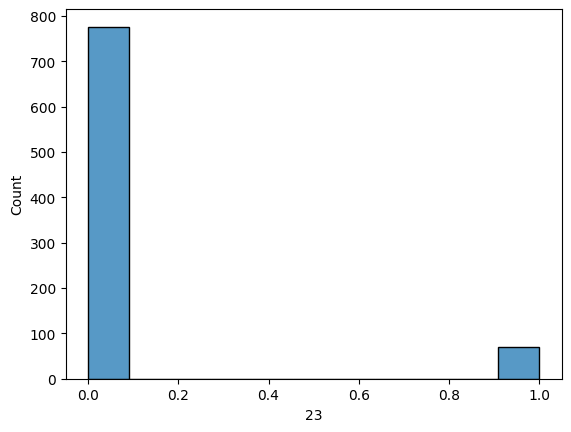

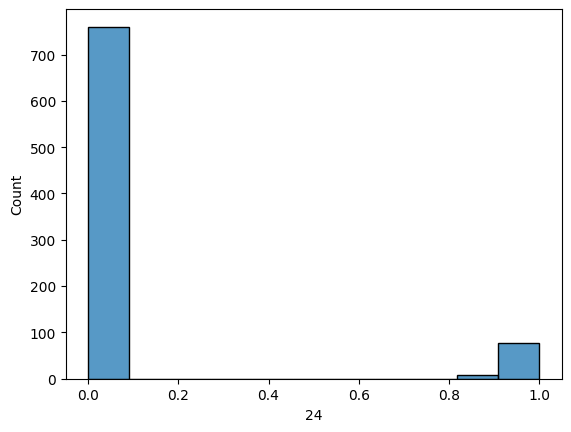

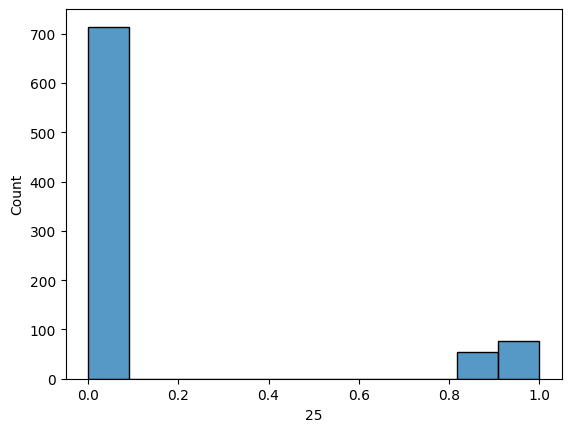

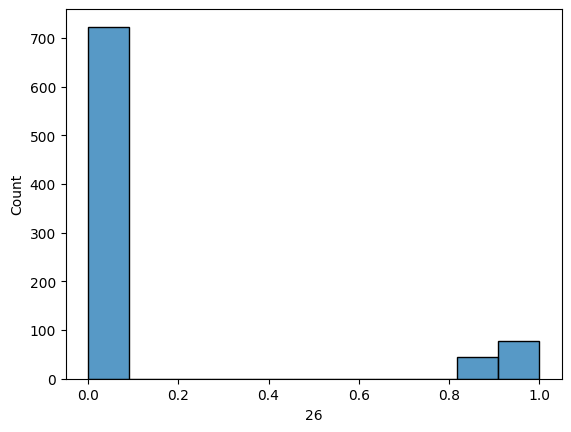

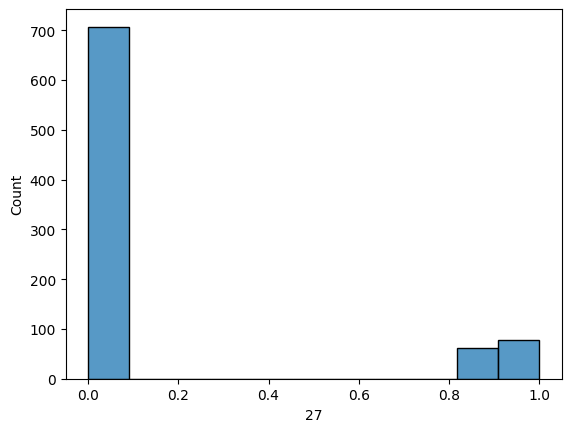

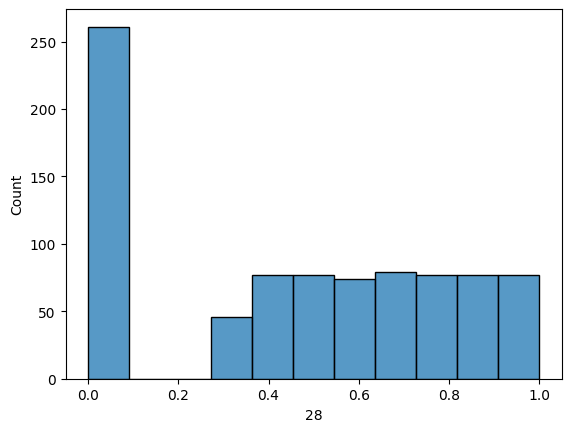

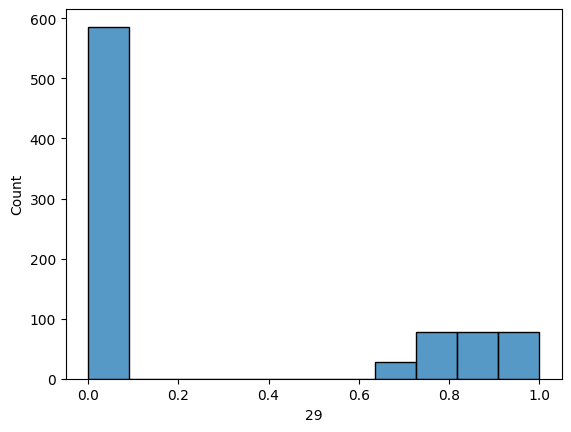

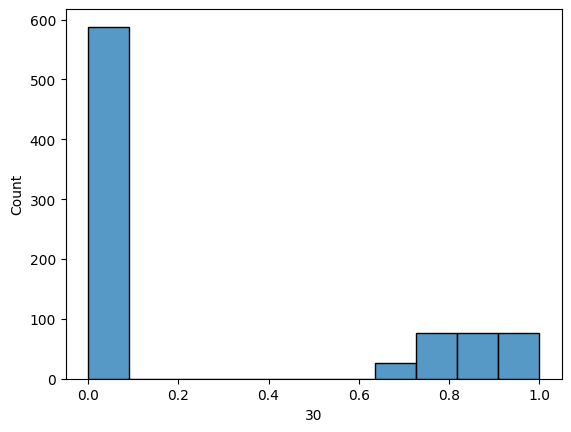

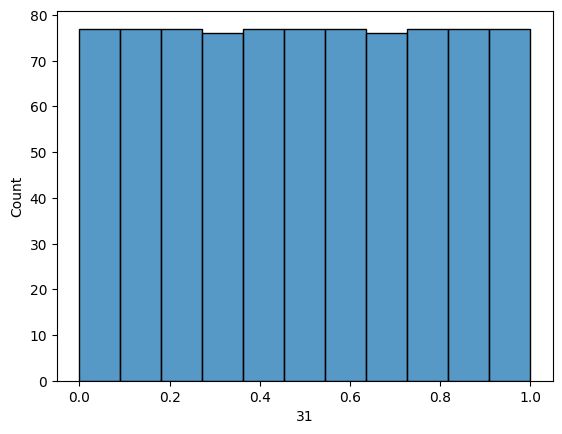

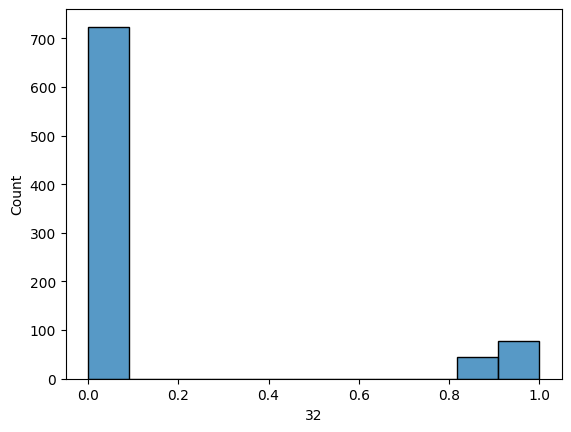

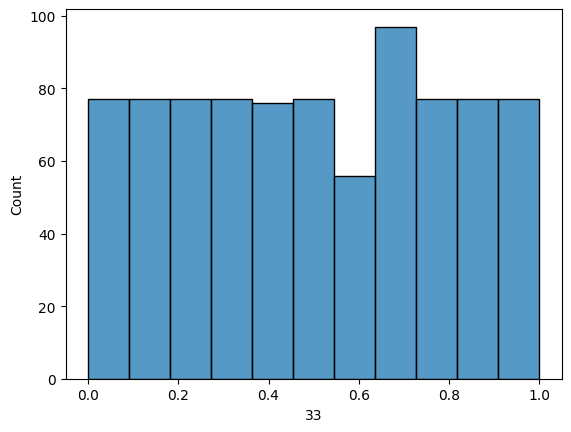

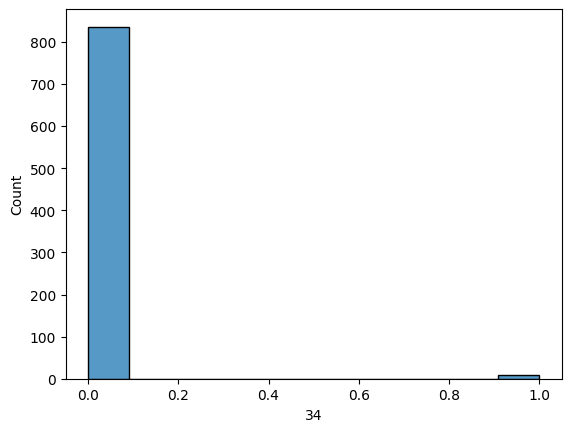

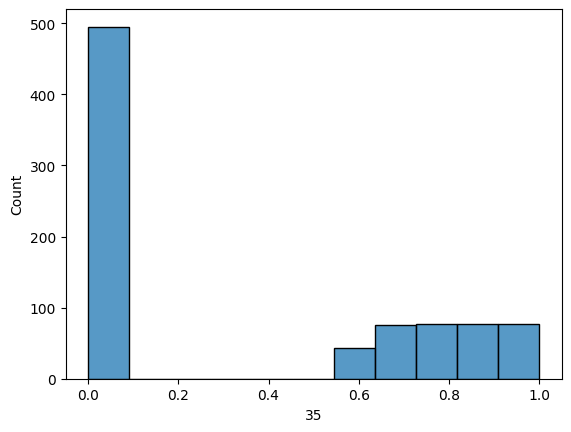

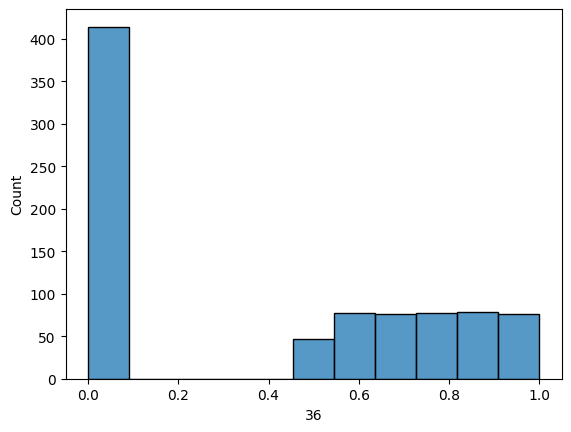

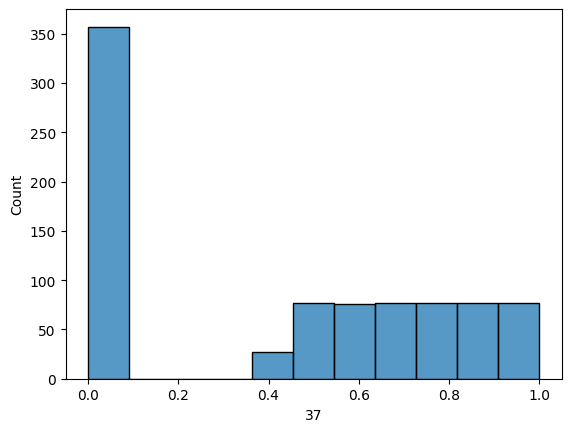

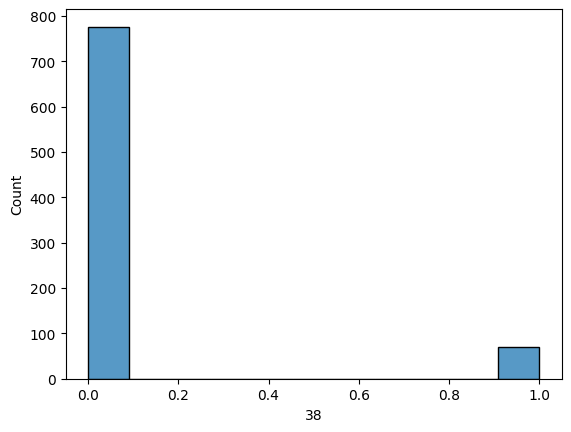

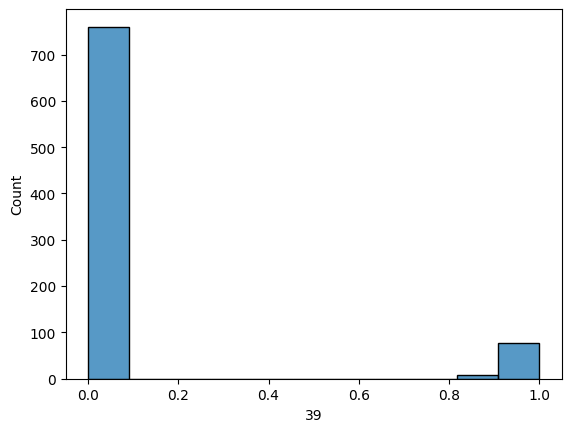

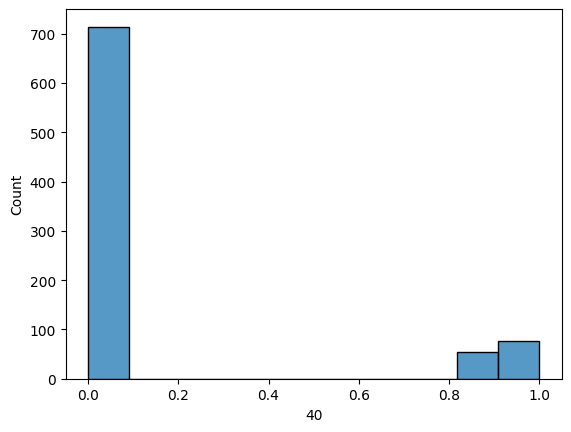

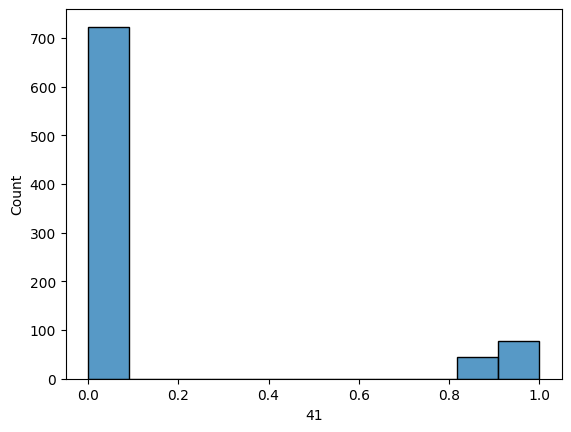

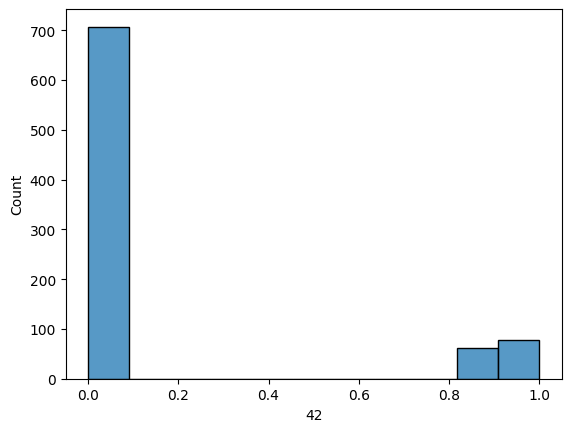

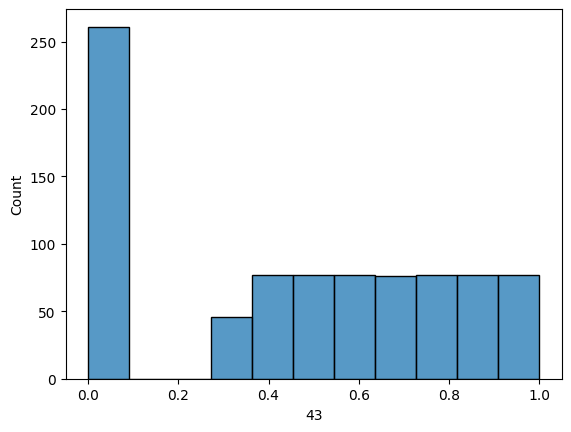

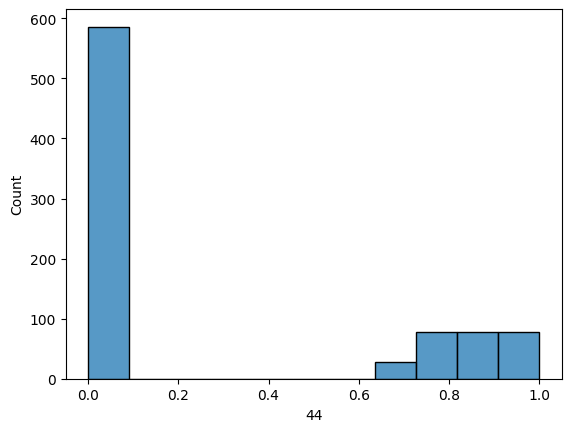

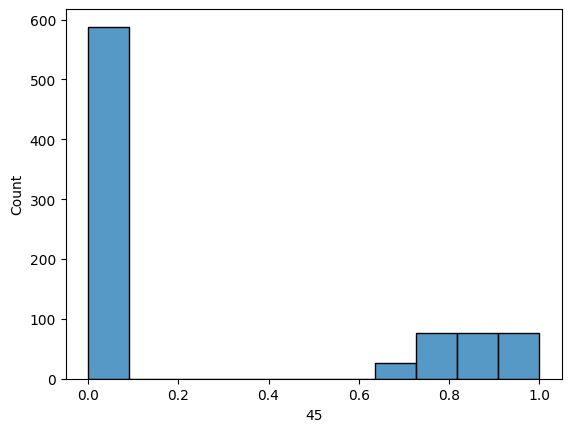

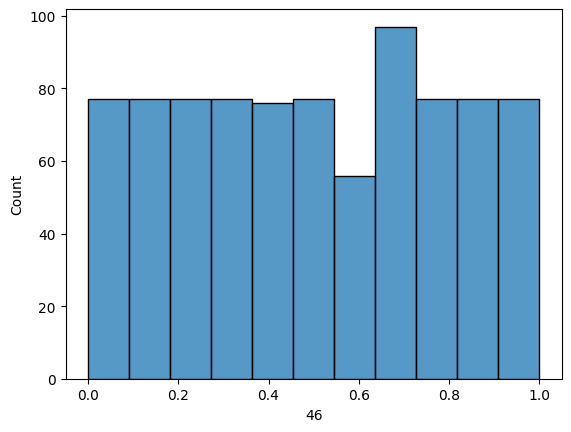

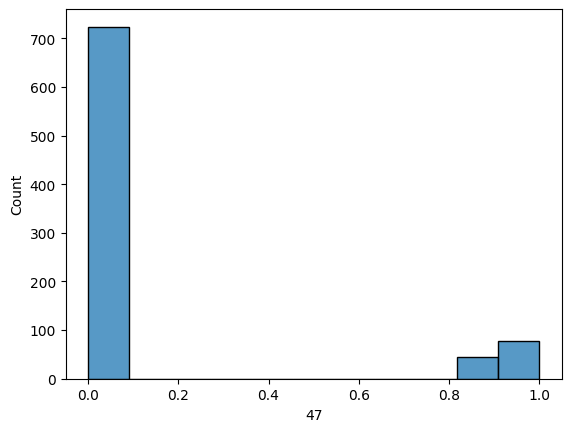

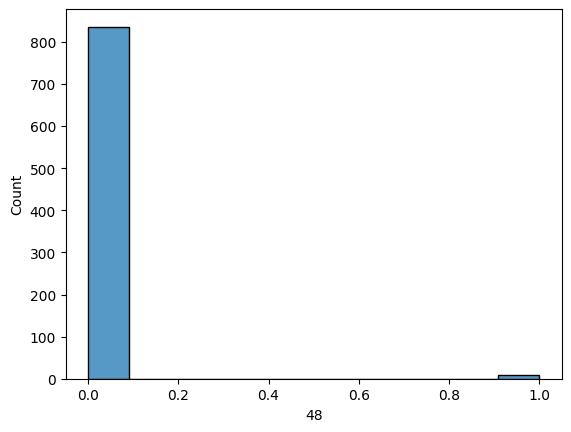

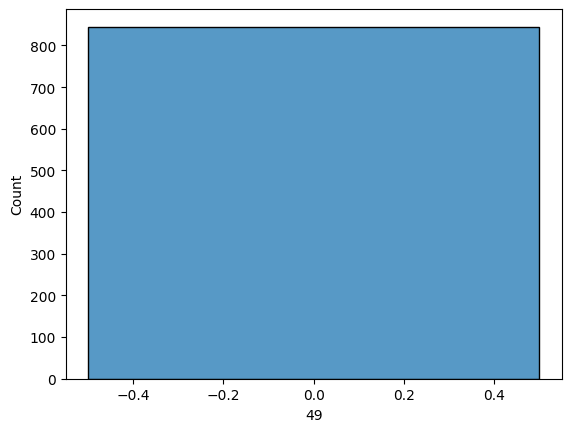

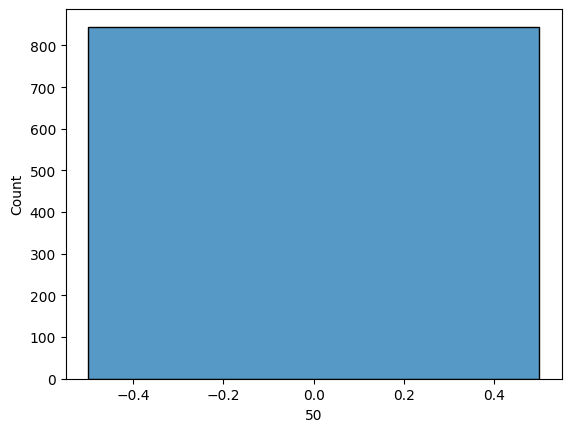

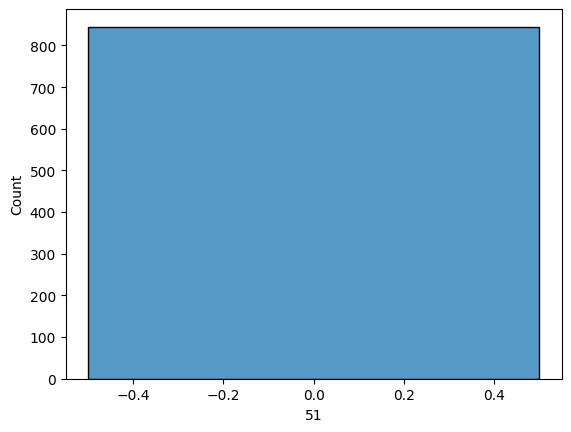

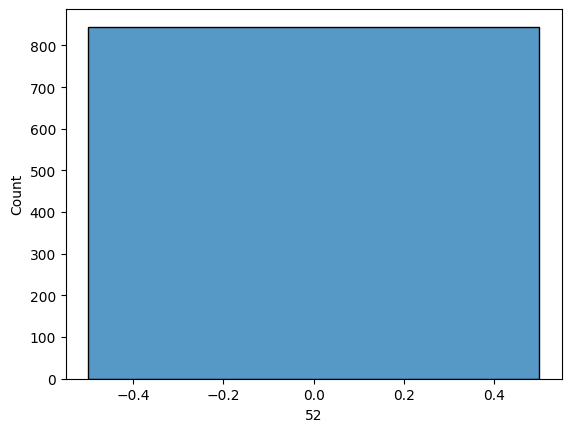

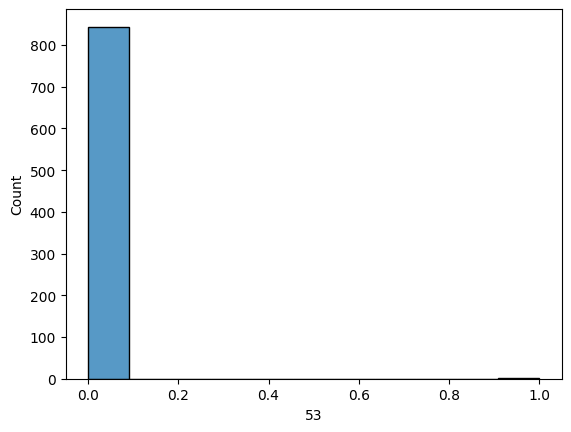

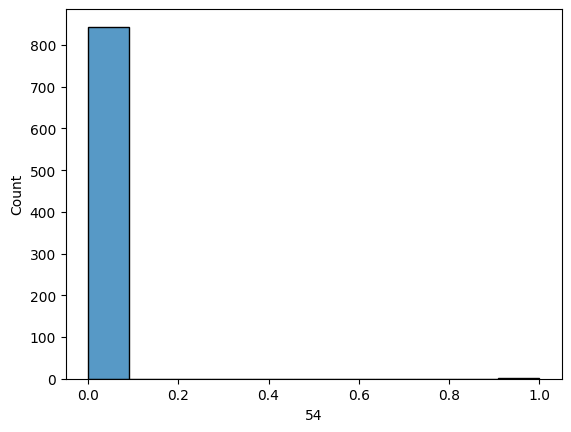

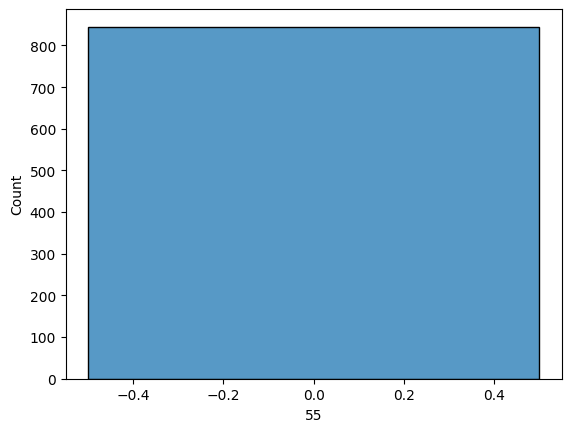

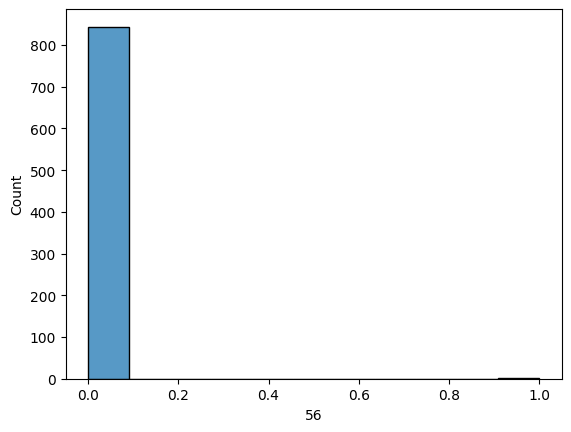

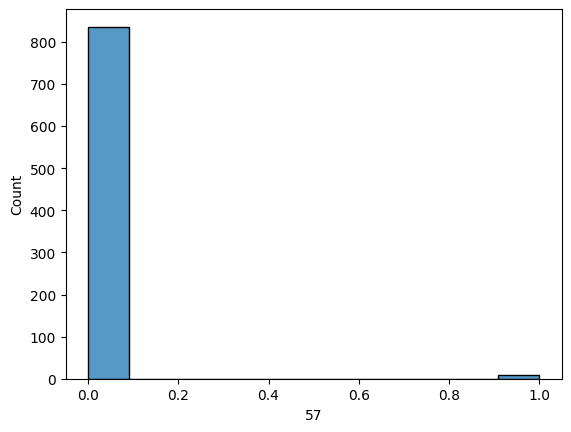

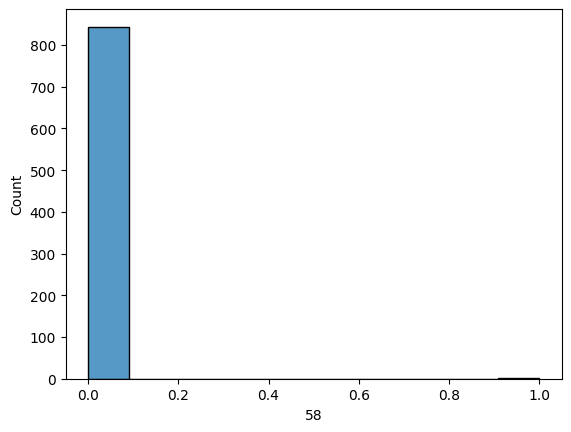

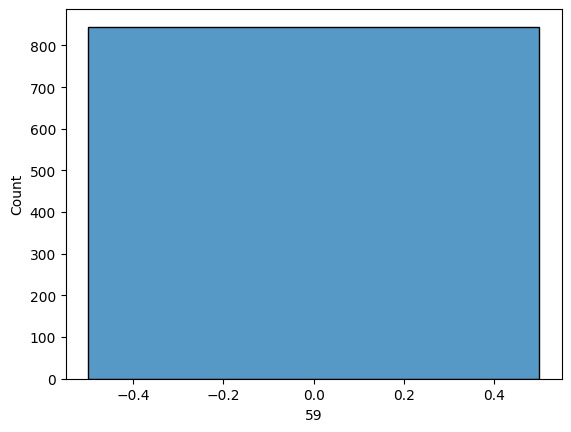

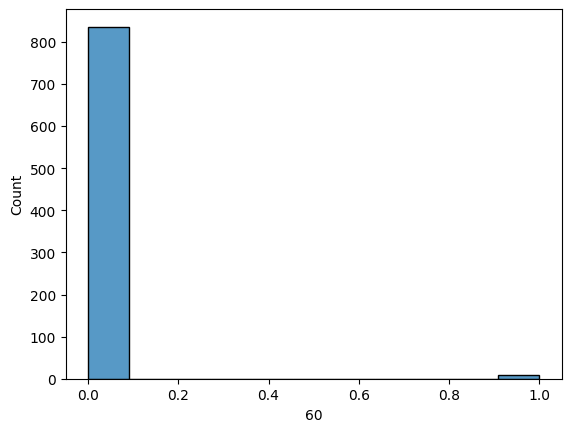

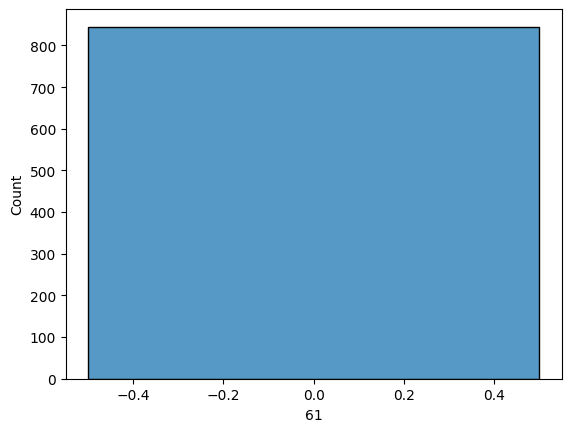

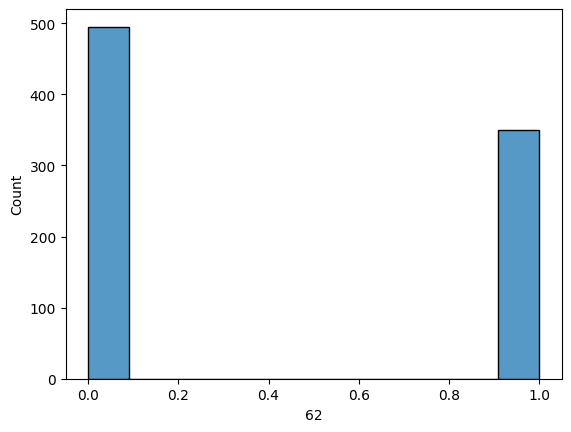

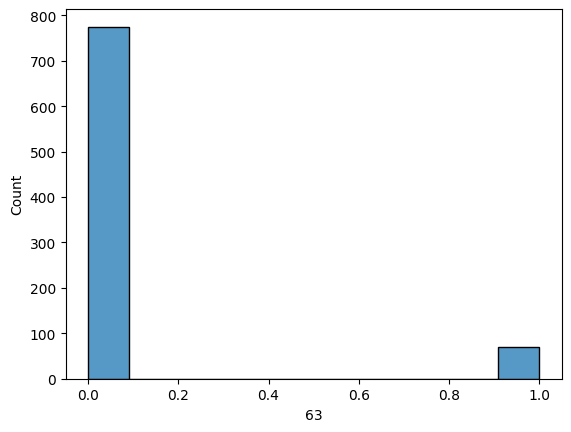

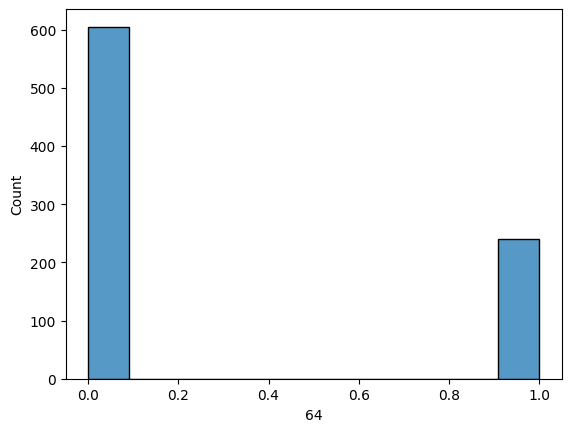

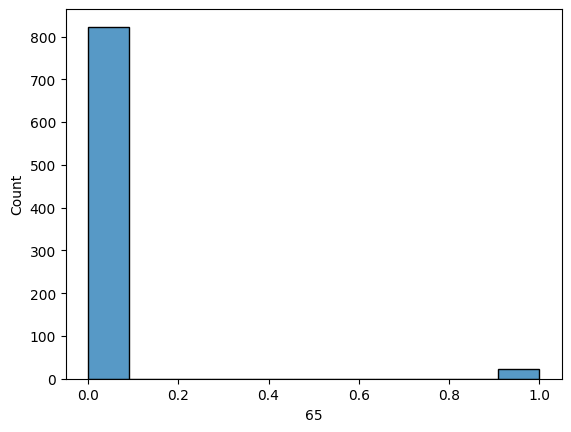

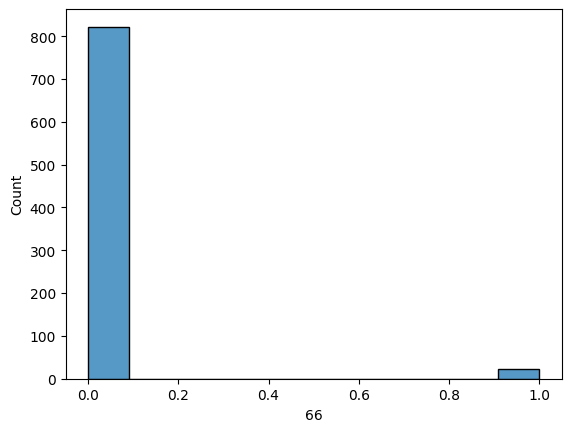

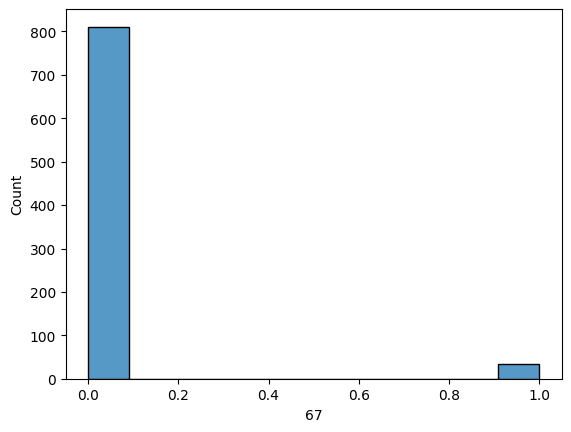

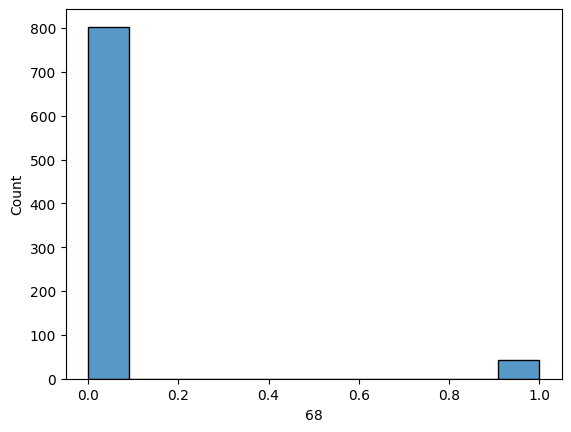

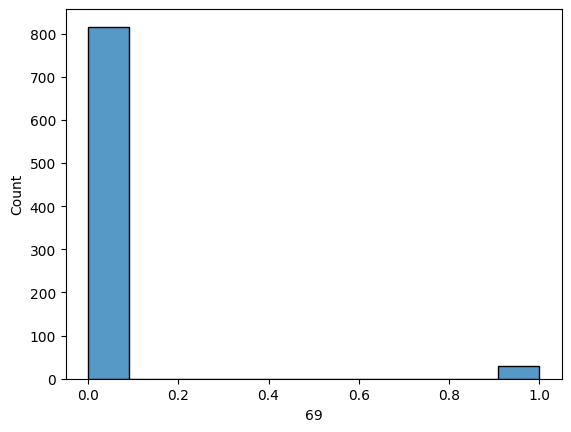

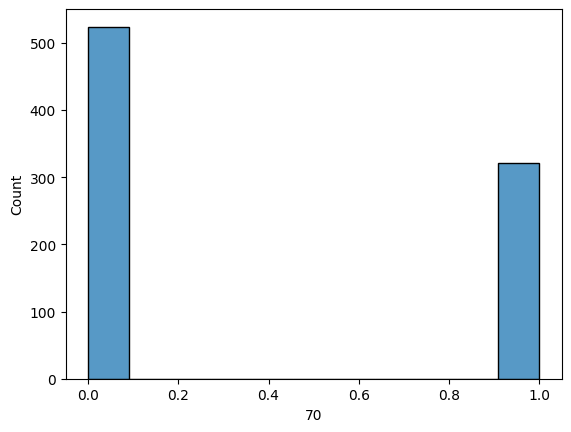

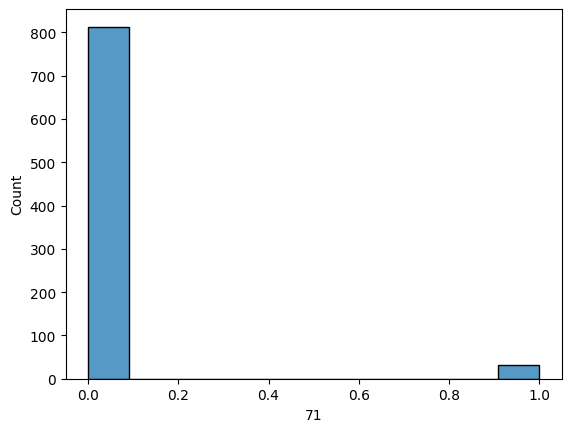

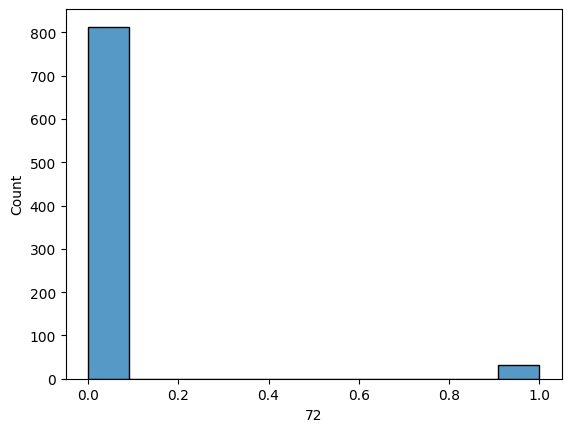

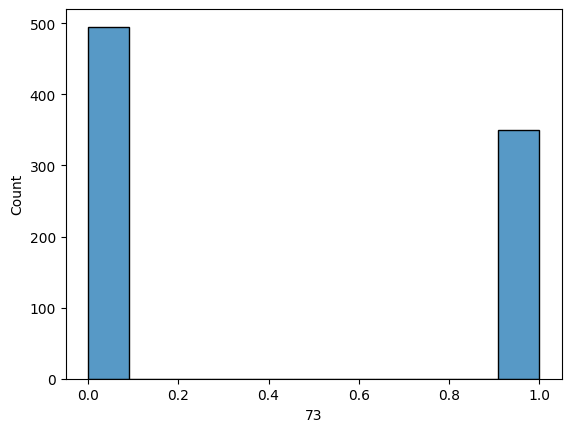

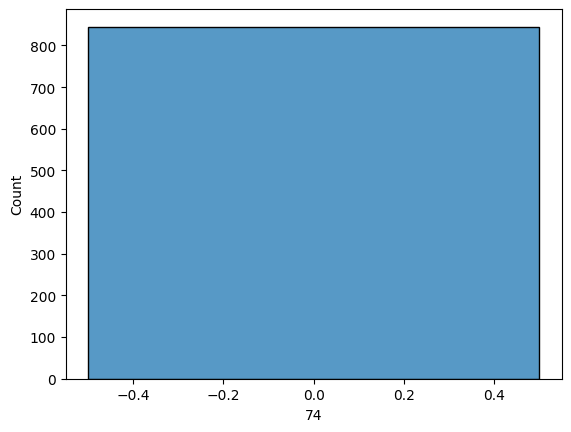

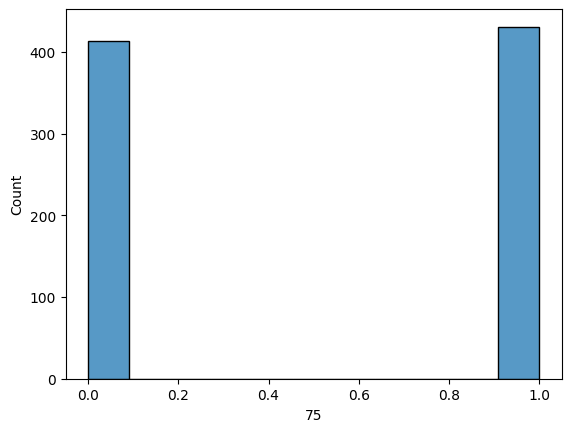

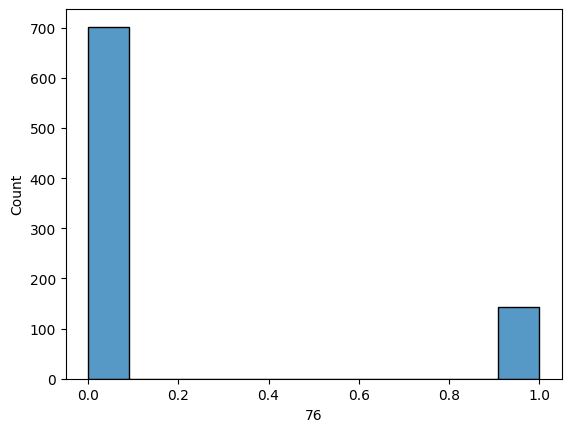

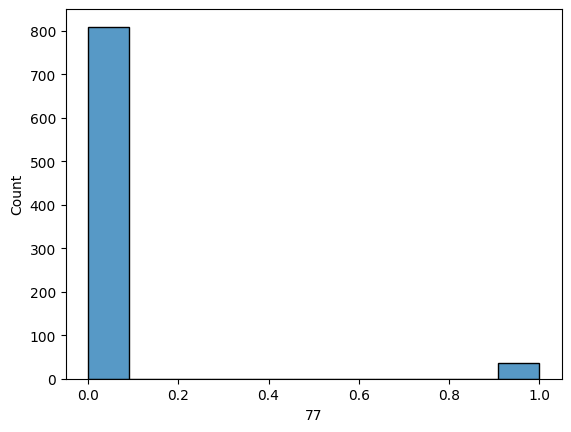

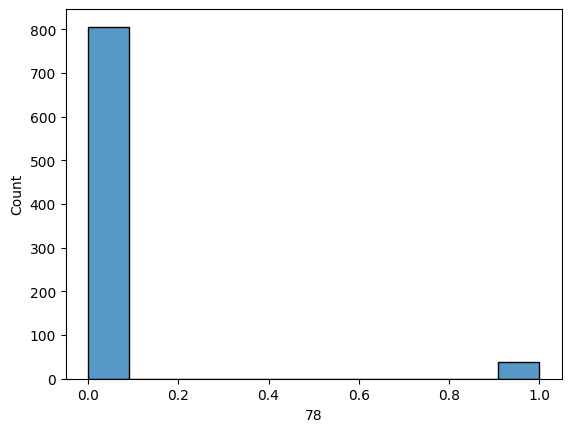

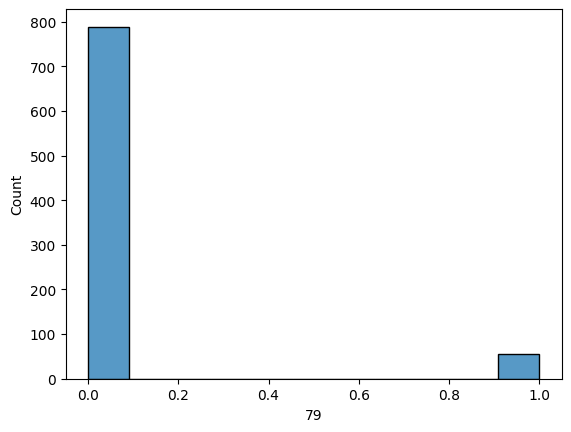

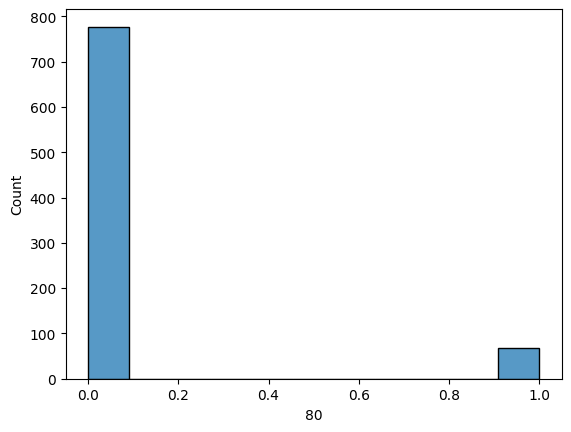

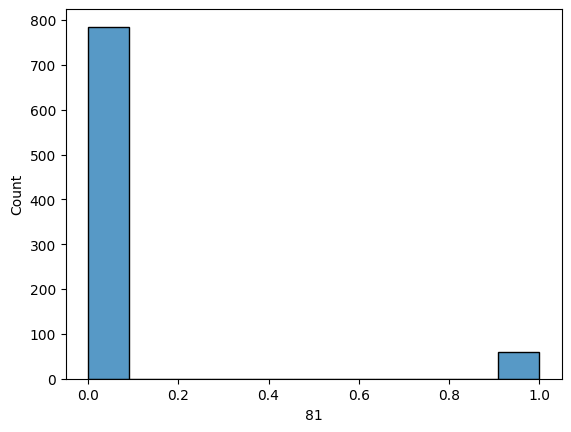

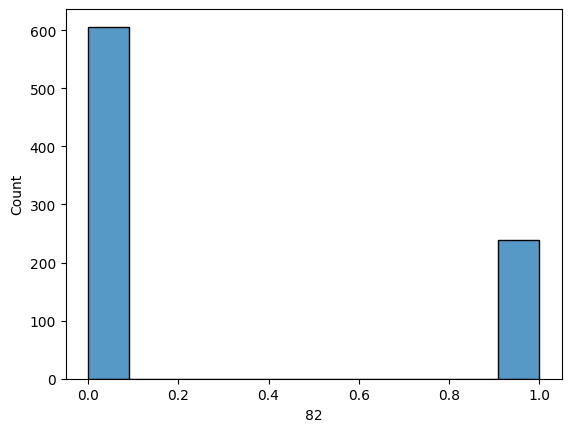

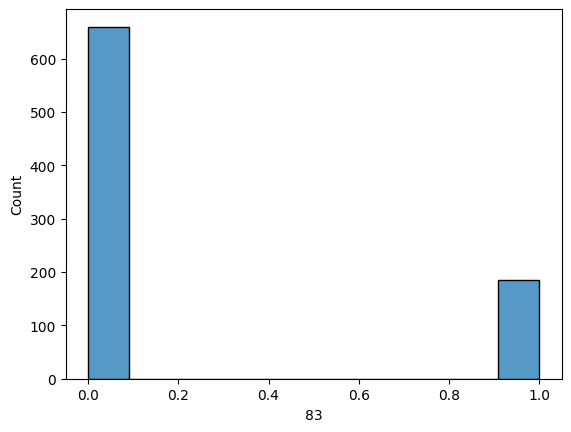

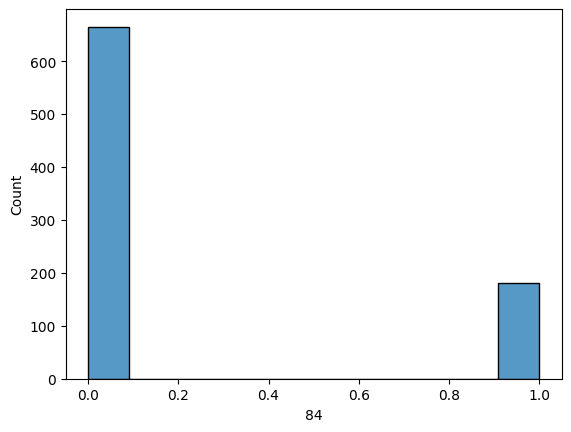

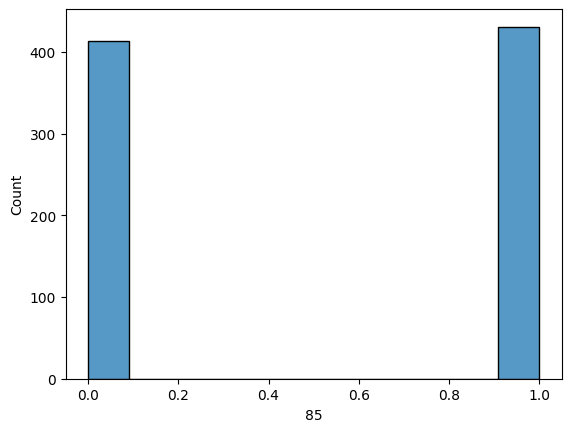

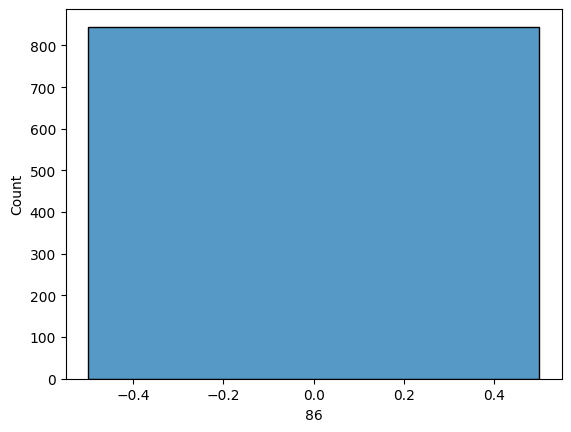

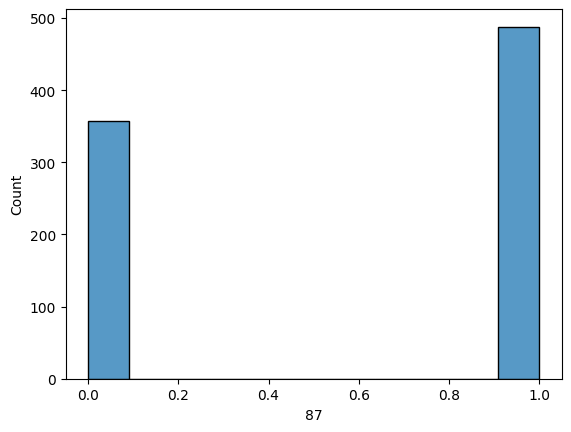

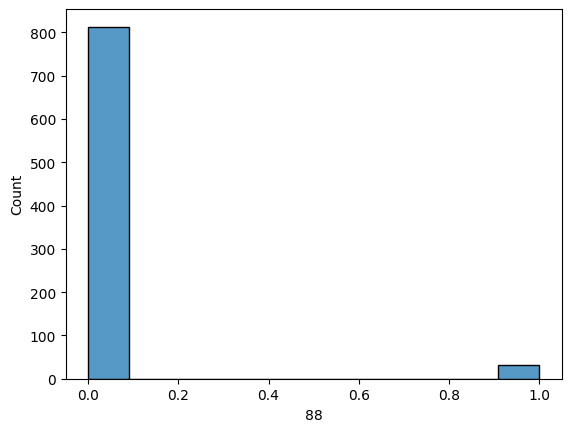

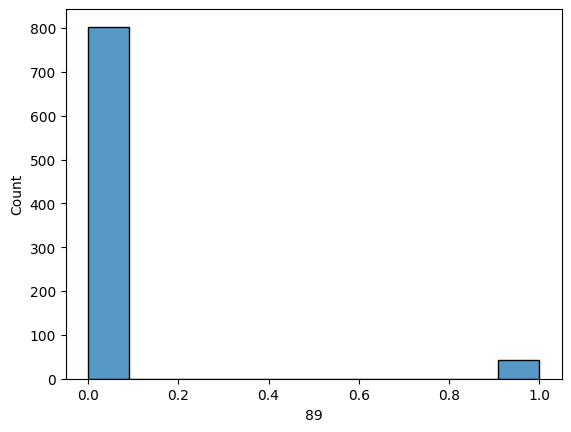

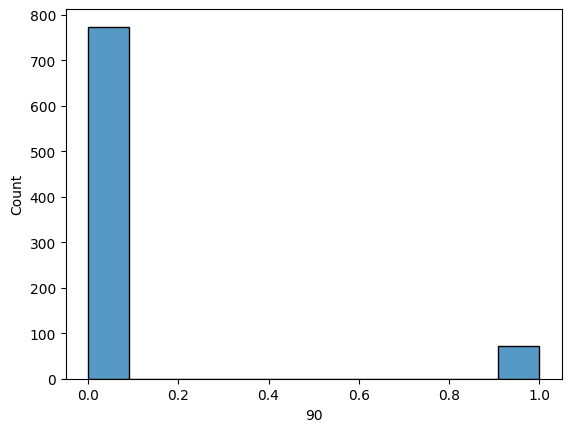

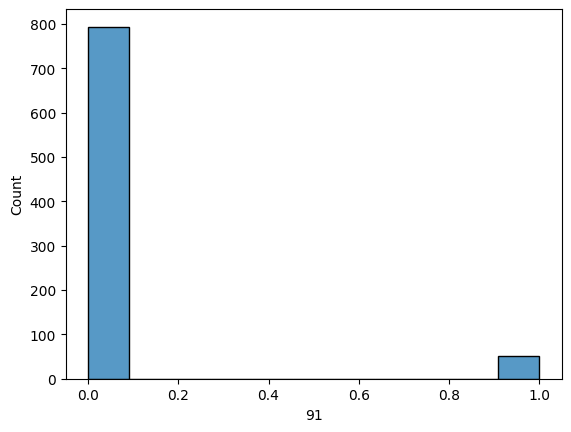

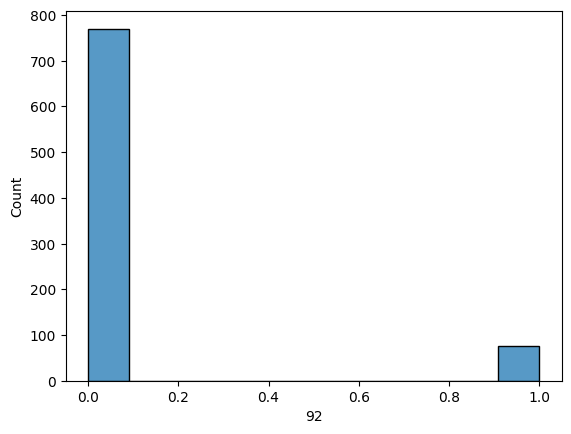

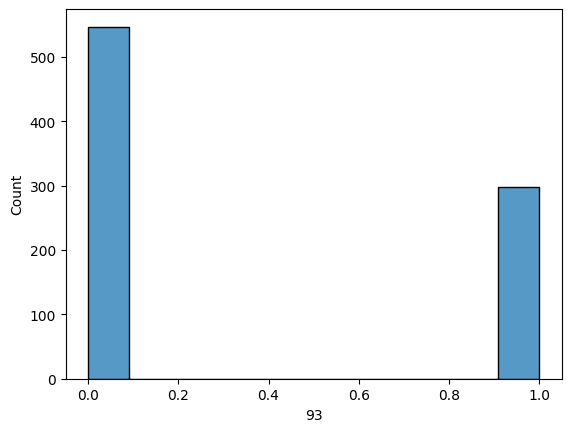

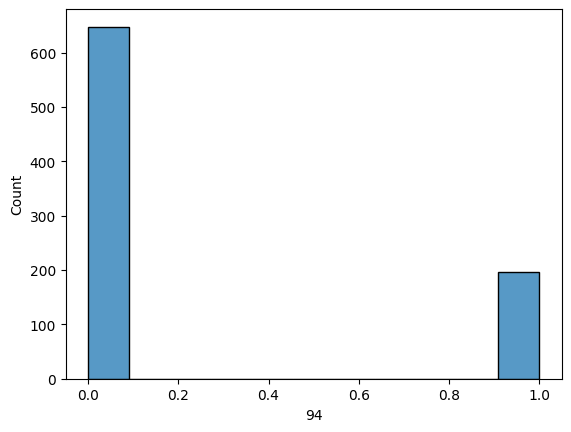

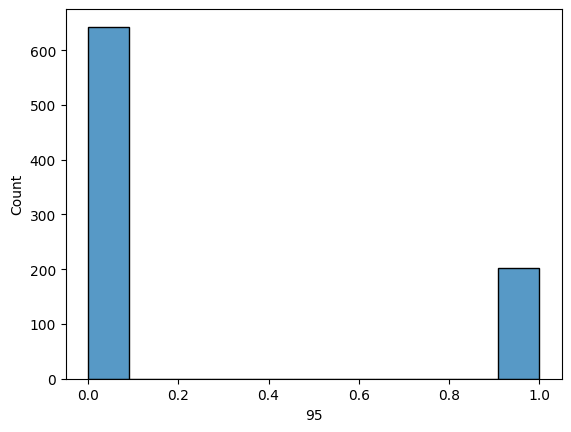

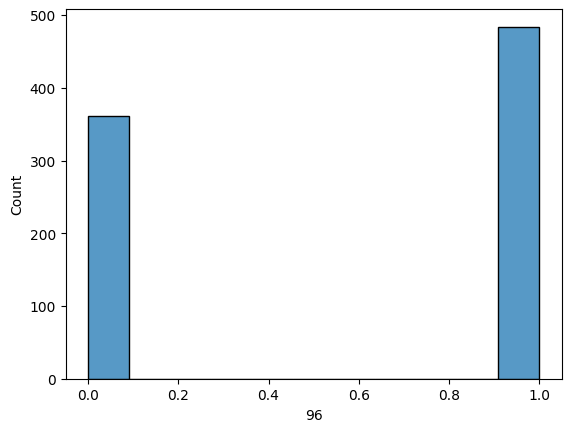

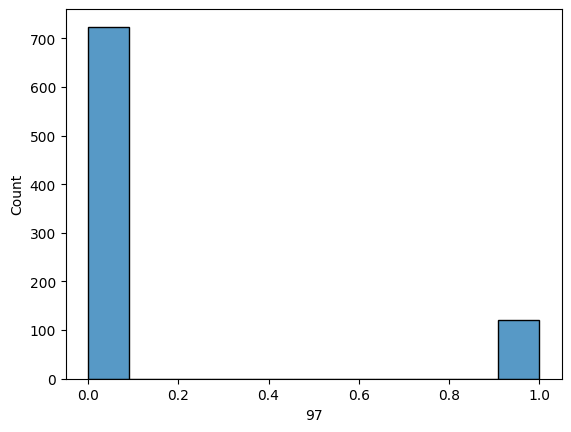

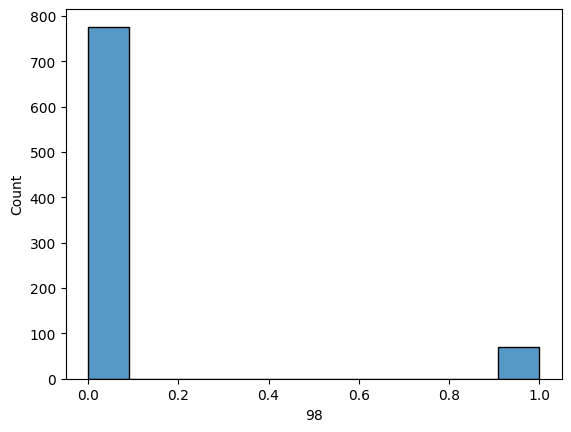

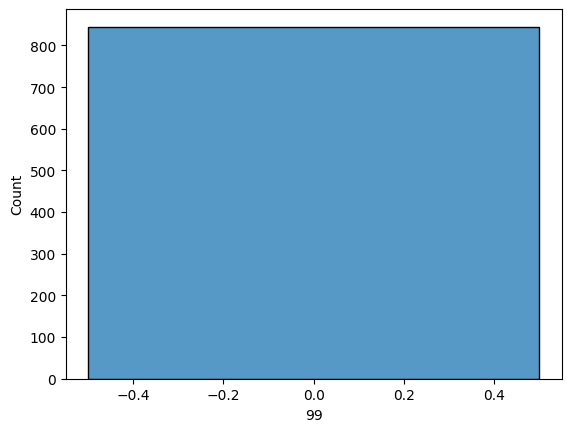

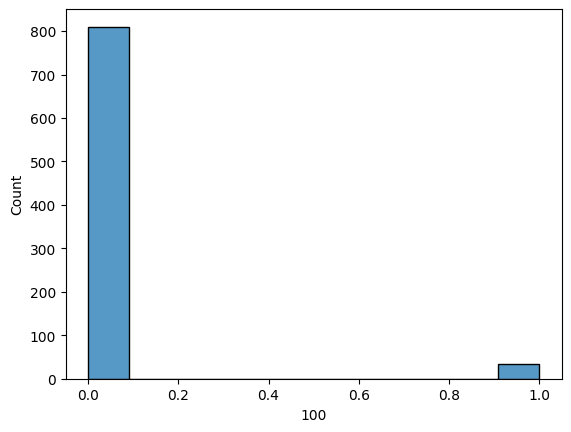

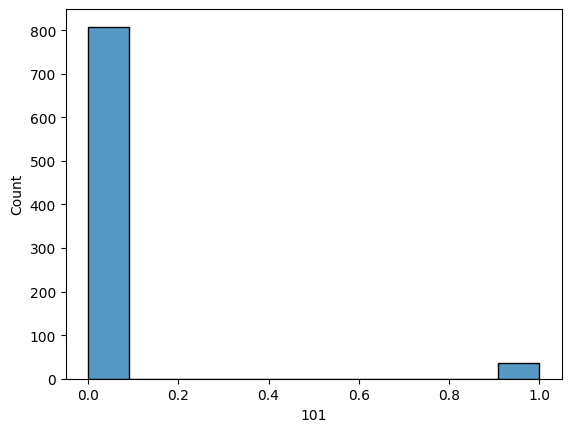

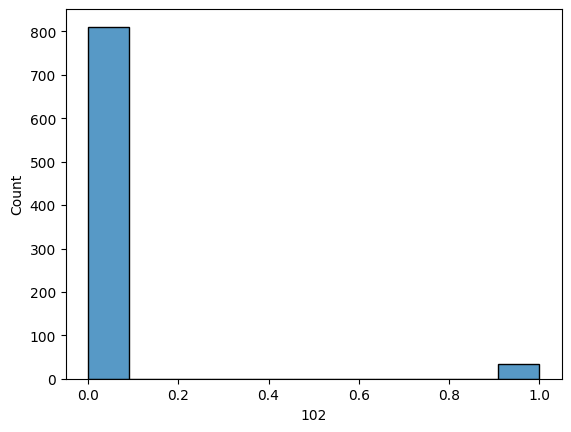

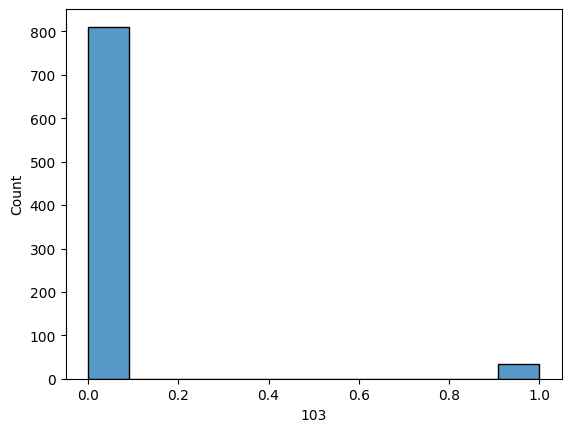

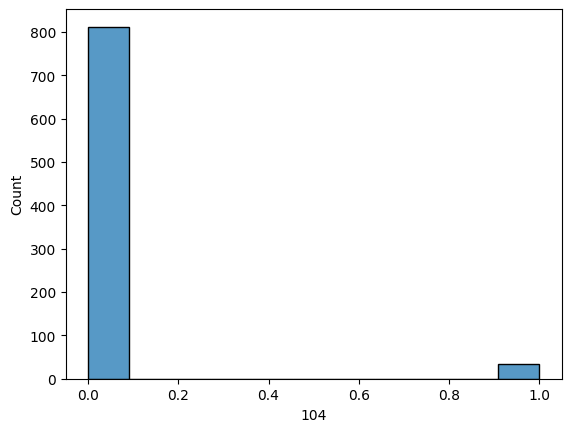

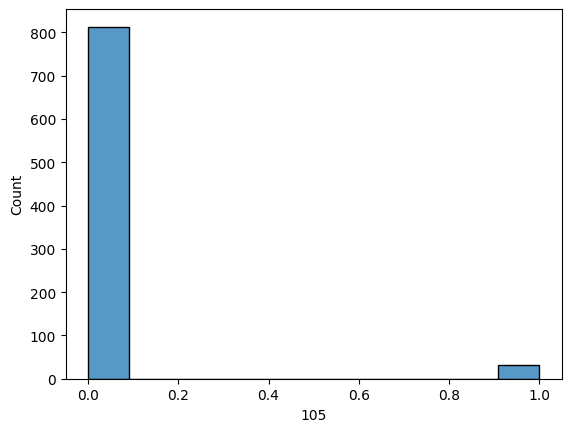

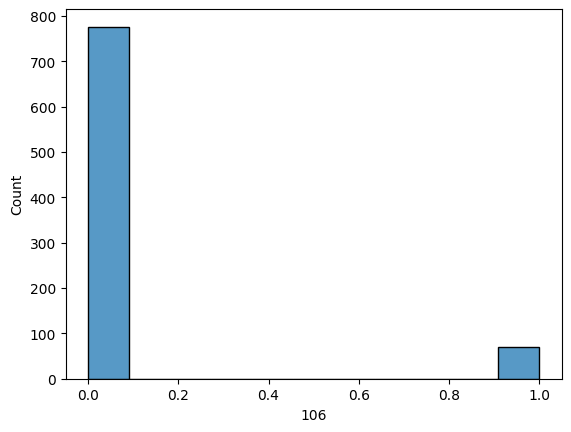

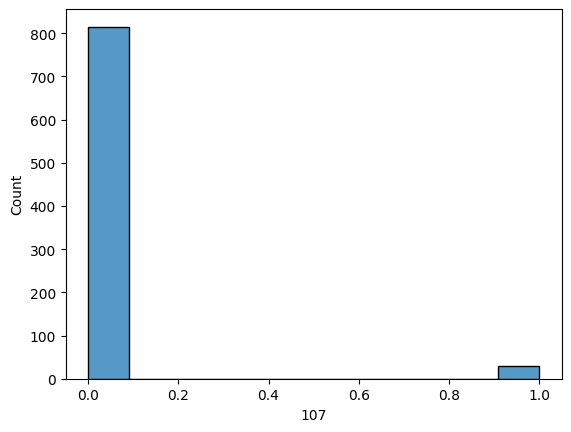

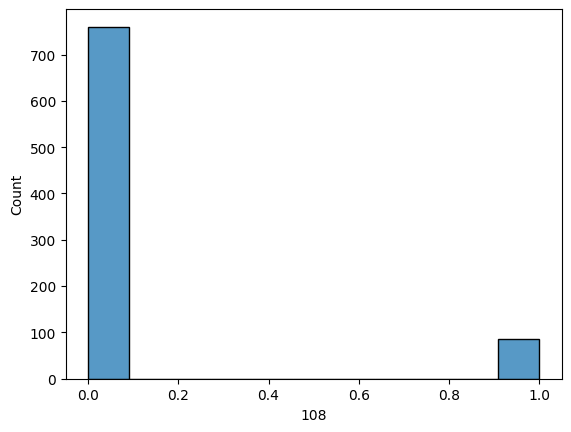

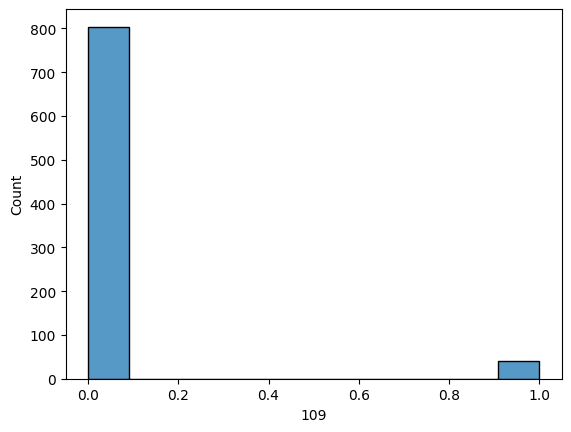

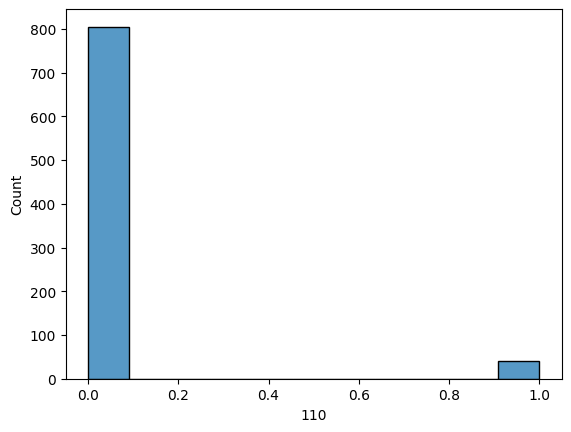

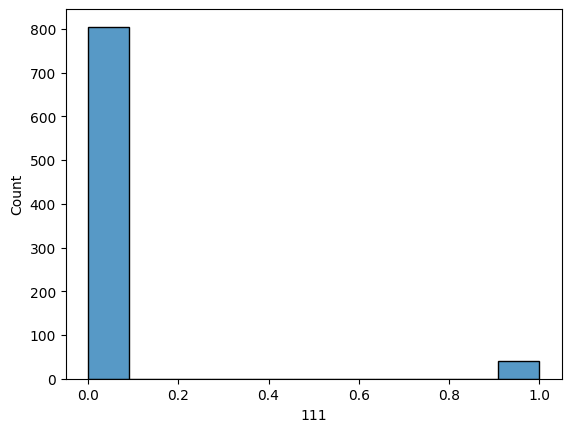

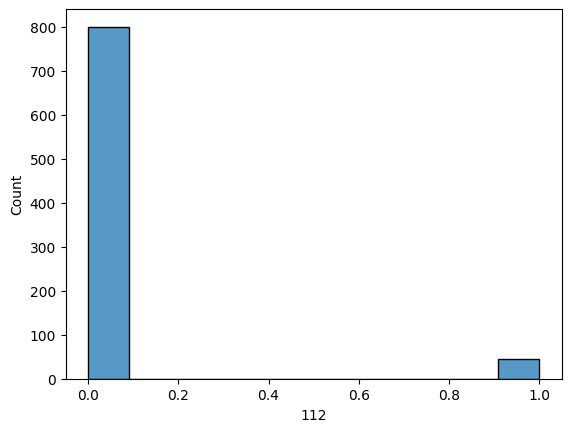

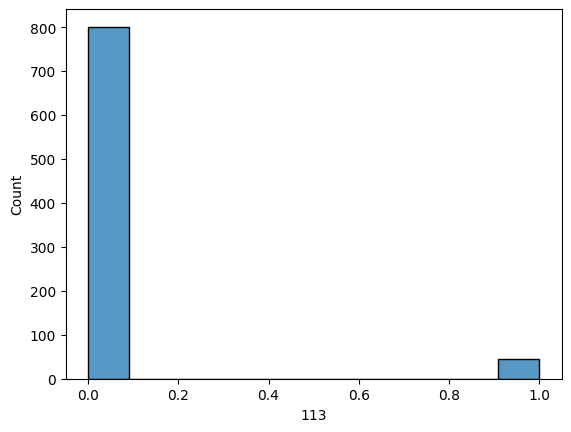

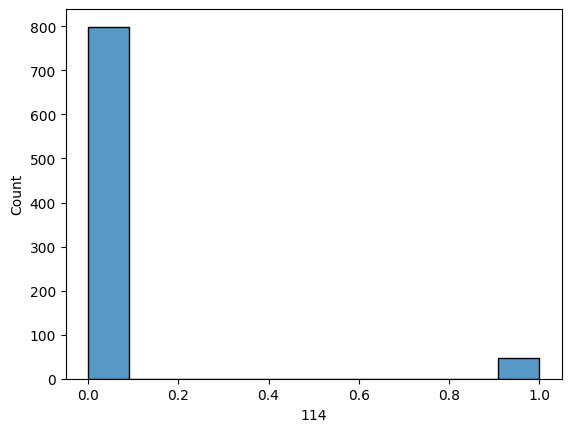

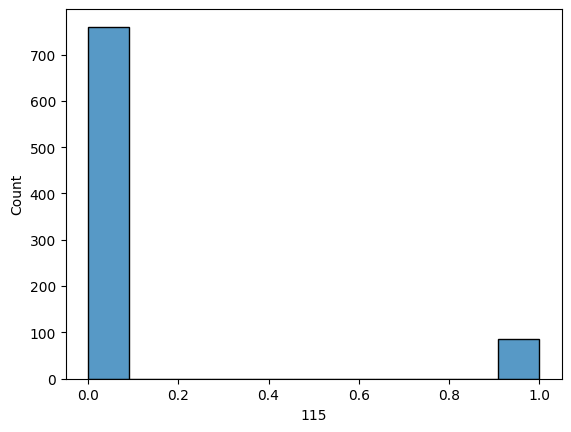

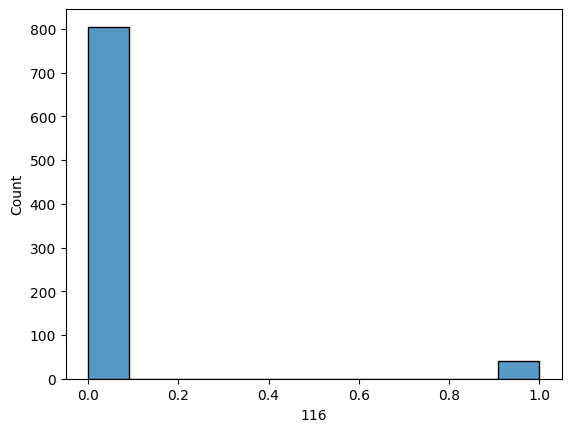

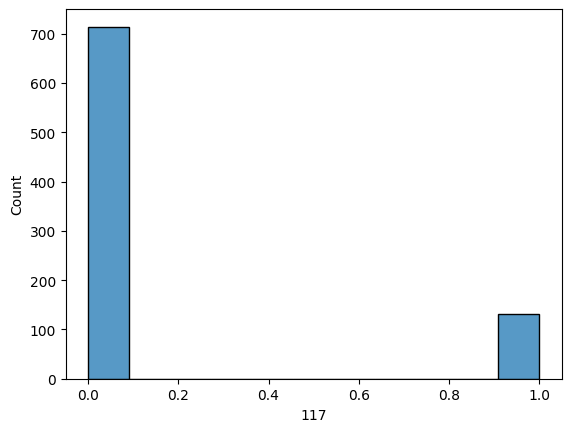

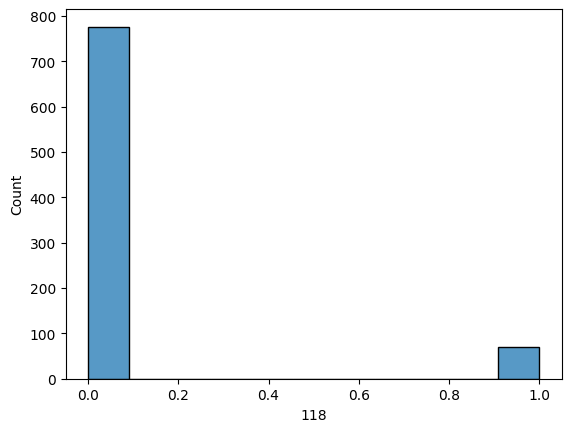

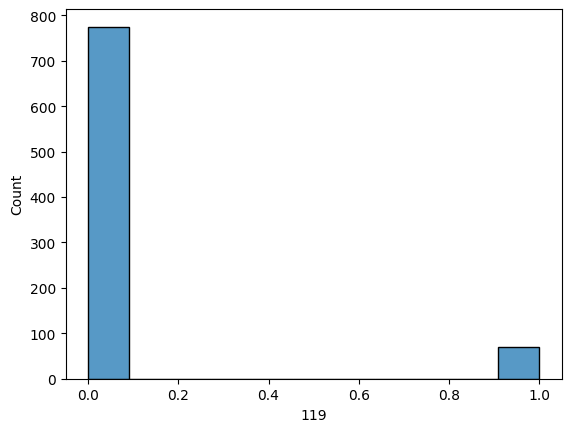

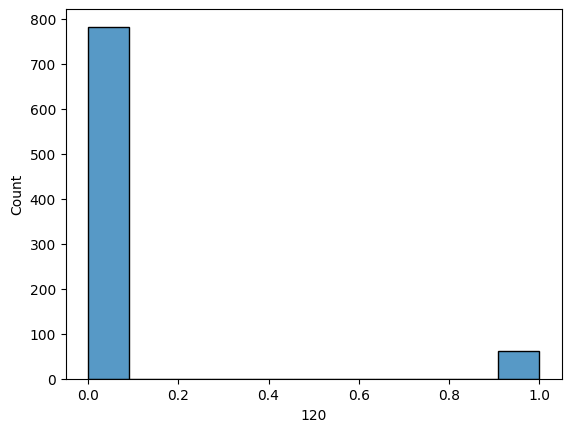

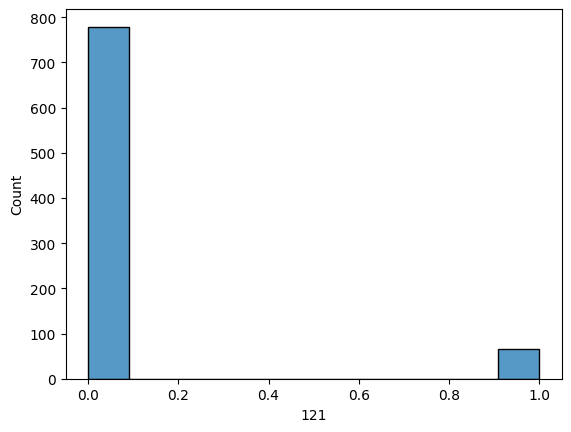

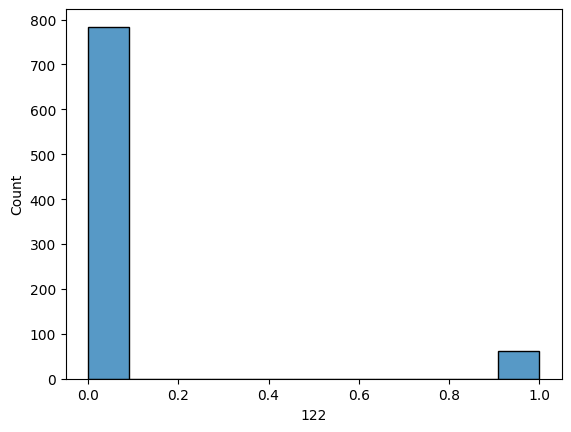

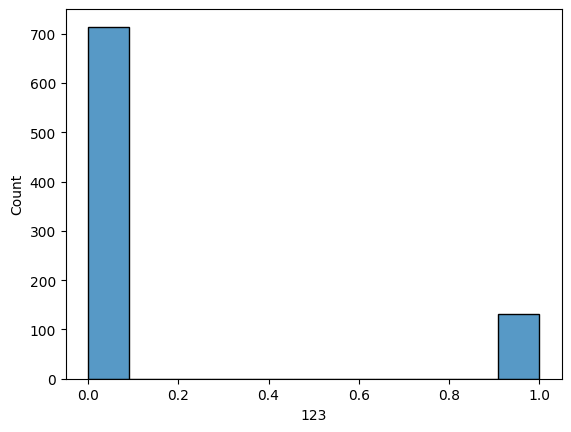

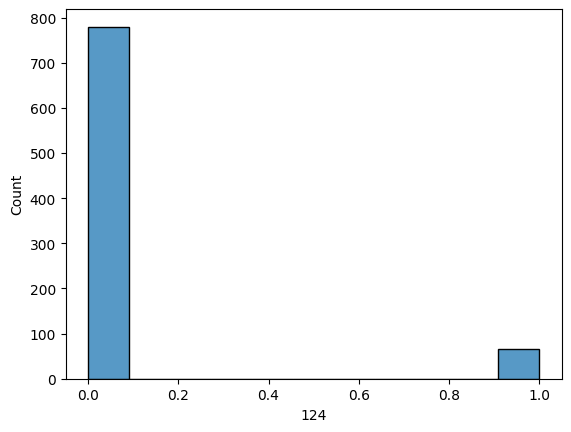

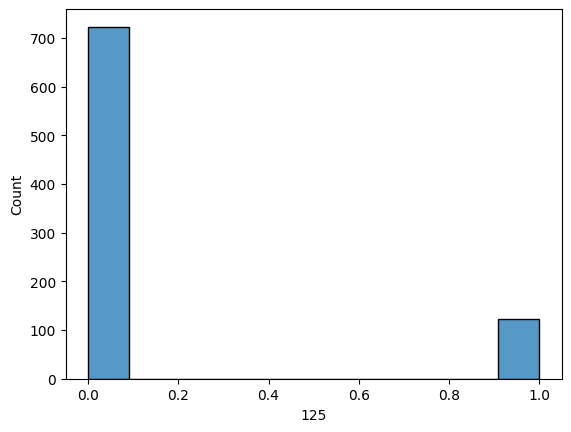

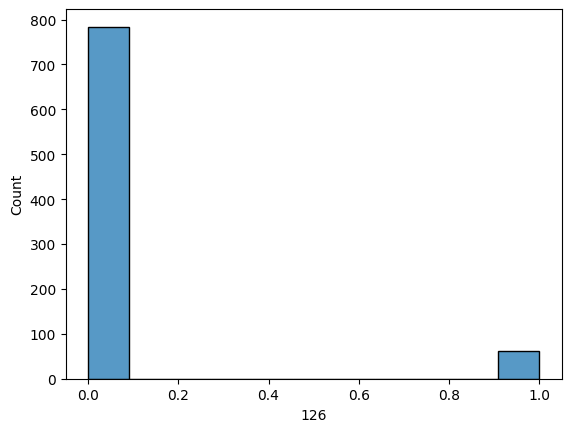

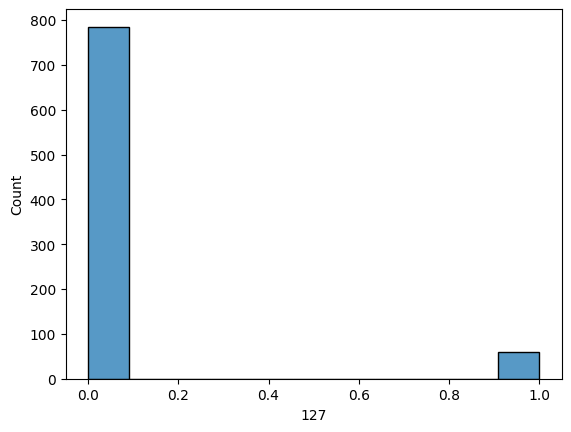

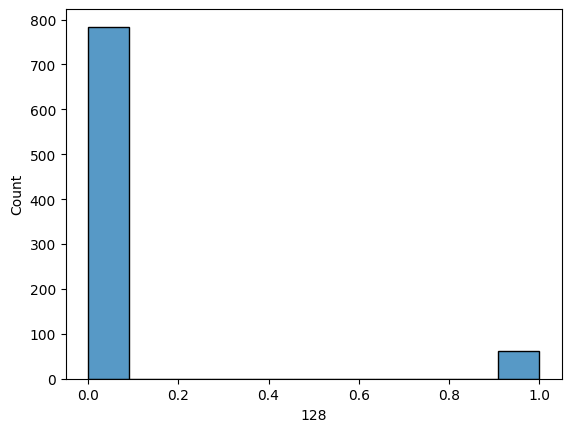

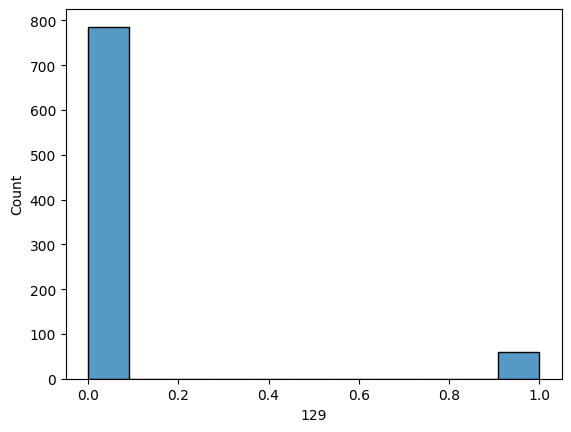

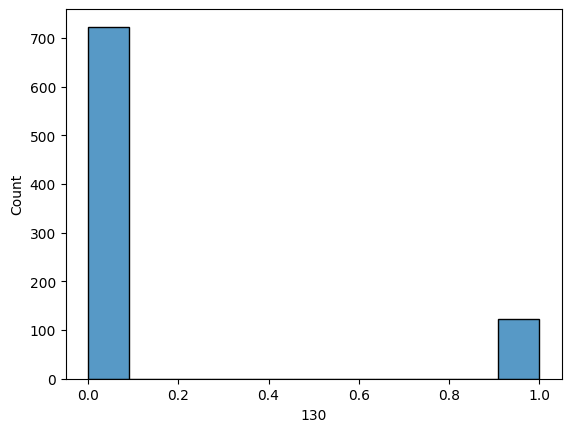

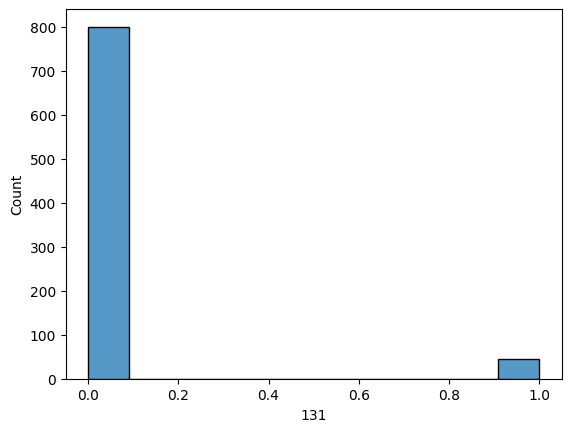

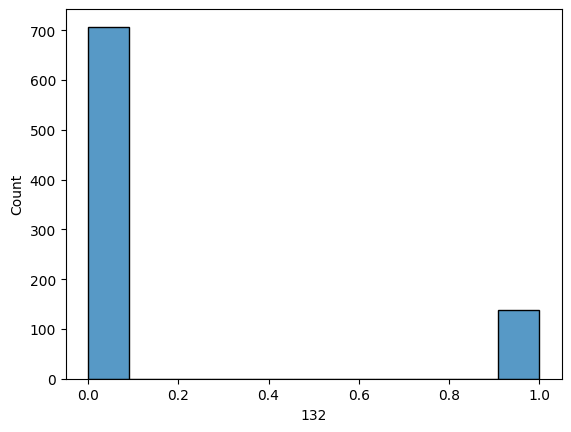

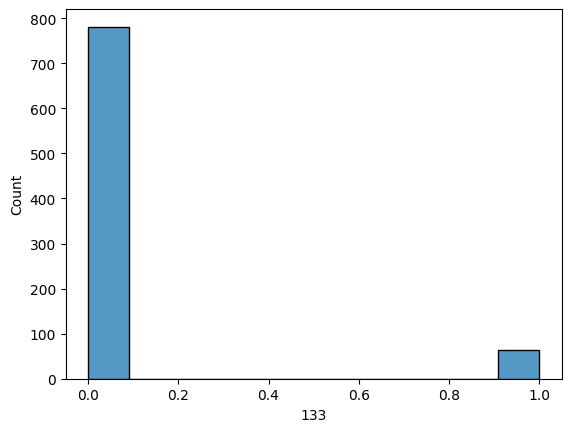

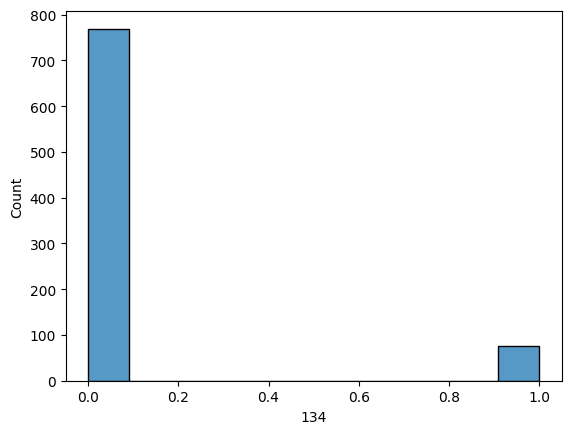

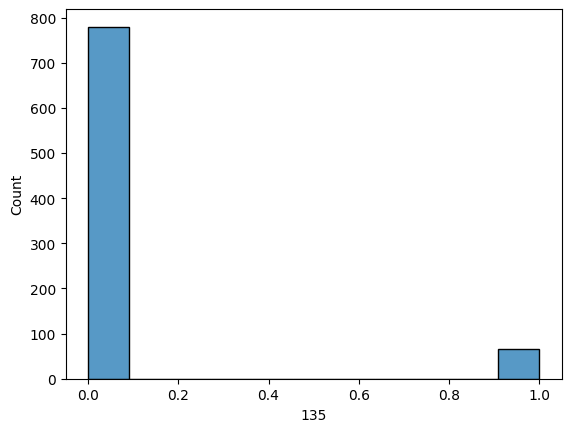

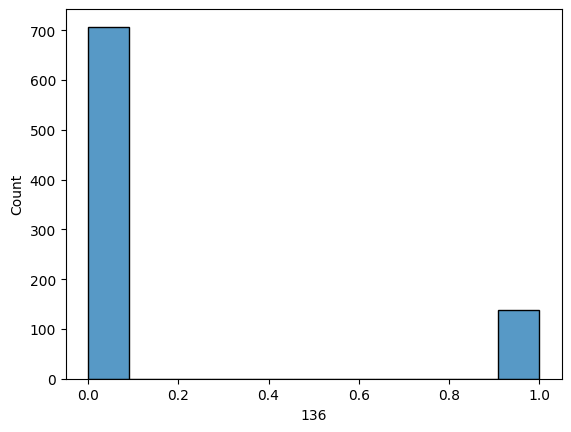

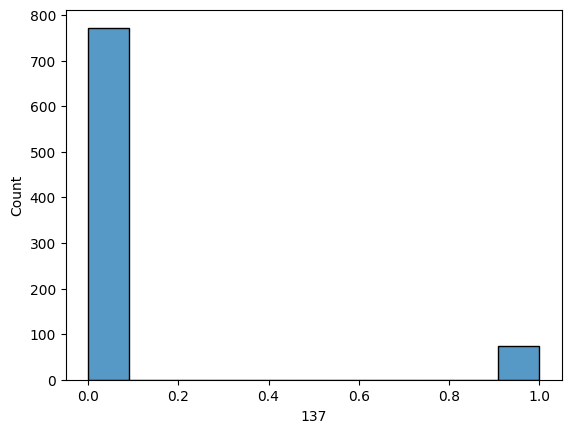

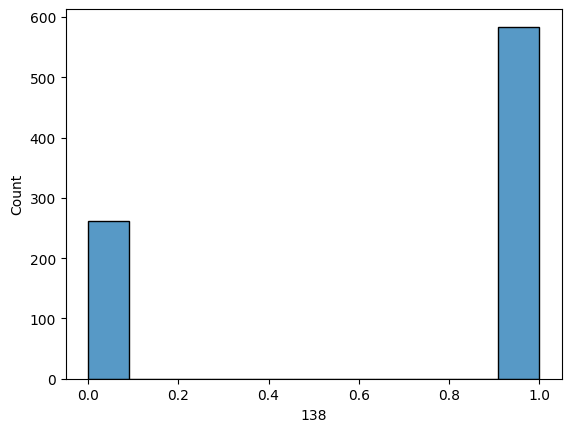

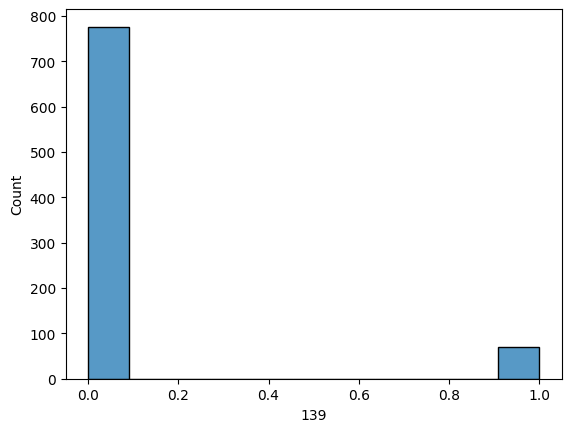

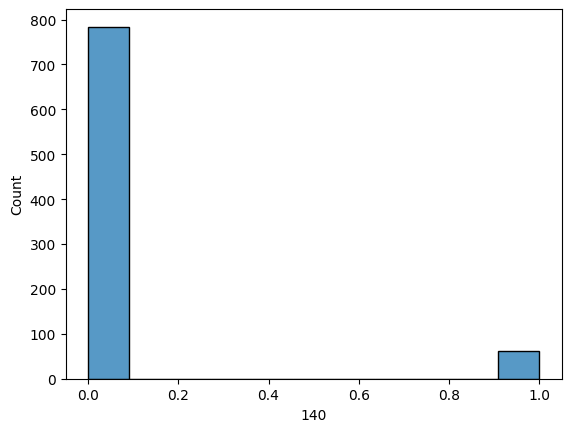

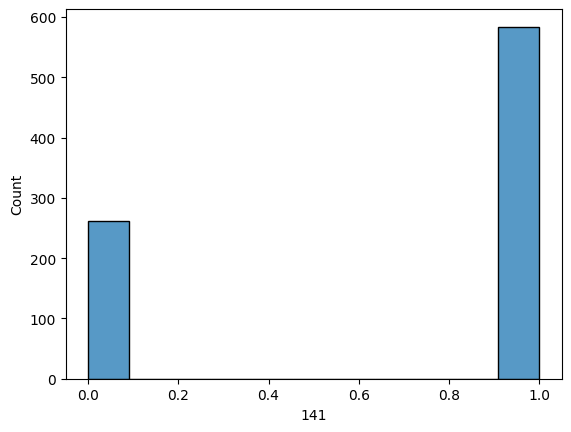

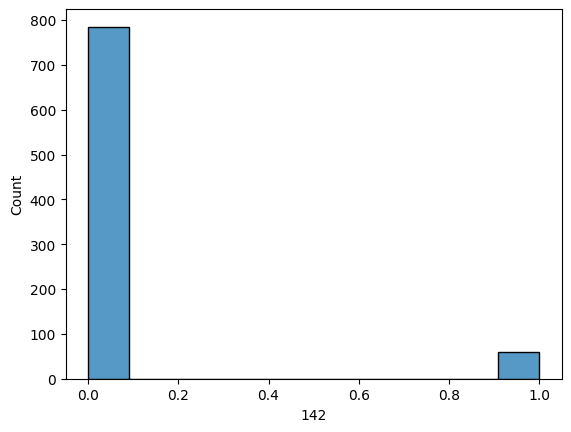

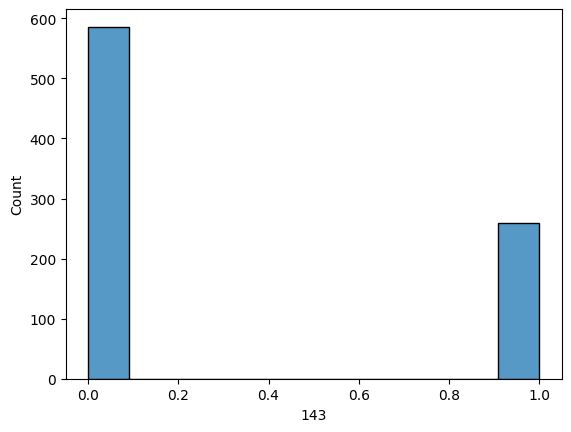

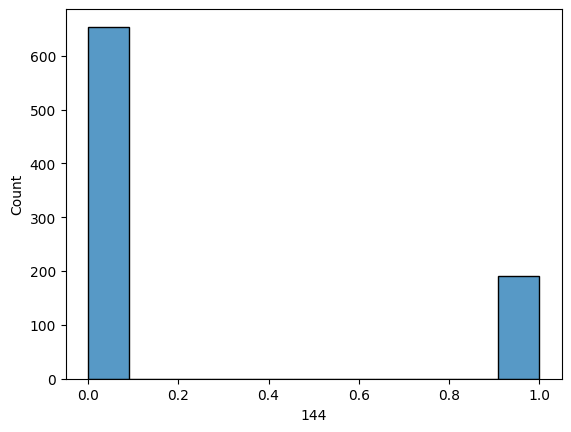

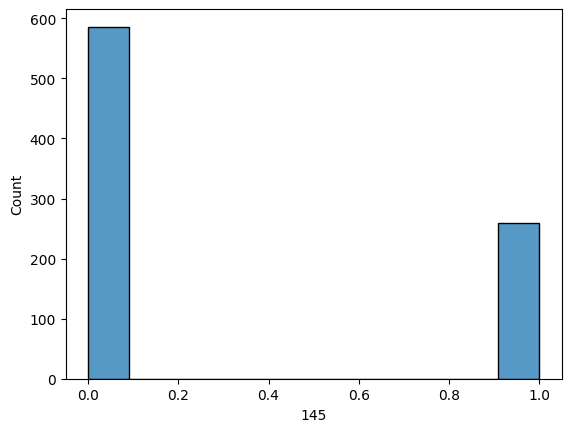

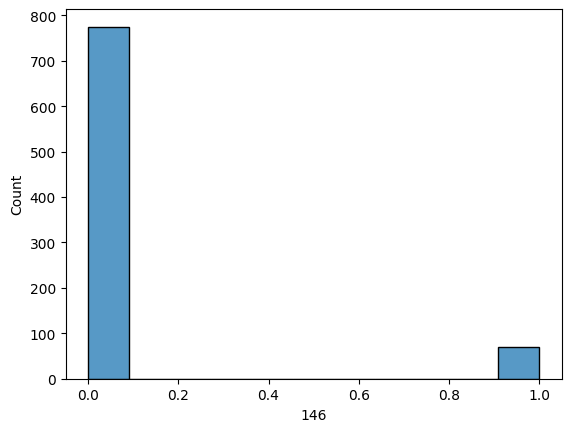

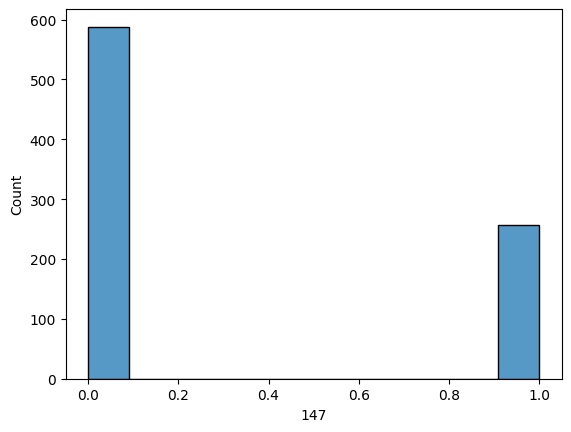

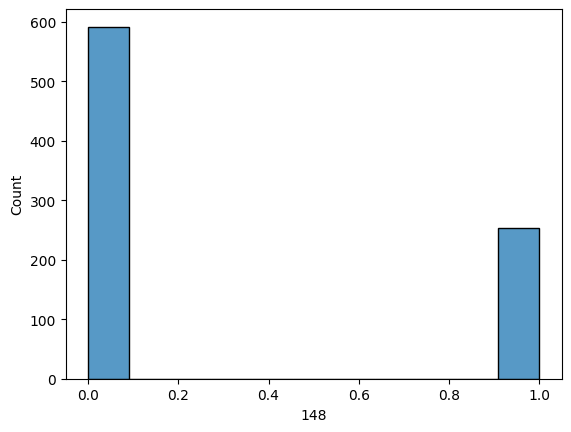

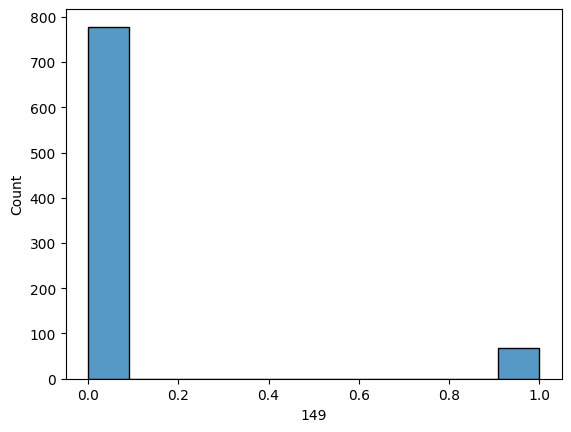

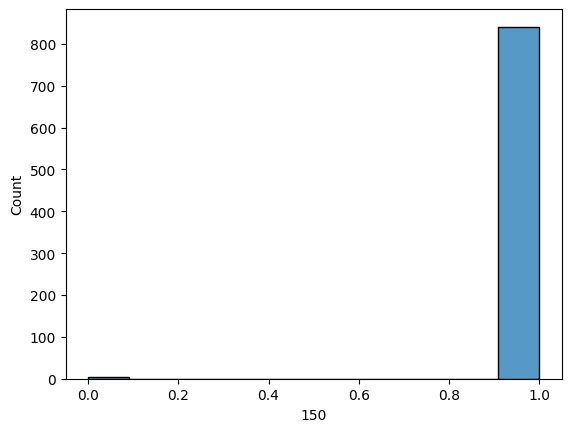

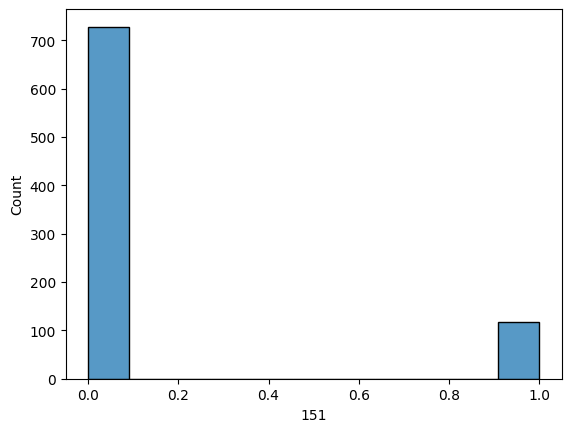

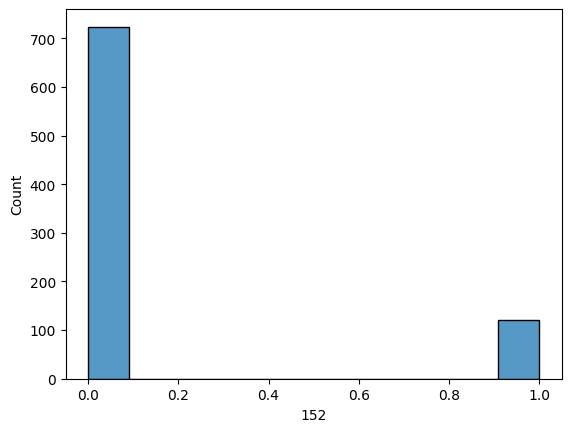

In [580]:
for i in transformed.columns:
    sns.histplot(data=transformed, x=i)
    plt.show()

# StandardScaler

In [585]:
st = StandardScaler()

In [586]:
x_scaled = pd.DataFrame(st.fit_transform(x_poly))

In [587]:
x_scaled

0         1         2         3         4         5         6        7    \
0    0.0  1.175672 -0.945972 -0.103757 -0.840875 -1.020325  0.855311 -0.29819   
1    0.0  0.622079 -0.555688 -0.103757 -0.840875  0.980080 -1.169165 -0.29819   
2    0.0  0.158402 -2.049109 -0.103757 -0.840875  0.980080  0.855311 -0.29819   
3    0.0  0.167554  1.669155 -0.103757 -0.840875  0.980080 -1.169165 -0.29819   
4    0.0  0.460517 -2.256901 -0.103757 -0.840875  0.980080 -1.169165 -0.29819   
..   ...       ...       ...       ...       ...       ...       ...      ...   
840  0.0 -0.750145  0.228074 -0.103757 -0.840875  0.980080 -1.169165 -0.29819   
841  0.0 -1.301163  0.458713 -0.103757 -0.840875 -1.020325  0.855311 -0.29819   
842  0.0 -0.915222 -0.278414 -0.103757 -0.840875  0.980080  0.855311 -0.29819   
843  0.0  0.554645 -0.801359 -0.103757 -0.840875  0.980080 -1.169165 -0.29819   
844  0.0 -1.780439  0.262302 -0.103757 -0.840875  0.980080  0.855311 -0.29819   

          8         9    ...       143       144       145       146  \
0   -0.334428 -0.428338  ... -0.664815 -0.540416 -0.664815 -0.300537   
1   -0.334428 -0.428338  ...  1.504177 -0.540416  1.504177 -0.300537   
2   -0.334428 -0.428338  ...  1.504177  1.850428  1.504177 -0.300537   
3   -0.334428 -0.428338  ... -0.664815 -0.540416 -0.664815 -0.300537   
4   -0.334428 -0.428338  ... -0.664815 -0.540416 -0.664815 -0.300537   
..        ...       ...  ...       ...       ...       ...       ...   
840 -0.334428 -0.428338  ... -0.664815 -0.540416 -0.664815 -0.300537   
841  2.990180 -0.428338  ...  1.504177  1.850428  1.504177  3.327376   
842 -0.334428 -0.428338  ...  1.504177  1.850428  1.504177 -0.300537   
843 -0.334428  2.334605  ...  1.504177 -0.540416  1.504177 -0.300537   
844 -0.334428 -0.428338  ...  1.504177  1.850428  1.504177 -0.300537   

          147       148       149        150       151       152  
0    1.512593 -0.653731  3.407630 -14.500000 -0.400892  2.446113  
1   -0.661116 -0.653731 -0.293459   0.068966 -0.400892 -0.408812  
2    1.512593  1.529680 -0.293459   0.068966 -0.400892 -0.408812  
3   -0.661116 -0.653731 -0.293459   0.068966 -0.400892 -0.408812  
4   -0.661116 -0.653731 -0.293459   0.068966 -0.400892 -0.408812  
..        ...       ...       ...        ...       ...       ...  
840 -0.661116 -0.653731 -0.293459   0.068966 -0.400892 -0.408812  
841  1.512593  1.529680  3.407630   0.068966  2.494438  2.446113  
842  1.512593  1.529680 -0.293459   0.068966 -0.400892 -0.408812  
843 -0.661116 -0.653731 -0.293459   0.068966 -0.400892 -0.408812  
844  1.512593  1.529680 -0.293459   0.068966 -0.400892 -0.408812  

[845 rows x 153 columns]

# Skewness check

In [588]:
x_scaled.skew()

0       0.000000
1      -0.045662
2       0.296790
3       9.551094
4       0.348982
         ...    
148     0.877507
149     3.119711
150   -14.456710
151     2.097271
152     2.040926
Length: 153, dtype: float64

# Feature Selection

# RandomForestRegressor

In [589]:
model = RandomForestRegressor(n_estimators=400)
model.fit(x_scaled, y)

RandomForestRegressor(n_estimators=400)

In [590]:
importance = model.feature_importances_

In [591]:
indices = np.argsort(importance)

<BarContainer object of 153 artists>

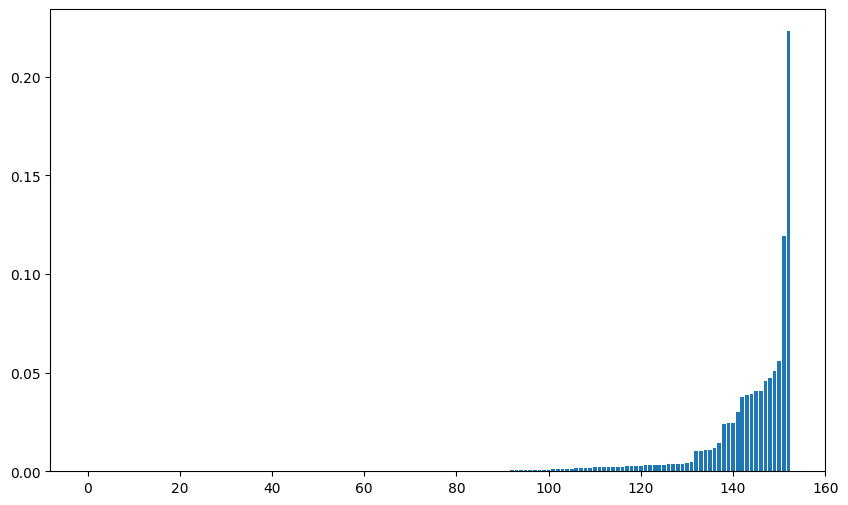

In [592]:
plt.figure(figsize=(10, 6))
plt.bar(range(x_scaled.shape[1]), importance[indices])

# Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE

In [604]:
model = RandomForestRegressor()

In [605]:
rfe = RFE(estimator=model, n_features_to_select=50)

In [606]:
rfe.fit(x_scaled, y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=50)

In [609]:
selected_features = pd.DataFrame(rfe.transform(x_scaled))

In [610]:
selected_features

0         1         2         3         4         5         6   \
0    1.175672 -0.945972 -0.840875  0.855311 -0.410781 -0.664815  1.512593   
1    0.622079 -0.555688 -0.840875 -1.169165 -0.410781  1.504177 -0.661116   
2    0.158402 -2.049109 -0.840875  0.855311 -0.410781  1.504177  1.512593   
3    0.167554  1.669155 -0.840875 -1.169165 -0.410781 -0.664815 -0.661116   
4    0.460517 -2.256901 -0.840875 -1.169165 -0.410781 -0.664815 -0.661116   
..        ...       ...       ...       ...       ...       ...       ...   
840 -0.750145  0.228074 -0.840875 -1.169165 -0.410781 -0.664815 -0.661116   
841 -1.301163  0.458713 -0.840875  0.855311 -0.410781  1.504177  1.512593   
842 -0.915222 -0.278414 -0.840875  0.855311 -0.410781  1.504177  1.512593   
843  0.554645 -0.801359 -0.840875 -1.169165 -0.410781  1.504177 -0.661116   
844 -1.780439  0.262302 -0.840875  0.855311 -0.410781  1.504177  1.512593   

           7         8         9   ...        40        41        42  \
0    1.221157  0.985964 -0.096646  ...  0.855311 -0.410781 -0.276465   
1    0.526953  0.526799 -0.096646  ... -1.169165 -0.410781 -0.276465   
2    0.014466 -0.169634 -0.096646  ...  0.855311 -0.410781 -0.276465   
3    0.023973  0.446049 -0.096646  ... -1.169165 -0.410781 -0.276465   
4    0.341247  0.068143 -0.096646  ... -1.169165 -0.410781 -0.276465   
..        ...       ...       ...  ...       ...       ...       ...   
840 -0.807445 -0.719172 -0.096646  ... -1.169165 -0.410781 -0.276465   
841 -1.188336 -1.255352 -0.096646  ...  0.855311 -0.410781 -0.276465   
842 -0.930869 -0.943980 -0.096646  ...  0.855311 -0.410781 -0.276465   
843  0.448514  0.416405 -0.096646  ... -1.169165 -0.410781 -0.276465   
844 -1.447440 -1.760550 -0.096646  ...  0.855311 -0.410781 -0.276465   

           43        44        45        46        47        48        49  
0   -0.410781 -0.441804 -0.286263 -0.298190 -0.278937 -0.664815 -0.664815  
1   -0.410781 -0.441804 -0.286263 -0.298190 -0.278937  1.504177  1.504177  
2   -0.410781 -0.441804 -0.286263 -0.298190 -0.278937  1.504177  1.504177  
3   -0.410781 -0.441804 -0.286263 -0.298190 -0.278937 -0.664815 -0.664815  
4   -0.410781 -0.441804 -0.286263 -0.298190 -0.278937 -0.664815 -0.664815  
..        ...       ...       ...       ...       ...       ...       ...  
840 -0.410781 -0.441804 -0.286263 -0.298190 -0.278937 -0.664815 -0.664815  
841 -0.410781  2.263446  3.493297  3.353562  3.585033  1.504177  1.504177  
842 -0.410781 -0.441804 -0.286263 -0.298190 -0.278937  1.504177  1.504177  
843 -0.410781  2.263446 -0.286263 -0.298190 -0.278937  1.504177  1.504177  
844 -0.410781 -0.441804 -0.286263 -0.298190 -0.278937  1.504177  1.504177  

[845 rows x 50 columns]

# Train Test Split

In [620]:
x_train, x_test, y_train,y_test = train_test_split(selected_features, y, test_size = 0.25, random_state=128)

# Model Building 

In [621]:
models = [LinearRegression(), RandomForestRegressor(), KNeighborsRegressor(), SVR(), XGBRegressor(), GradientBoostingRegressor(),
         AdaBoostRegressor(), Lasso(), Ridge(), DecisionTreeRegressor()]

for model in models:
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    print('  ')
    print('___________________________')
    print(model.__class__.__name__)
    print('   ')
    print('Training_R2 Score:', r2_score(y_train, y_train_pred))
    print('Testing_R2 Score:', r2_score(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_squared_error:', mean_squared_error(y_train, y_train_pred))
    print('Test_mean_squared_error:', mean_squared_error(y_test, y_test_pred))
    print('----------------------------------------------------')
    print('Traning_mean_absolute_error:', mean_absolute_error(y_train, y_train_pred))
    print('Test_mean_absolute_error:', mean_absolute_error(y_test, y_test_pred))
    print('-----------------------------------------------------')
    print('explained_variance_score:', explained_variance_score(y_train, y_train_pred))
    print('explained_variance_score:', explained_variance_score(y_test, y_test_pred))
    print('____________________________________________________________________')

  
___________________________
LinearRegression
   
Training_R2 Score: 0.44385815032907217
Testing_R2 Score: 0.32042201974235407
----------------------------------------------------
Traning_mean_squared_error: 223162.1731133622
Test_mean_squared_error: 137950.84865423478
----------------------------------------------------
Traning_mean_absolute_error: 262.207368460717
Test_mean_absolute_error: 246.53753131631987
-----------------------------------------------------
explained_variance_score: 0.44385815032907217
explained_variance_score: 0.33018696368558664
____________________________________________________________________
  
___________________________
RandomForestRegressor
   
Training_R2 Score: 0.9201490462089016
Testing_R2 Score: 0.3139587422623966
----------------------------------------------------
Traning_mean_squared_error: 32041.66775749785
Test_mean_squared_error: 139262.86087262642
----------------------------------------------------
Traning_mean_absolute_error: 93.982444184

In [412]:
models = {'Linear': LinearRegression(), 'Random' : RandomForestRegressor(), 'KNeighbors' : KNeighborsRegressor(), 'SVR' : SVR(), 'XGB' : XGBRegressor(), 'GradientBoosting' : GradientBoostingRegressor(),
         'AdaBoost' : AdaBoostRegressor(), 'Lasso' : Lasso(), 'Ridge' : Ridge(), 'DecisionTree' : DecisionTreeRegressor()}

In [413]:
for model_name, model in models.items():
    score =cross_val_score(model, x_train, y_train)
    
    print(model_name,'score is', np.mean(score))
    print('.................................')
    

Linear score is 0.2638247776278487
.................................
Random score is 0.3588321302875547
.................................
KNeighbors score is 0.2834079765852959
.................................
SVR score is -0.18337260590218815
.................................
XGB score is 0.25063544751166944
.................................
GradientBoosting score is 0.3433994863948927
.................................
AdaBoost score is 0.14606749041706057
.................................
Lasso score is 0.2713580055406094
.................................
Ridge score is 0.2733912431817055
.................................
DecisionTree score is -0.22419243801691482
.................................


# Random Forest Regressor

In [622]:
rfr = RandomForestRegressor()
max_test = 0.0
max_training = 0.0
best_random_state = None

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.25, random_state=i)
    rfr.fit(x_train, y_train)
    y_train_pred = rfr.predict(x_train)
    y_test_pred = rfr.predict(x_test)
    score1 = r2_score(y_train, y_train_pred)
    score2 = r2_score(y_test, y_test_pred)
    if score2 > max_test:
        max_test = score2
        max_training = score1
        best_random_state = i

In [623]:
max_test

0.667556447512637

In [624]:
max_training

0.9136595346105796

In [625]:
best_random_state

518

# Train test split

In [626]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(selected_features, y, test_size=0.25, random_state=518)

In [627]:
rfr = RandomForestRegressor()
rfr.fit(x_train1, y_train1)
y_train_pred1 = rfr.predict(x_train1)
y_test_pred1 = rfr.predict(x_test1)
score1 = r2_score(y_train1, y_train_pred1)
score2 = r2_score(y_test1, y_test_pred1)
print('traning', score1, 'test', score2)

traning 0.9076124072240327 test 0.6645692002926615


In [628]:
score2 =cross_val_score(rfr, x_train1, y_train1)
score2.mean()

0.30744619286456065

# Hyperparameter Tuning

In [629]:
random = RandomForestRegressor()

In [630]:
param_grid = {
    'n_estimators': [100, 50, 150, 200, 250, 225],
    'criterion': ['mse', 'mae'],
    'max_depth': [None, 1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'min_weight_fraction_leaf': [0.0],
    'max_features': ['sqrt', 'log2'],  
    'max_leaf_nodes': [None, 1, 2, 3, 4, 5, 6, 7],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
    'bootstrap': [True, False],
    'oob_score': [False, True],
    'n_jobs': [None, 1, 2, 3],
    'random_state': [None, 1, 2, 3, 4, 5, 6, 7],
    'verbose': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    'warm_start': [False],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
    'max_samples': [None]
}


In [631]:
rfcv1 = RandomizedSearchCV(param_distributions = param_grid, estimator = random, cv=2)

In [633]:
rfcv1.fit(selected_features, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Para

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elap

building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250
building tree 10 of 250
building tree 11 of 250
building tree 12 of 250
building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250
building tree 28 of 250
building tree 29 of 250
building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250
building tree 36 of 250
building tree 37 of 250
building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  31 tasks      | elapsed:    1.3s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:    1.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done 107 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend Sequenti

building tree 1 of 225
building tree 2 of 225
building tree 3 of 225
building tree 4 of 225
building tree 5 of 225
building tree 6 of 225
building tree 7 of 225
building tree 8 of 225
building tree 9 of 225
building tree 10 of 225
building tree 11 of 225
building tree 12 of 225
building tree 13 of 225
building tree 14 of 225
building tree 15 of 225
building tree 16 of 225
building tree 17 of 225
building tree 18 of 225
building tree 19 of 225
building tree 20 of 225
building tree 21 of 225
building tree 22 of 225
building tree 23 of 225
building tree 24 of 225
building tree 25 of 225
building tree 26 of 225
building tree 27 of 225
building tree 28 of 225
building tree 29 of 225
building tree 30 of 225
building tree 31 of 225
building tree 32 of 225
building tree 33 of 225
building tree 34 of 225
building tree 35 of 225
building tree 36 of 225
building tree 37 of 225
building tree 38 of 225
building tree 39 of 225
building tree 40 of 225
building tree 41 of 225
building tree 42 of 225
b

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    1.1s
[Pa

RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4,
                                                      0.5, 0.6],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [None, 1, 2, 3, 4, 5, 6],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [None, 1, 2, 3, 4, 5,
                                                           6, 7],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.05],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                                        'min_samples_split': [2, 3,

In [634]:
rfcv1.best_params_

{'warm_start': False,
 'verbose': 1,
 'random_state': 1,
 'oob_score': True,
 'n_jobs': 1,
 'n_estimators': 100,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'min_impurity_decrease': 0.0,
 'max_samples': None,
 'max_leaf_nodes': 7,
 'max_features': 'log2',
 'max_depth': 5,
 'criterion': 'mse',
 'ccp_alpha': 0.3,
 'bootstrap': True}

In [635]:
random1 = RandomForestRegressor(ccp_alpha=0.3, bootstrap=True, min_samples_split=5, min_samples_leaf=4, random_state=1, criterion='mae', max_features= 'log2', n_estimators=100, max_depth=5, max_leaf_nodes=7, n_jobs=1, verbose=1)

In [636]:
random1.fit(x_train1, y_train1)
y_train_pred2 = random1.predict(x_train1)
y_test_pred2 = random1.predict(x_test1)
score4 = r2_score(y_train1, y_train_pred2)
score5 = r2_score(y_test1, y_test_pred2)
print('traning', score4, 'test', score5)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


traning 0.337828579155407 test 0.3336485257143017


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [293]:
score1 =cross_val_score(random1, x_train1, y_train1)
score1.mean()

0.3077562465130357

# # Best Model...................................

# # XGBRegressor

In [637]:
xgb = XGBRegressor()
max_test = 0.0
max_training = 0.0
best_random_state = None

for i in range(1, 1500):
    x_train0, x_test0, y_train0, y_test0 = train_test_split(selected_features, y, test_size=0.25, random_state=i)
    xgb.fit(x_train0, y_train0)
    y_train_pred = xgb.predict(x_train0)
    y_test_pred = xgb.predict(x_test0)
    score1 = r2_score(y_train0, y_train_pred)
    score2 = r2_score(y_test0, y_test_pred)
    if score2 > max_test:
        max_test = score2
        max_training = score1
        best_random_state = i

In [638]:
max_test

0.7272286438700206

In [639]:
max_training

0.9890841716267957

In [640]:
best_random_state

887

# Train_Test_Split

In [641]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(selected_features, y, test_size=0.25, random_state=887)

In [642]:
xgb = XGBRegressor()
xgb.fit(x_train2, y_train2)
y_train_pred4 = xgb.predict(x_train2)
y_test_pred4 = xgb.predict(x_test2)
score13 = r2_score(y_train2, y_train_pred4)
score23 = r2_score(y_test2, y_test_pred4)
print('traning', score13, 'test', score23)

traning 0.9890841716267957 test 0.7272286438700206


In [644]:
score =cross_val_score(xgb, x_train2, y_train2)
score.mean()

0.17656493800427514

# Hyperparameter Tuning

In [645]:
xgb1 = XGBRegressor()

In [646]:
params = {
    
    'n_estimators':[50,75,100,125,150,175,200],
    'max_depth': [1,2,3,4,5,6,7,8,9,10,11],
    'max_leaves': [1,2,3,4,5,6,7],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.8],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
}

In [647]:
rfcv2 = RandomizedSearchCV(param_distributions = params, estimator = xgb1, cv=2)

In [649]:
rfcv2.fit(selected_features, y)

RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                             

In [650]:
rfcv2.best_params_

{'n_estimators': 75,
 'max_leaves': 1,
 'max_depth': 3,
 'learning_rate': 0.4,
 'gamma': 0.5}

# after Applying Hyperparameter Tuning 

In [651]:
xgb1 = XGBRegressor(n_estimators=75, max_leaves=1, max_depth=3, learning_rate=0.4, gamma=0.5)

In [652]:
xgb1.fit(x_train2, y_train2)
y_train_pred7 = xgb1.predict(x_train2)
y_test_pred7 = xgb1.predict(x_test2)
score10 = r2_score(y_train2, y_train_pred7)
score20 = r2_score(y_test2, y_test_pred7)
print('traning', score10, 'test', score20)

traning 0.9048974181897445 test 0.6705715526807455


# Cross Validation Score

In [653]:
score =cross_val_score(xgb1, x_train2, y_train2)
score.mean()

0.2217511859765323

# Classification Model ............................

In [12]:
power1

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018         generation_data_source  
0                    NaN                            NaN  
1                    NaN                            NaN  
2                    NaN                            NaN  
3             626.239128  Central Electricity Authority  
4            7279.000000  Central Electricity Authority  
..                   ...                            ...  
902           686.500000  Central Electricity Authority  
903                  NaN                            NaN  
904                  NaN                            NaN  
905                  NaN                            NaN  
906                  NaN                            NaN  

[907 rows x 13 columns]

# Outliers Detection and Removal

In [13]:
power1

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory                  NaN   
1                                     WRI                  NaN   
2                                     WRI                  NaN   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
902                                   WRI                  NaN   
903                        Industry About                  NaN   
904                                   WRI                  NaN   
905                                   WRI                  NaN   
906                                   WRI                  NaN   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2018         generation_data_source  
0                    NaN                            NaN  
1                    NaN                            NaN  
2                    NaN                            NaN  
3             626.239128  Central Electricity Authority  
4            7279.000000  Central Electricity Authority  
..                   ...                            ...  
902           686.500000  Central Electricity Authority  
903                  NaN                            NaN  
904                  NaN                            NaN  
905                  NaN                            NaN  
906                  NaN                            NaN  

[907 rows x 13 columns]

In [14]:
upper = {}
lower = {}
for i in power1.columns:
    if power[i].dtype != 'object':
        q75 = power1[i].quantile(0.75)
        q25 = power1[i].quantile(0.25)
        iqr = q75 - q25
        upper[i] = q75 + 1.5 * iqr
        lower[i] = q25 - 1.5 * iqr
        print(i)
        print('upper', q75 + 1.5 * iqr)
        print('lower', q25 - 1.5 * iqr)
        
    
    
    

capacity_mw
upper 938.0374999999999
lower -536.0624999999999
latitude
upper 38.620149999999995
lower 3.6661500000000036
longitude
upper 87.21769999999998
lower 66.47930000000002
generation_gwh_2014
upper 7252.929117681375
lower -3994.0651961356252
generation_gwh_2015
upper 7445.73153125
lower -4185.229218750001
generation_gwh_2016
upper 7924.725403243509
lower -4453.578838739182
generation_gwh_2017
upper 7922.4137925
lower -4468.8483875
generation_gwh_2018
upper 7568.772375
lower -4231.858225


In [15]:
power2 = power1[power1['capacity_mw'] <= 938.037499]
power3 = power2[power2['latitude'] <= 38.620149999]
power4 = power3[power3['longitude'] <= 87.21769999]

power5 = power4[power4['latitude'] >= 3.66615000]
power6 = power5[power5['longitude'] >= 66.47930000000002]

power7 = power6[power6['capacity_mw'] >= -536.062499999999]

In [16]:
Power = power7.reset_index()
Power1 = Power.drop(['index'], axis=1)

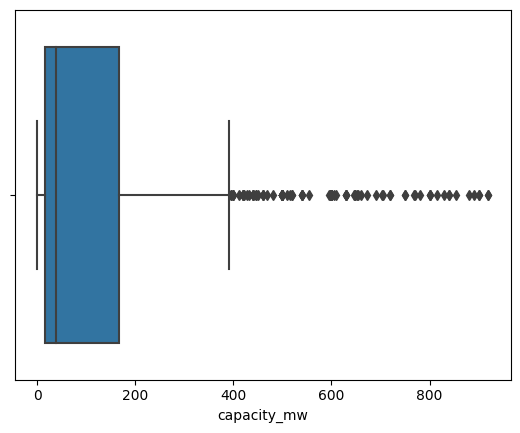

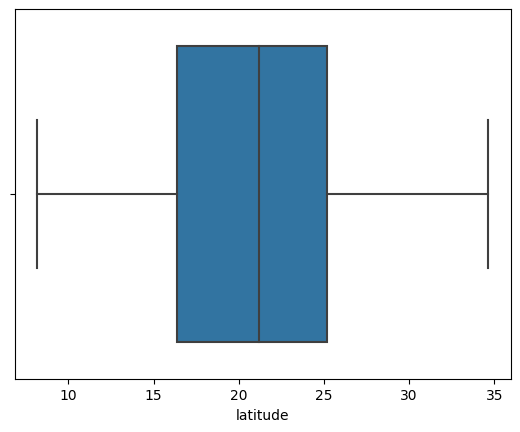

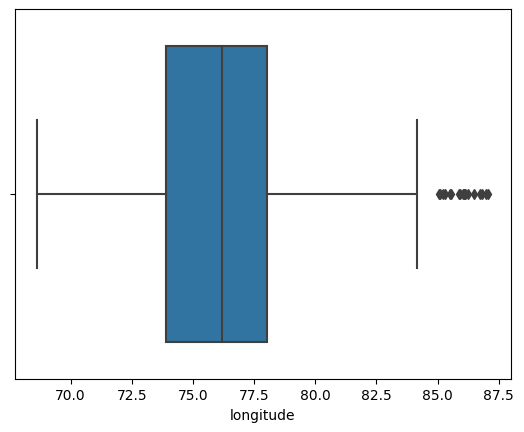

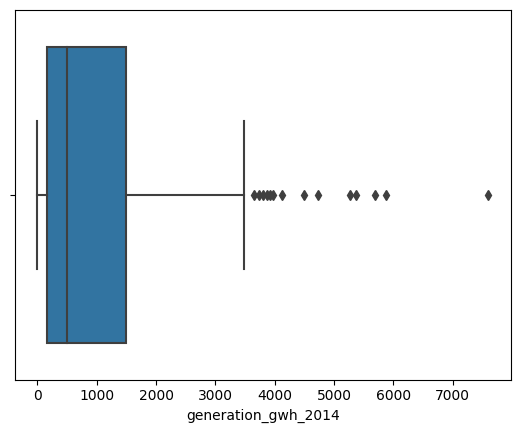

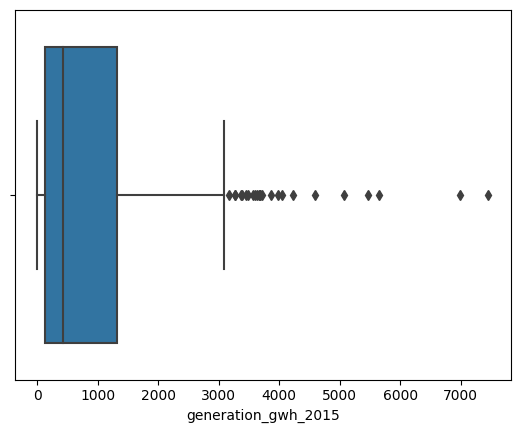

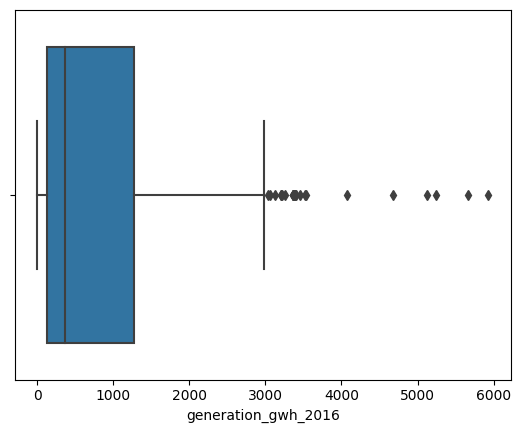

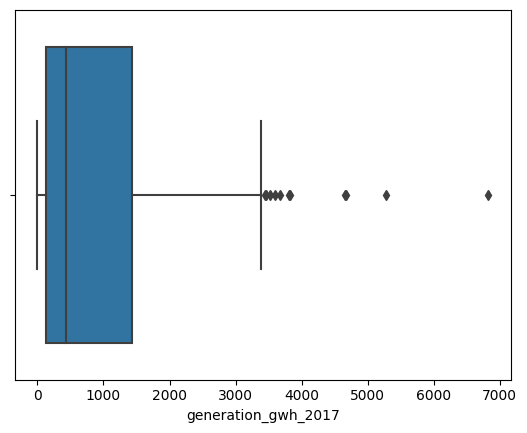

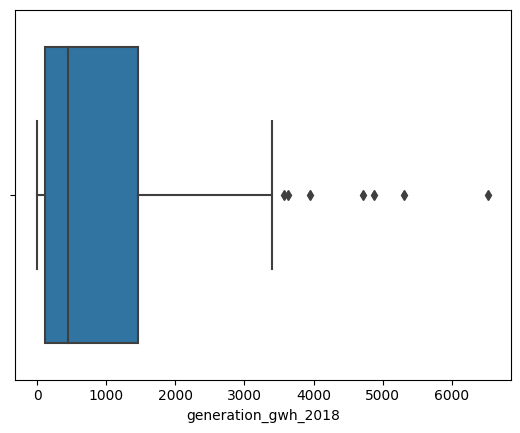

In [17]:
for i in Power1.columns:
    if Power1[i].dtype != 'object':
        sns.boxplot(data = Power1, x=i)
        plt.show()

# Distribution of data into input and output

In [18]:
X2 = Power1.drop(['primary_fuel'], axis=1)
y2 = Power1['primary_fuel']

In [19]:
X3 = X2.drop(['other_fuel1', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_data_source'], axis=1)

# Categorical Columns + Numerical Variable

In [20]:
cate = [i for i in X3.columns if X3[i].dtype == 'object']

Categoricala = X3[cate]

In [21]:
num = [i for i in X3.columns if X3[i].dtype != 'object']

Numericala = X3[num]

In [22]:
Numericala

capacity_mw  latitude  longitude
0            2.5   28.1839    73.2407
1           98.0   24.7663    74.6090
2           39.2   21.9038    69.3732
3          250.0   23.7689    68.6447
4           60.0   10.4547    77.0078
..           ...       ...        ...
697        106.6   13.1156    77.5838
698          3.0   12.8932    78.1654
699         25.5   15.2758    75.5811
700         80.0   24.3500    73.7477
701         16.5    9.9344    77.4768

[702 rows x 3 columns]

In [23]:
Categoricala

source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
697         Central Electricity Authority   
698   Karnataka Power Corporation Limited   
699                                   CDM   
700                    Hindustan Zinc ltd   
701                                   CDM   

                       geolocation_source  
0    National Renewable Energy Laboratory  
1                                     WRI  
2                                     WRI  
3                                     WRI  
4                                     WRI  
..                                    ...  
697                                   WRI  
698                        Industry About  
699                                   WRI  
700                                   WRI  
701                                   WRI  

[702 rows x 2 columns]

# # Encoder...........

# Label Encoder

In [24]:
le = LabelEncoder()
output = pd.DataFrame(le.fit_transform(y2))

In [25]:
output.value_counts()

3    196
1    150
6    122
7    108
2     54
0     50
5     17
4      5
dtype: int64

# Encoding through Binary Encoder 

In [26]:
from category_encoders import BinaryEncoder
encoder = BinaryEncoder(cols=['source','geolocation_source'])

In [27]:
encoded5 = pd.DataFrame(encoder.fit_transform(Categoricala))

In [28]:
encoded5

source_0  source_1  source_2  source_3  source_4  source_5  source_6  \
0           0         0         0         0         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
697         0         0         0         0         0         1         0   
698         0         1         0         0         1         1         1   
699         0         0         0         0         0         0         1   
700         0         0         1         0         1         0         1   
701         0         0         0         0         0         0         1   

     source_7  geolocation_source_0  geolocation_source_1  
0           1                     0                     1  
1           0                     1                     0  
2           1                     1                     0  
3           0                     1                     0  
4           0                     1                     0  
..        ...                   ...                   ...  
697         0                     1                     0  
698         1                     1                     1  
699         1                     1                     0  
700         0                     1                     0  
701         1                     1                     0  

[702 rows x 10 columns]

# Merging of Numerical and Categorical columns

In [29]:
Joined = pd.merge(Numericala, encoded5, right_index = True, left_index = True )

In [30]:
Joined

capacity_mw  latitude  longitude  source_0  source_1  source_2  source_3  \
0            2.5   28.1839    73.2407         0         0         0         0   
1           98.0   24.7663    74.6090         0         0         0         0   
2           39.2   21.9038    69.3732         0         0         0         0   
3          250.0   23.7689    68.6447         0         0         0         0   
4           60.0   10.4547    77.0078         0         0         0         0   
..           ...       ...        ...       ...       ...       ...       ...   
697        106.6   13.1156    77.5838         0         0         0         0   
698          3.0   12.8932    78.1654         0         1         0         0   
699         25.5   15.2758    75.5811         0         0         0         0   
700         80.0   24.3500    73.7477         0         0         1         0   
701         16.5    9.9344    77.4768         0         0         0         0   

     source_4  source_5  source_6  source_7  geolocation_source_0  \
0           0         0         0         1                     0   
1           0         0         1         0                     1   
2           0         0         1         1                     1   
3           0         1         0         0                     1   
4           0         1         0         0                     1   
..        ...       ...       ...       ...                   ...   
697         0         1         0         0                     1   
698         1         1         1         1                     1   
699         0         0         1         1                     1   
700         1         0         1         0                     1   
701         0         0         1         1                     1   

     geolocation_source_1  
0                       1  
1                       0  
2                       0  
3                       0  
4                       0  
..                    ...  
697                     0  
698                     1  
699                     0  
700                     0  
701                     0  

[702 rows x 13 columns]

<Axes: >

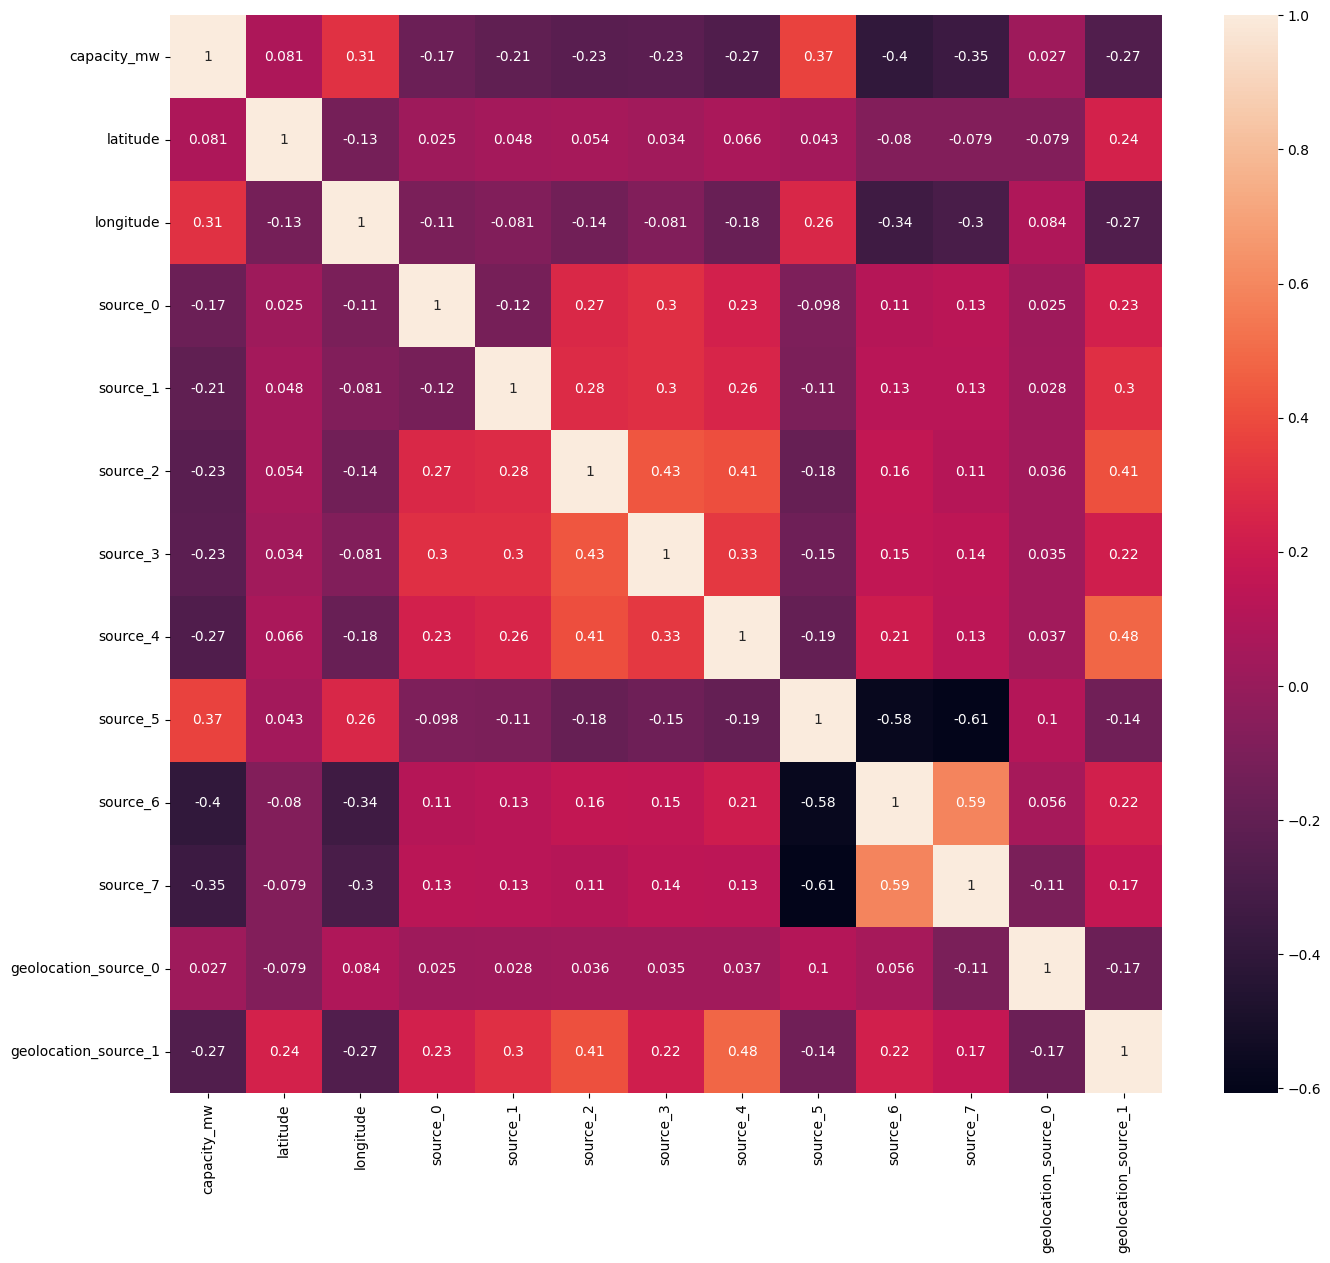

In [31]:
plt.figure(figsize=(16,14))
sns.heatmap(Joined.corr(), annot=True)

# there is no problem of multicollinearity between predictor features

# skewness problem

In [32]:
Joined.skew()

capacity_mw              1.829325
latitude                -0.007935
longitude                0.492155
source_0                 2.731787
source_1                 2.307628
source_2                 1.624359
source_3                 1.738628
source_4                 1.553175
source_5                -0.661444
source_6                 0.628346
source_7                 0.674820
geolocation_source_0   -13.162285
geolocation_source_1     1.725445
dtype: float64

# problem of skewness exist in most of features

# Transformer through Power Transformer

In [33]:
pt = PowerTransformer()

In [34]:
transformed0 = pd.DataFrame(pt.fit_transform(Joined))

# StandardScaler

In [35]:
st = StandardScaler()

In [36]:
i_scaled = pd.DataFrame(st.fit_transform(transformed0))

# Train Test Split

In [37]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(i_scaled, output, test_size = 0.25, random_state=128)

# Model Building

In [497]:
model1 = {'Logistic':LogisticRegression(), 'RandomForest' : RandomForestClassifier(), 'Knn' : KNeighborsClassifier(), 'SVC' : SVC(), 'XGBclassifier' : XGBClassifier(), 'GradientBoosting' : GradientBoostingClassifier(),
         'AdaBoost' : AdaBoostClassifier(), 'DecisionTree' : DecisionTreeClassifier()}

In [501]:
for models_name, models in model1.items():
    models.fit(x_train3, y_train3)
    y_train_pred5 = models.predict(x_train3)
    y_test_pred5 = models.predict(x_test3)
    print('  ')
    print('___________________________')
    print(models_name)
    print('..........')
    print('Training_accuracy Score:', accuracy_score(y_train3, y_train_pred5))
    print('Testing_accuracy Score:', accuracy_score(y_test3, y_test_pred5))
    print('----------------------------------------------------')
    print('confusion_matrix on traning')
    print(confusion_matrix(y_train3, y_train_pred5))
    print('confusion_matrix on_test')
    print( confusion_matrix(y_test3, y_test_pred5))
    print('----------------------------------------------------')
    
   

  
___________________________
Logistic
..........
Training_accuracy Score: 0.7965779467680608
Testing_accuracy Score: 0.7840909090909091
----------------------------------------------------
confusion_matrix on traning
[[ 27   7   1   1   0   1   0   1]
 [  6  90   3  21   0   0   0   0]
 [  2  10  11  17   0   0   0   0]
 [  0  18   5 117   0   0   0   0]
 [  0   1   0   2   0   0   0   0]
 [  2   1   1   7   0   3   0   0]
 [  0   0   0   0   0   0  94   0]
 [  0   0   0   0   0   0   0  77]]
confusion_matrix on_test
[[ 9  3  0  0  0  0  0  0]
 [ 4 21  1  4  0  0  0  0]
 [ 1  4  2  7  0  0  0  0]
 [ 0  8  1 47  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  1  1  1  0  0  0  0]
 [ 0  0  0  0  0  0 28  0]
 [ 0  0  0  0  0  0  0 31]]
----------------------------------------------------
  
___________________________
RandomForest
..........
Training_accuracy Score: 1.0
Testing_accuracy Score: 0.8352272727272727
----------------------------------------------------
confusion_matrix on trani

# FInal Model

# # SVC Model

In [671]:
svc = RandomForestClassifier()



In [673]:
max_test = 0.0
max_training = 0.0
best_random_state = None

for i in range(1, 1000):
    x_train5, x_test5, y_train5, y_test5 = train_test_split(i_scaled, output, test_size=0.25, random_state=i)
    svc.fit(x_train5, y_train5)
    y_train_preda = svc.predict(x_train5)
    y_test_preda = svc.predict(x_test5)
    score34 = accuracy_score(y_train5, y_train_preda)
    score35 = accuracy_score(y_test5, y_test_preda)
    if score35 > max_test:
        max_test = score35
        max_training = score34
        best_random_state = i



In [674]:
max_test

0.9034090909090909

In [675]:
max_training

1.0

In [676]:
best_random_state

518

# cross_val_score

In [677]:
score =cross_val_score(svc, x_train5, y_train5)
score.mean()

0.821329739442947

# Hyperparameter Tuning

In [679]:
param_grid4 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [682]:
rfcv3 = RandomizedSearchCV(param_distributions = param_grid4, estimator = svc, cv=3)

In [683]:
rfcv3.fit(i_scaled, output)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]})

In [684]:
rfcv3.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None}

# AFTER applying Hyperparameter Tuning

In [48]:
x_train6, x_test6, y_train6, y_test6 = train_test_split(i_scaled, output, test_size=0.25, random_state=518)

In [49]:
svc1 = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, max_features='log2', max_depth=None)


In [50]:
svc1.fit(x_train6, y_train6)

RandomForestClassifier(max_features='log2', min_samples_split=5)

In [51]:
y_train_predb = svc1.predict(x_train6)
y_test_predb = svc1.predict(x_test6)

# Accuracy _Scores

In [52]:
score36 = accuracy_score(y_train6, y_train_predb)
score37 = accuracy_score(y_test6, y_test_predb)

In [53]:
score36

0.9714828897338403

In [54]:
score37

0.8920454545454546

# confusion matrix

In [55]:
score38 = confusion_matrix(y_train6, y_train_predb)
score39 = confusion_matrix(y_test6, y_test_predb)

In [56]:
score38

array([[ 37,   0,   0,   0,   0,   0,   0,   0],
       [  0, 112,   1,   2,   0,   0,   0,   0],
       [  1,   2,  35,   3,   0,   0,   0,   0],
       [  0,   0,   0, 154,   0,   0,   0,   0],
       [  0,   1,   0,   1,   2,   0,   0,   0],
       [  0,   2,   0,   2,   0,  11,   0,   0],
       [  0,   0,   0,   0,   0,   0,  88,   0],
       [  0,   0,   0,   0,   0,   0,   0,  72]], dtype=int64)

In [57]:
score39

array([[11,  2,  0,  0,  0,  0,  0,  0],
       [ 3, 28,  0,  4,  0,  0,  0,  0],
       [ 0,  2,  8,  3,  0,  0,  0,  0],
       [ 0,  3,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

# Classification report 

In [59]:
score40 = classification_report(y_train6, y_train_predb)
score41 = classification_report(y_test6, y_test_predb)

In [61]:
print(score40)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.96      0.97      0.97       115
           2       0.97      0.85      0.91        41
           3       0.95      1.00      0.97       154
           4       1.00      0.50      0.67         4
           5       1.00      0.73      0.85        15
           6       1.00      1.00      1.00        88
           7       1.00      1.00      1.00        72

    accuracy                           0.97       526
   macro avg       0.98      0.88      0.92       526
weighted avg       0.97      0.97      0.97       526



In [62]:
print(score41)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.80      0.80      0.80        35
           2       1.00      0.62      0.76        13
           3       0.81      0.93      0.87        42
           4       0.00      0.00      0.00         1
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        36

    accuracy                           0.89       176
   macro avg       0.80      0.71      0.74       176
weighted avg       0.89      0.89      0.89       176



# Cross validation

In [693]:
score =cross_val_score(svc1, x_train6, y_train6)
score.mean()

0.7946990116801438